## ____Other Networks____

#### __Bio__

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sl

/usr/lib/python3/dist-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/usr/local/lib/python3.9/dist-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


#### ____Ecology : South Florida____

In [2]:
eco=nx.read_adjlist('Florida-bay.txt')
eco

In [23]:
#mafia=nx.read_('NDRANGHETAMAFIA_2M.csv')
#mafia

TypeError: Failed to read node and degree on line (ALBANESE Giuseppe Domenico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
)

In [4]:
print(len(nx.nodes(eco)))
nx.edges(eco)

nodes1=dict(eco.degree())    #creating a dictionary of nodes and degrees from the graph
nodes1
m1=len(eco.edges());m1

128


2075

In [3]:
Adj_M1 = nx.to_numpy_matrix(eco)     #creating an adjacency matrix as from the node labelling in the graph
G1 = nx.from_numpy_matrix(Adj_M1)     #graph network from the adjacency matrix
A1=nx.adjacency_matrix(G1)
#A
#Adj_M = nx.adjacency_matrix(tele)
#show(NX.todense())

In [6]:
eco.nodes()

NodeView(('125', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '124', '14', '15', '122', '16', '17', '18', '19', '20', '21', '22', '23', '123', '24', '25', '26', '27', '28', '38', '39', '40', '41', '42', '43', '45', '66', '67', '92', '94', '29', '30', '31', '32', '33', '60', '71', '95', '34', '35', '36', '37', '48', '44', '46', '47', '49', '50', '51', '52', '56', '57', '58', '61', '62', '63', '68', '80', '81', '83', '90', '99', '53', '54', '72', '73', '74', '78', '82', '84', '88', '96', '98', '55', '93', '59', '64', '65', '69', '70', '75', '76', '77', '79', '85', '86', '87', '89', '97', '91', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '126', '127'))

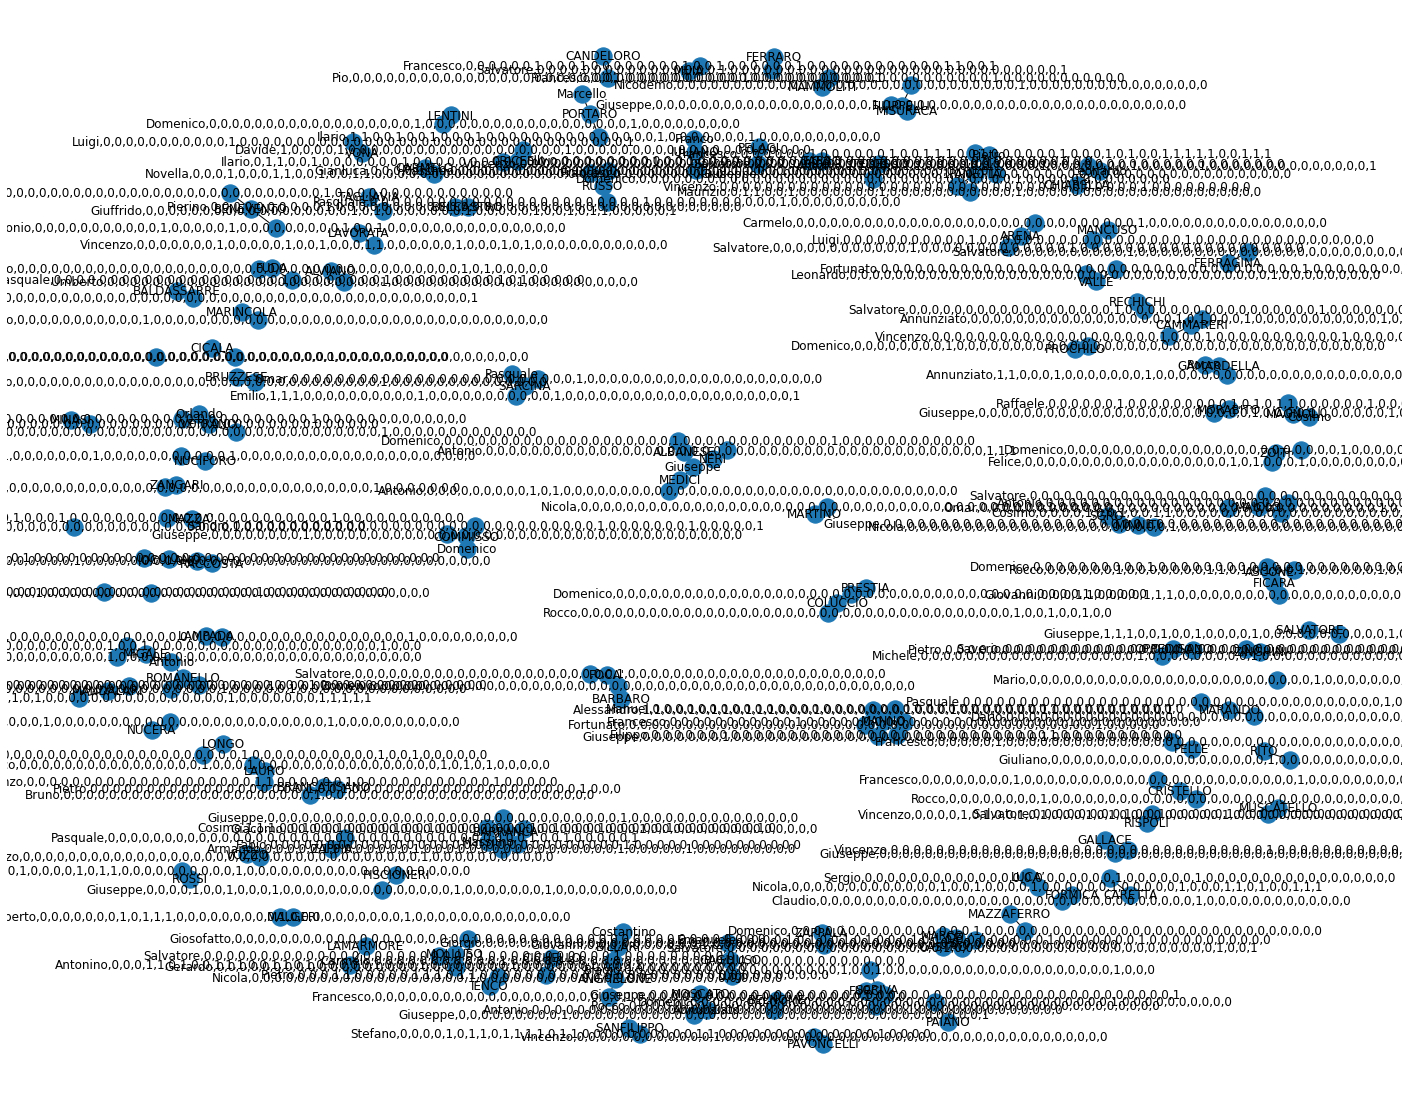

In [22]:
plt.figure(3,figsize=(25,20))   #setting the display feature sizes
nx.draw_networkx(eco)         #drawing a networkx graph
plt.axis('off')       #with no axis
plt.show()      #display the output  

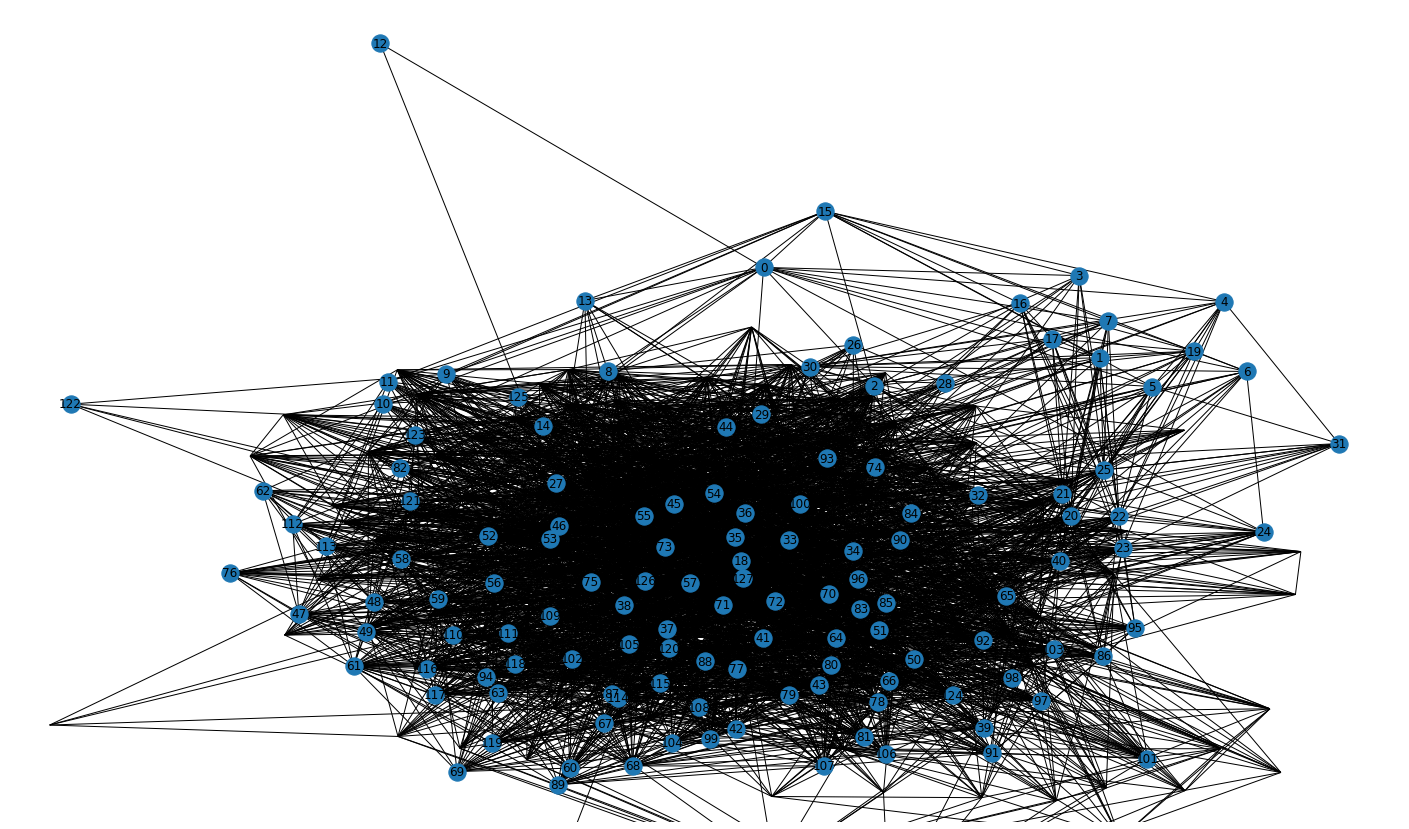

In [7]:
Adj_M1 = nx.to_numpy_matrix(eco)     #creating an adjacency matrix as from the node labelling in the graph
plt.figure(figsize=(25,15))      #adjusting the display size
G1 = nx.from_numpy_matrix(Adj_M1)     #graph network from the adjacency matrix
pos = nx.spring_layout(G1)       #new graph layout
nx.draw_networkx(G1)       #drawing the graph
nx.draw_networkx_edges(G1,pos)
plt.axis('off')        #eliminating the plot axes
plt.savefig("ecology Florida.png")
plt.show()    #displaying

In [4]:
C1=sl.expm(A1)


/usr/local/lib/python3.9/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/usr/local/lib/python3.9/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [18]:
#comm1=nx.communicability(tele)
ass_coef_r1=nx.degree_assortativity_coefficient(eco)
#comm1;
ass_coef_r1


-0.11166300173840187

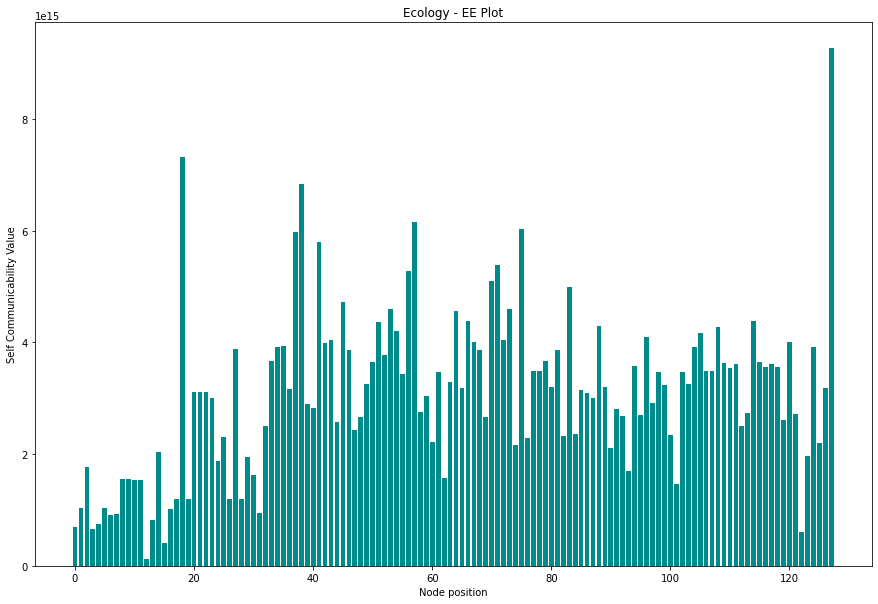

In [5]:
##creating graph from an upper triangular matrix
#plt.figure(figsize=(15,10)) 
##EE(SC)
plt.figure(4,figsize=(15,10))   #setting the display feature sizes
for i in range(len(G1.nodes())):
    for j in range(len(G1.nodes())):
        if i>j:
            C1[i,j]=0
#show(c)
        if C1[i,j]!=0:
            plt.bar(i,C1[i,j],color='darkcyan')
plt.title('Ecology - EE Plot')
plt.xlabel('Node position')        
plt.ylabel('Self Communicability Value')
plt.savefig('eco-SC.eps')
plt.show()

In [6]:
Comm1=C1.toarray()

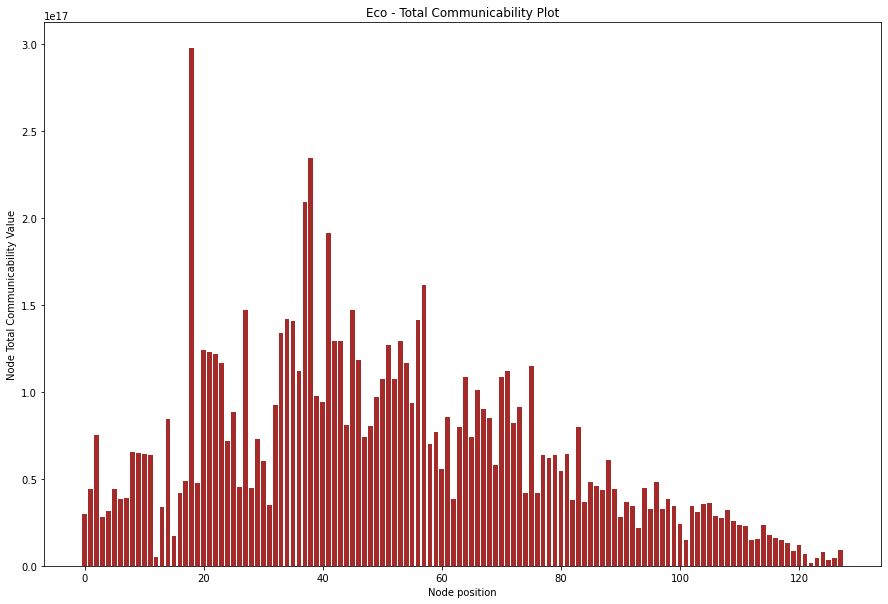

In [7]:
##Total Comm
plt.figure(4,figsize=(15,10))   #setting the display feature sizes
for h in list(G1.nodes()):
    plt.bar(h,sum(Comm1[h]), color='brown')
plt.title('Eco - Total Communicability Plot')
plt.xlabel('Node position')        
plt.ylabel('Node Total Communicability Value')
plt.savefig('eco-TC.eps')
plt.show()

In [20]:
#C_f=C.todense()

nn1=len(G1.nodes())
s1=C1.diagonal().reshape(nn1,1)   #EE_n
t1=s1.transpose()
e1=np.ones((nn1,1))
f1=e1.transpose()

In [50]:
sc1=list(nx.subgraph_centrality(G1).values())
ee1=np.array(sc1)#reshape(nn1,1)
EE1=ee1.reshape(nn1,1)

In [61]:
np.shape(sum(Comm1))
sum(Comm1)

1.7019797350394278e+19

In [59]:
show(np.corrcoef(EE1,Comm1,rowvar=False))

array([[1.        , 0.93757578, 0.93757578, ..., 0.93757578, 0.93757578,
        0.93757578],
       [0.93757578, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.93757578, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.93757578, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.93757578, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.93757578, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [64]:
for k in (0,len(G1.nodes())-1):
    print(sum(Comm1[k]))#,rowvar='True')

2.963539619578568e+16
3.972218962388308e+17


In [54]:
np.corrcoef??

In [16]:
M1=sqrt(s1*f1+e1*t1-2*Comm1)
show(M1)

array([[       0.        ,  3539759.20130881, 11153514.3454666 , ...,
        15706707.24568372, 25928680.44214002, 89100955.37885527],
       [ 3539759.20130881,        0.        ,  7613755.14514991, ...,
        12166948.04616846, 22388921.24209848, 85561196.17837843],
       [11153514.34546659,  7613755.1451499 ,        0.        , ...,
         4553192.90171308, 14775166.0972136 , 77947441.03346702],
       ...,
       [15706707.24568372, 12166948.04616846,  4553192.90171309, ...,
               0.        , 10221973.1969649 , 73394248.13364089],
       [25928680.44214002, 22388921.24209848, 14775166.0972136 , ...,
        10221973.19696491,        0.        , 63172274.9370366 ],
       [89100955.37885527, 85561196.17837843, 77947441.03346702, ...,
        73394248.13364089, 63172274.93703658,        0.        ]])

In [17]:
g1 = nx.from_numpy_matrix(M1, create_using=nx.MultiGraph)
g1

In [18]:
am1=nx.adjacency_matrix(g1)
am1

<128x128 sparse matrix of type '<class 'numpy.float64'>'
	with 16256 stored elements in Compressed Sparse Row format>

In [19]:
print(nx.average_shortest_path_length(eco))
nx.average_shortest_path_length(g1)


1.7763287401574803


1.0

In [22]:
print(nx.transitivity(eco),nx.average_clustering(eco))
#nx.transitivity(g1)  not implemented in multigraph  #nx.average_clustering(g)

0.3119154127694185 0.3346221811495258


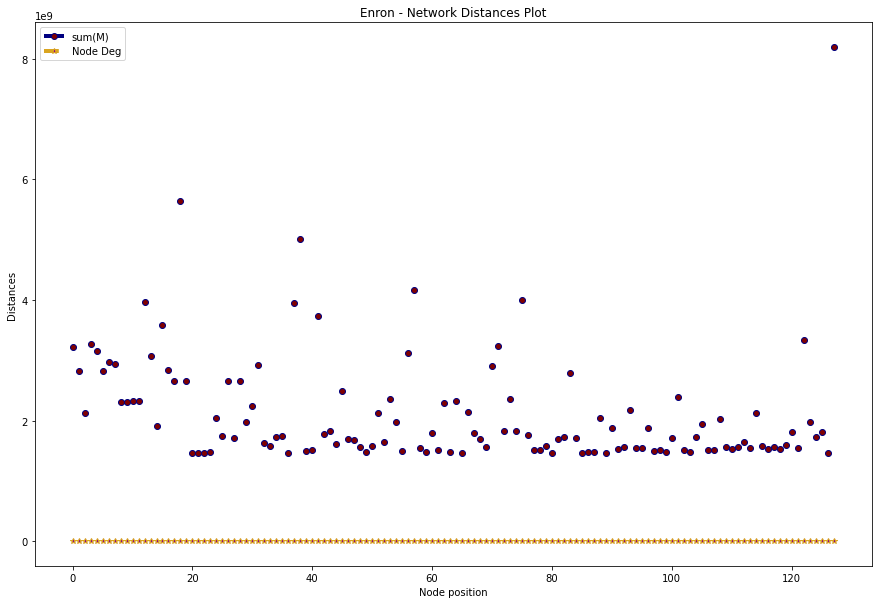

In [23]:
plt.figure(4,figsize=(15,10))   #setting the display feature sizes
for i in range(len(G1.nodes())):
    #for j in range(len(G.nodes())): 
    plt.plot(i,sum(am1[i]),color='navy',ls='-.',lw=4,marker='o',markerfacecolor='maroon')
    plt.plot(i,sum(A1[i]),color='goldenrod',ls='--',lw=4,marker='*',markerfacecolor='darkmagenta')

plt.title('Enron - Network Distances Plot')
plt.xlabel('Node position')        
plt.ylabel('Distances')
plt.savefig('enron-D.png')
plt.legend(['sum(M)','Node Deg'],loc=2)
plt.show()

## node positions

In [8]:
degree_sequence_p = [d for n, d in G1.degree()]  # degree sequence
list(set(degree_sequence_p))
deg_p=nx.degree(G1)
#y1 = list(comm1.values())

In [9]:
#5 nodes with the highest degree
#l_deg=comm.degree_sequence()[-1:]   #sorting out the list in ascending order
l_deg_p=[min(degree_sequence_p)]   #sorting out the list in ascending order
print('The lowest degree : ',l_deg_p)     #displaying the last 5 values
low_deg_nodes_p=[]
for i in deg_p(G1):
    if i[1] in l_deg_p:
        low_deg_nodes_p.append(int(i[0]))
print('Their respective corresponding nodes position are',low_deg_nodes_p)
l_deg_p
per=int(len(low_deg_nodes_p))*100//len(nx.nodes(G1))
print(len(low_deg_nodes_p),'\n',per,'%')

The lowest degree :  [2]
Their respective corresponding nodes position are [12]
1 
 0 %


In [10]:
#h_deg=[comm.degree_sequence()[0]]   #sorting out the list in ascending order
h_deg_p=[max(degree_sequence_p)]   #sorting out the list in ascending order
print('The highest degree : ',h_deg_p)     #displaying the last 5 values
hubs_p=[]
for i in deg_p(G1):
    if i[1] in h_deg_p:
        hubs_p.append(int(i[0]))
print('Their respective corresponding nodes position : ',hubs_p)
len(h_deg_p)

The highest degree :  [110]
Their respective corresponding nodes position :  [127]


1

## nodes

In [11]:
degree_sequence = [d for n, d in eco.degree()]  # degree sequence
list(set(degree_sequence))
deg=nx.degree(eco)

In [12]:
l_deg=[min(degree_sequence)]   #sorting out the list in ascending order
#print('The lowest degree : ',l_deg)     #displaying the last 5 values
low_deg_nodes=[]
for i in deg(eco):
    if i[1] in l_deg:
        low_deg_nodes.append(int(i[0]))
print('Their respective corresponding nodes are',low_deg_nodes)
l_deg
#per1=int(len(low_deg_nodes1))*100//len(nx.nodes(eco))

Their respective corresponding nodes are [11]


[2]

In [13]:
h_deg=[max(degree_sequence)]   #sorting out the list in ascending order
#print('The highest degree : ',h_deg)     #displaying the last 5 values
hubs=[]
for i in deg(eco):
    if i[1] in h_deg:
        hubs.append(int(i[0]))
print('Their respective corresponding nodes position : ',hubs)

Their respective corresponding nodes position :  [127]


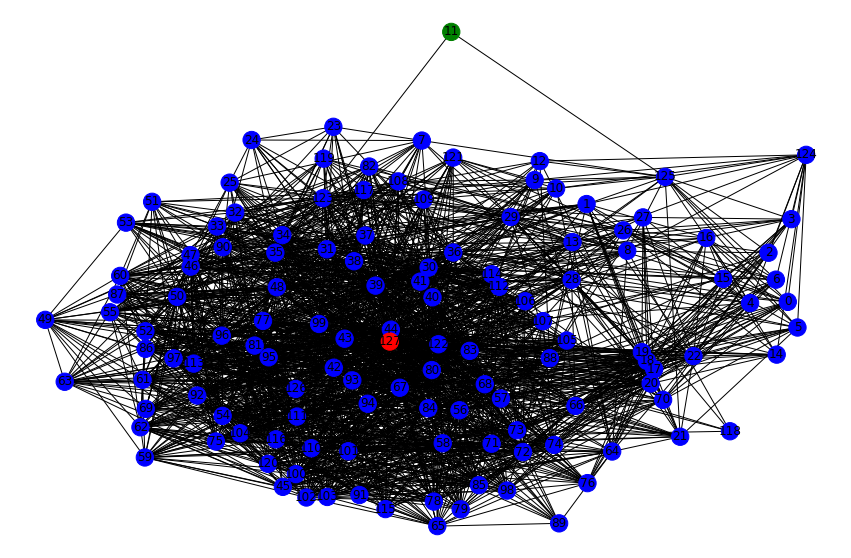

In [17]:
#highlights the network by partitioning into 3 communities depending on the connectivity
nodes=dict(eco.degree());nodes    #creating a dictionary of nodes and degrees from the graph
deg=list(nodes.values())       #Getting the degree of particular nodes 
n=len(deg)
color = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(n):     #iteration for partitioning
    if int(list(nodes)[i]) in hubs:      #highly connected nodes conditioning, the top 5 
        color.append('r')     
    elif int(list(nodes)[i]) in low_deg_nodes:                 #less connected
        color.append('g')
    else :
        color.append('b')
pos=nx.kamada_kawai_layout(eco)      #redrawing the network
plt.figure(figsize=(15,10))    #plot figure
nx.draw_networkx(eco,pos,node_color = color)      #depending on the color partition
plt.axis('off')
plt.savefig('Eco-part.png')
plt.show()      #displaying

In [144]:
sum(M1[31])


30387.576129160763

In [139]:
M1[31,31]
sum(Comm1[31])


1011283.6457943355

In [35]:
##EE
for k in low_deg_nodes_p:
    print(k,':',N(C1[k,k],digits=8),'and',N(sum(Comm1[k]),digits=8))
print('31:',N(C1[31,31],digits=8))

12 : 1.4423519e12 and 4.7804285e15
31: 9.6548114e13


In [37]:
for p in low_deg_nodes_p:
    print(p,':',sum(M1[p]))

12 : 3986991074.310895


## communicability and its distances

In [38]:

for I in hubs_p:
    c=list(Comm1[I-1])
    cd=list(M1[I-1])
    for J in (low_deg_nodes_p):
        print(I,':',J,' = ',N(c[J-1],digits=8),'and',N(cd[J-1],digits=8))

127 : 12  =  0.00000000 and 3.6775874e7


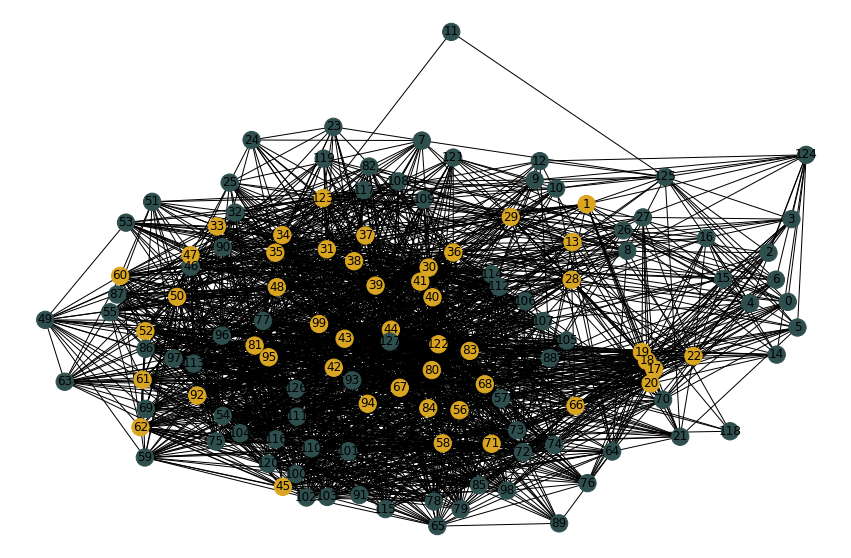

In [15]:
#highlights the network by partitioning into 3 communities depending on total communicabilities
nodes=dict(eco.degree());nodes    #creating a dictionary of nodes and degrees from the graph
deg=list(nodes.values())       #Getting the degree of particular nodes 
n=len(deg)
color = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(n):     #iteration for partitioning
    if sum(Comm1[i]) >= 7.5e16:      #highly connected nodes conditioning, the top 5 
        color.append('goldenrod')     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        color.append('darkslategrey')
pos=nx.kamada_kawai_layout(eco)      #redrawing the network
plt.figure(figsize=(15,10))    #plot figure
nx.draw_networkx(eco,pos,node_color = color)      #depending on the color partition
plt.axis('off')
plt.savefig('Eco-comm_p.png')
nx.write_gexf(eco, "Eco-comm_p.gexf")
plt.show()

In [28]:
ldeg1=[]
hdeg1 = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(len(G1.nodes)):     #iteration for partitioning
    if sum(Comm1[i]) >= 7.5e16:      #highly connected nodes conditioning, the top 5 
        hdeg1.append(degree_sequence[i])     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        ldeg1.append(degree_sequence[i])
print(set(hdeg1),'\n','\n',set(ldeg1),'\n',set(hdeg1)&set(ldeg1))

{17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 55, 57, 58, 61, 64, 72, 75, 89, 110} 
 
 {2, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22} 
 {17, 22}


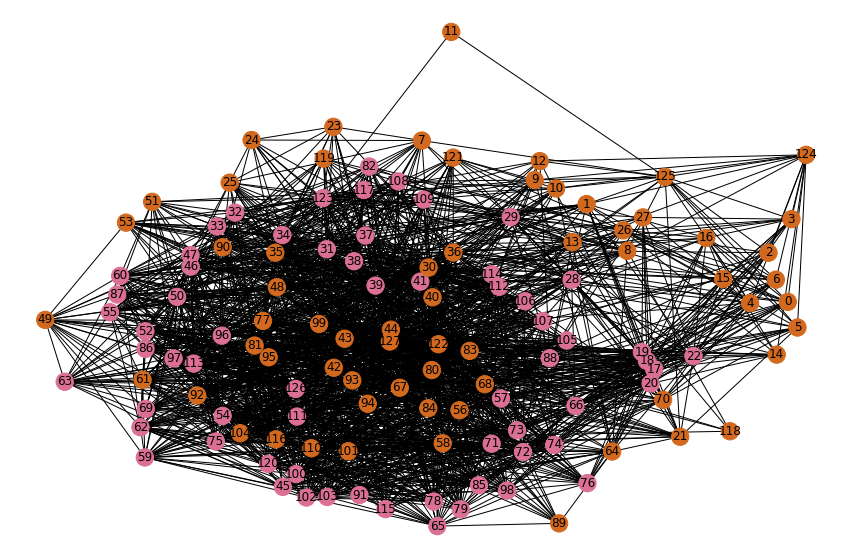

In [21]:
#highlights the network by partitioning into 3 communities depending on the total communicability distances
nodes=dict(eco.degree());nodes    #creating a dictionary of nodes and degrees from the graph
deg=list(nodes.values())       #Getting the degree of particular nodes 
n=len(deg)
color = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(n):     #iteration for partitioning
    if sum(M1[i]) >= 1.75e9:      #highly connected nodes conditioning, the top 5 
        color.append('chocolate')     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        color.append('palevioletred')
pos=nx.kamada_kawai_layout(eco)      #redrawing the network
plt.figure(figsize=(15,10))    #plot figure
nx.draw_networkx(eco,pos,node_color = color)      #depending on the color partition
plt.axis('off')
plt.savefig('eco_p-comm_d.png')
plt.show()

In [25]:
Ldeg1=[]
Hdeg1 = []   # a list of color for highlighting
#hubs =[2,29,32,35]
for i in range(len(G1.nodes)):     #iteration for partitioning
    if sum(M1[i]) >= 1.75e9:      #highly connected nodes conditioning, the top 5 
        Hdeg1.append(degree_sequence[i])     
    #elif int(list(nodes1)[i]) in low_deg_nodes1_p:                 #less connected
     #   color.append('g')
    else :
        Hdeg1.append(degree_sequence[i])
print(set(Hdeg1),'\n','\n',set(Ldeg1),'\n',set(Hdeg1)&set(Ldeg1))

{2, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 55, 57, 58, 61, 64, 72, 75, 89, 110} 
 
 set() 
 set()


## Path Preservations

In [46]:
#for dis in nx.shortest_path_length(tele):
    #show(dis)
#print('\n','\n')
for l1 in nx.all_pairs_shortest_path(eco,1):
    show(l1)
#print('\n','\n')    
#type(l)

('125',
 {'125': ['125'],
  '0': ['125', '0'],
  '1': ['125', '1'],
  '2': ['125', '2'],
  '3': ['125', '3'],
  '4': ['125', '4'],
  '5': ['125', '5'],
  '6': ['125', '6'],
  '7': ['125', '7'],
  '8': ['125', '8'],
  '9': ['125', '9'],
  '10': ['125', '10'],
  '11': ['125', '11'],
  '12': ['125', '12'],
  '13': ['125', '13'],
  '21': ['125', '21'],
  '51': ['125', '51'],
  '122': ['125', '122'],
  '124': ['125', '124']})

('0',
 {'0': ['0'],
  '125': ['0', '125'],
  '15': ['0', '15'],
  '16': ['0', '16'],
  '17': ['0', '17'],
  '18': ['0', '18'],
  '19': ['0', '19'],
  '20': ['0', '20'],
  '22': ['0', '22'],
  '26': ['0', '26'],
  '29': ['0', '29'],
  '30': ['0', '30'],
  '36': ['0', '36'],
  '66': ['0', '66'],
  '68': ['0', '68'],
  '70': ['0', '70'],
  '124': ['0', '124']})

('1',
 {'1': ['1'],
  '125': ['1', '125'],
  '15': ['1', '15'],
  '16': ['1', '16'],
  '17': ['1', '17'],
  '18': ['1', '18'],
  '19': ['1', '19'],
  '20': ['1', '20'],
  '22': ['1', '22'],
  '26': ['1', '26'],
  '29': ['1', '29'],
  '30': ['1', '30'],
  '31': ['1', '31'],
  '34': ['1', '34'],
  '36': ['1', '36'],
  '37': ['1', '37'],
  '38': ['1', '38'],
  '39': ['1', '39'],
  '44': ['1', '44'],
  '47': ['1', '47'],
  '70': ['1', '70'],
  '83': ['1', '83'],
  '88': ['1', '88'],
  '90': ['1', '90'],
  '124': ['1', '124']})

('2',
 {'2': ['2'],
  '125': ['2', '125'],
  '17': ['2', '17'],
  '18': ['2', '18'],
  '19': ['2', '19'],
  '22': ['2', '22'],
  '29': ['2', '29'],
  '70': ['2', '70'],
  '83': ['2', '83'],
  '88': ['2', '88'],
  '90': ['2', '90'],
  '124': ['2', '124']})

('3',
 {'3': ['3'],
  '125': ['3', '125'],
  '15': ['3', '15'],
  '16': ['3', '16'],
  '17': ['3', '17'],
  '18': ['3', '18'],
  '19': ['3', '19'],
  '20': ['3', '20'],
  '22': ['3', '22'],
  '26': ['3', '26'],
  '27': ['3', '27'],
  '30': ['3', '30'],
  '36': ['3', '36'],
  '124': ['3', '124']})

('4',
 {'4': ['4'],
  '125': ['4', '125'],
  '16': ['4', '16'],
  '17': ['4', '17'],
  '18': ['4', '18'],
  '19': ['4', '19'],
  '22': ['4', '22'],
  '26': ['4', '26'],
  '27': ['4', '27'],
  '30': ['4', '30'],
  '36': ['4', '36'],
  '44': ['4', '44'],
  '66': ['4', '66'],
  '68': ['4', '68'],
  '70': ['4', '70'],
  '124': ['4', '124']})

('5',
 {'5': ['5'],
  '125': ['5', '125'],
  '16': ['5', '16'],
  '17': ['5', '17'],
  '18': ['5', '18'],
  '19': ['5', '19'],
  '21': ['5', '21'],
  '22': ['5', '22'],
  '26': ['5', '26'],
  '30': ['5', '30'],
  '36': ['5', '36'],
  '66': ['5', '66'],
  '68': ['5', '68'],
  '70': ['5', '70'],
  '124': ['5', '124']})

('6',
 {'6': ['6'],
  '125': ['6', '125'],
  '16': ['6', '16'],
  '17': ['6', '17'],
  '18': ['6', '18'],
  '19': ['6', '19'],
  '22': ['6', '22'],
  '26': ['6', '26'],
  '29': ['6', '29'],
  '30': ['6', '30'],
  '36': ['6', '36'],
  '66': ['6', '66'],
  '68': ['6', '68'],
  '70': ['6', '70'],
  '124': ['6', '124']})

('7',
 {'7': ['7'],
  '125': ['7', '125'],
  '23': ['7', '23'],
  '24': ['7', '24'],
  '25': ['7', '25'],
  '29': ['7', '29'],
  '31': ['7', '31'],
  '34': ['7', '34'],
  '35': ['7', '35'],
  '37': ['7', '37'],
  '38': ['7', '38'],
  '39': ['7', '39'],
  '40': ['7', '40'],
  '42': ['7', '42'],
  '44': ['7', '44'],
  '47': ['7', '47'],
  '70': ['7', '70'],
  '99': ['7', '99'],
  '123': ['7', '123']})

('8',
 {'8': ['8'],
  '125': ['8', '125'],
  '40': ['8', '40'],
  '41': ['8', '41'],
  '43': ['8', '43'],
  '44': ['8', '44'],
  '48': ['8', '48'],
  '64': ['8', '64'],
  '83': ['8', '83'],
  '99': ['8', '99'],
  '108': ['8', '108'],
  '109': ['8', '109'],
  '118': ['8', '118'],
  '121': ['8', '121'],
  '122': ['8', '122'],
  '123': ['8', '123'],
  '124': ['8', '124'],
  '126': ['8', '126']})

('9',
 {'9': ['9'],
  '125': ['9', '125'],
  '40': ['9', '40'],
  '41': ['9', '41'],
  '43': ['9', '43'],
  '44': ['9', '44'],
  '48': ['9', '48'],
  '64': ['9', '64'],
  '83': ['9', '83'],
  '99': ['9', '99'],
  '108': ['9', '108'],
  '109': ['9', '109'],
  '121': ['9', '121'],
  '122': ['9', '122'],
  '123': ['9', '123'],
  '124': ['9', '124'],
  '126': ['9', '126']})

('10',
 {'10': ['10'],
  '125': ['10', '125'],
  '40': ['10', '40'],
  '41': ['10', '41'],
  '43': ['10', '43'],
  '44': ['10', '44'],
  '48': ['10', '48'],
  '64': ['10', '64'],
  '83': ['10', '83'],
  '99': ['10', '99'],
  '108': ['10', '108'],
  '109': ['10', '109'],
  '121': ['10', '121'],
  '122': ['10', '122'],
  '123': ['10', '123'],
  '124': ['10', '124'],
  '126': ['10', '126']})

('11', {'11': ['11'], '125': ['11', '125'], '123': ['11', '123']})

('12',
 {'12': ['12'],
  '125': ['12', '125'],
  '70': ['12', '70'],
  '83': ['12', '83'],
  '88': ['12', '88'],
  '90': ['12', '90'],
  '99': ['12', '99'],
  '122': ['12', '122'],
  '123': ['12', '123'],
  '124': ['12', '124'],
  '126': ['12', '126']})

('13',
 {'13': ['13'],
  '125': ['13', '125'],
  '29': ['13', '29'],
  '32': ['13', '32'],
  '40': ['13', '40'],
  '41': ['13', '41'],
  '42': ['13', '42'],
  '43': ['13', '43'],
  '44': ['13', '44'],
  '45': ['13', '45'],
  '48': ['13', '48'],
  '64': ['13', '64'],
  '70': ['13', '70'],
  '82': ['13', '82'],
  '83': ['13', '83'],
  '88': ['13', '88'],
  '90': ['13', '90'],
  '99': ['13', '99'],
  '108': ['13', '108'],
  '109': ['13', '109'],
  '118': ['13', '118'],
  '121': ['13', '121'],
  '122': ['13', '122'],
  '123': ['13', '123'],
  '124': ['13', '124']})

('124',
 {'124': ['124'],
  '14': ['124', '14'],
  '0': ['124', '0'],
  '1': ['124', '1'],
  '2': ['124', '2'],
  '3': ['124', '3'],
  '4': ['124', '4'],
  '5': ['124', '5'],
  '6': ['124', '6'],
  '8': ['124', '8'],
  '9': ['124', '9'],
  '10': ['124', '10'],
  '12': ['124', '12'],
  '13': ['124', '13'],
  '125': ['124', '125']})

('14',
 {'14': ['14'],
  '124': ['14', '124'],
  '15': ['14', '15'],
  '16': ['14', '16'],
  '17': ['14', '17'],
  '18': ['14', '18'],
  '19': ['14', '19'],
  '20': ['14', '20'],
  '22': ['14', '22'],
  '26': ['14', '26'],
  '30': ['14', '30'],
  '122': ['14', '122'],
  '127': ['14', '127']})

('15',
 {'15': ['15'],
  '0': ['15', '0'],
  '1': ['15', '1'],
  '3': ['15', '3'],
  '14': ['15', '14'],
  '122': ['15', '122'],
  '16': ['15', '16'],
  '17': ['15', '17'],
  '18': ['15', '18'],
  '19': ['15', '19'],
  '20': ['15', '20'],
  '22': ['15', '22'],
  '26': ['15', '26'],
  '30': ['15', '30'],
  '36': ['15', '36'],
  '127': ['15', '127']})

('122',
 {'122': ['122'],
  '15': ['122', '15'],
  '16': ['122', '16'],
  '17': ['122', '17'],
  '18': ['122', '18'],
  '19': ['122', '19'],
  '20': ['122', '20'],
  '21': ['122', '21'],
  '22': ['122', '22'],
  '26': ['122', '26'],
  '30': ['122', '30'],
  '36': ['122', '36'],
  '8': ['122', '8'],
  '9': ['122', '9'],
  '10': ['122', '10'],
  '12': ['122', '12'],
  '13': ['122', '13'],
  '14': ['122', '14'],
  '42': ['122', '42'],
  '45': ['122', '45'],
  '52': ['122', '52'],
  '53': ['122', '53'],
  '54': ['122', '54'],
  '55': ['122', '55'],
  '56': ['122', '56'],
  '57': ['122', '57'],
  '58': ['122', '58'],
  '59': ['122', '59'],
  '60': ['122', '60'],
  '64': ['122', '64'],
  '65': ['122', '65'],
  '66': ['122', '66'],
  '67': ['122', '67'],
  '68': ['122', '68'],
  '69': ['122', '69'],
  '70': ['122', '70'],
  '71': ['122', '71'],
  '72': ['122', '72'],
  '73': ['122', '73'],
  '74': ['122', '74'],
  '75': ['122', '75'],
  '76': ['122', '76'],
  '77': ['122', '77'],
  '78': ['122', '78'],
  '79': ['122', '79'],
  '80': ['122', '80'],
  '81': ['122', '81'],
  '82': ['122', '82'],
  '83': ['122', '83'],
  '84': ['122', '84'],
  '85': ['122', '85'],
  '86': ['122', '86'],
  '87': ['122', '87'],
  '88': ['122', '88'],
  '89': ['122', '89'],
  '90': ['122', '90'],
  '91': ['122', '91'],
  '92': ['122', '92'],
  '93': ['122', '93'],
  '94': ['122', '94'],
  '95': ['122', '95'],
  '96': ['122', '96'],
  '97': ['122', '97'],
  '98': ['122', '98'],
  '99': ['122', '99'],
  '100': ['122', '100'],
  '101': ['122', '101'],
  '102': ['122', '102'],
  '103': ['122', '103'],
  '104': ['122', '104'],
  '105': ['122', '105'],
  '106': ['122', '106'],
  '107': ['122', '107'],
  '108': ['122', '108'],
  '109': ['122', '109'],
  '110': ['122', '110'],
  '111': ['122', '111'],
  '112': ['122', '112'],
  '113': ['122', '113'],
  '114': ['122', '114'],
  '115': ['122', '115'],
  '116': ['122', '116'],
  '117': ['122', '117'],
  '118': ['122', '118'],
  '119': ['122', '119'],
  '120': ['122', '120'],
  '121': ['122', '121'],
  '125': ['122', '125'],
  '123': ['122', '123'],
  '127': ['122', '127']})

('16',
 {'16': ['16'],
  '0': ['16', '0'],
  '1': ['16', '1'],
  '3': ['16', '3'],
  '4': ['16', '4'],
  '5': ['16', '5'],
  '6': ['16', '6'],
  '14': ['16', '14'],
  '15': ['16', '15'],
  '122': ['16', '122'],
  '17': ['16', '17'],
  '18': ['16', '18'],
  '19': ['16', '19'],
  '22': ['16', '22'],
  '26': ['16', '26'],
  '30': ['16', '30'],
  '36': ['16', '36'],
  '127': ['16', '127']})

('17',
 {'17': ['17'],
  '0': ['17', '0'],
  '1': ['17', '1'],
  '2': ['17', '2'],
  '3': ['17', '3'],
  '4': ['17', '4'],
  '5': ['17', '5'],
  '6': ['17', '6'],
  '14': ['17', '14'],
  '15': ['17', '15'],
  '16': ['17', '16'],
  '122': ['17', '122'],
  '21': ['17', '21'],
  '27': ['17', '27'],
  '28': ['17', '28'],
  '29': ['17', '29'],
  '44': ['17', '44'],
  '56': ['17', '56'],
  '57': ['17', '57'],
  '58': ['17', '58'],
  '64': ['17', '64'],
  '66': ['17', '66'],
  '67': ['17', '67'],
  '68': ['17', '68'],
  '71': ['17', '71'],
  '72': ['17', '72'],
  '73': ['17', '73'],
  '74': ['17', '74'],
  '76': ['17', '76'],
  '77': ['17', '77'],
  '80': ['17', '80'],
  '81': ['17', '81'],
  '84': ['17', '84'],
  '85': ['17', '85'],
  '93': ['17', '93'],
  '94': ['17', '94'],
  '95': ['17', '95'],
  '98': ['17', '98'],
  '127': ['17', '127']})

('18',
 {'18': ['18'],
  '0': ['18', '0'],
  '1': ['18', '1'],
  '2': ['18', '2'],
  '3': ['18', '3'],
  '4': ['18', '4'],
  '5': ['18', '5'],
  '6': ['18', '6'],
  '14': ['18', '14'],
  '15': ['18', '15'],
  '16': ['18', '16'],
  '122': ['18', '122'],
  '21': ['18', '21'],
  '27': ['18', '27'],
  '28': ['18', '28'],
  '29': ['18', '29'],
  '44': ['18', '44'],
  '56': ['18', '56'],
  '57': ['18', '57'],
  '58': ['18', '58'],
  '64': ['18', '64'],
  '66': ['18', '66'],
  '67': ['18', '67'],
  '68': ['18', '68'],
  '71': ['18', '71'],
  '72': ['18', '72'],
  '73': ['18', '73'],
  '74': ['18', '74'],
  '76': ['18', '76'],
  '77': ['18', '77'],
  '80': ['18', '80'],
  '81': ['18', '81'],
  '84': ['18', '84'],
  '85': ['18', '85'],
  '93': ['18', '93'],
  '94': ['18', '94'],
  '95': ['18', '95'],
  '98': ['18', '98'],
  '127': ['18', '127']})

('19',
 {'19': ['19'],
  '0': ['19', '0'],
  '1': ['19', '1'],
  '2': ['19', '2'],
  '3': ['19', '3'],
  '4': ['19', '4'],
  '5': ['19', '5'],
  '6': ['19', '6'],
  '14': ['19', '14'],
  '15': ['19', '15'],
  '16': ['19', '16'],
  '122': ['19', '122'],
  '21': ['19', '21'],
  '27': ['19', '27'],
  '28': ['19', '28'],
  '29': ['19', '29'],
  '44': ['19', '44'],
  '56': ['19', '56'],
  '57': ['19', '57'],
  '58': ['19', '58'],
  '64': ['19', '64'],
  '66': ['19', '66'],
  '67': ['19', '67'],
  '68': ['19', '68'],
  '71': ['19', '71'],
  '72': ['19', '72'],
  '73': ['19', '73'],
  '74': ['19', '74'],
  '76': ['19', '76'],
  '77': ['19', '77'],
  '80': ['19', '80'],
  '81': ['19', '81'],
  '84': ['19', '84'],
  '85': ['19', '85'],
  '93': ['19', '93'],
  '94': ['19', '94'],
  '95': ['19', '95'],
  '98': ['19', '98'],
  '127': ['19', '127']})

('20',
 {'20': ['20'],
  '0': ['20', '0'],
  '1': ['20', '1'],
  '3': ['20', '3'],
  '14': ['20', '14'],
  '15': ['20', '15'],
  '122': ['20', '122'],
  '21': ['20', '21'],
  '27': ['20', '27'],
  '28': ['20', '28'],
  '29': ['20', '29'],
  '44': ['20', '44'],
  '56': ['20', '56'],
  '57': ['20', '57'],
  '58': ['20', '58'],
  '64': ['20', '64'],
  '66': ['20', '66'],
  '67': ['20', '67'],
  '68': ['20', '68'],
  '71': ['20', '71'],
  '72': ['20', '72'],
  '73': ['20', '73'],
  '74': ['20', '74'],
  '76': ['20', '76'],
  '77': ['20', '77'],
  '80': ['20', '80'],
  '81': ['20', '81'],
  '84': ['20', '84'],
  '85': ['20', '85'],
  '93': ['20', '93'],
  '94': ['20', '94'],
  '95': ['20', '95'],
  '98': ['20', '98'],
  '127': ['20', '127']})

('21',
 {'21': ['21'],
  '5': ['21', '5'],
  '17': ['21', '17'],
  '18': ['21', '18'],
  '19': ['21', '19'],
  '20': ['21', '20'],
  '22': ['21', '22'],
  '122': ['21', '122'],
  '125': ['21', '125'],
  '28': ['21', '28'],
  '56': ['21', '56'],
  '57': ['21', '57'],
  '58': ['21', '58'],
  '64': ['21', '64'],
  '66': ['21', '66'],
  '67': ['21', '67'],
  '68': ['21', '68'],
  '69': ['21', '69'],
  '71': ['21', '71'],
  '95': ['21', '95'],
  '127': ['21', '127']})

('22',
 {'22': ['22'],
  '21': ['22', '21'],
  '0': ['22', '0'],
  '1': ['22', '1'],
  '2': ['22', '2'],
  '3': ['22', '3'],
  '4': ['22', '4'],
  '5': ['22', '5'],
  '6': ['22', '6'],
  '14': ['22', '14'],
  '15': ['22', '15'],
  '16': ['22', '16'],
  '122': ['22', '122'],
  '27': ['22', '27'],
  '28': ['22', '28'],
  '29': ['22', '29'],
  '36': ['22', '36'],
  '44': ['22', '44'],
  '56': ['22', '56'],
  '57': ['22', '57'],
  '58': ['22', '58'],
  '64': ['22', '64'],
  '66': ['22', '66'],
  '67': ['22', '67'],
  '68': ['22', '68'],
  '71': ['22', '71'],
  '72': ['22', '72'],
  '73': ['22', '73'],
  '74': ['22', '74'],
  '95': ['22', '95'],
  '127': ['22', '127']})

('23',
 {'23': ['23'],
  '7': ['23', '7'],
  '123': ['23', '123'],
  '24': ['23', '24'],
  '25': ['23', '25'],
  '31': ['23', '31'],
  '34': ['23', '34'],
  '35': ['23', '35'],
  '36': ['23', '36'],
  '37': ['23', '37'],
  '38': ['23', '38'],
  '39': ['23', '39'],
  '90': ['23', '90'],
  '127': ['23', '127']})

('123',
 {'123': ['123'],
  '23': ['123', '23'],
  '24': ['123', '24'],
  '25': ['123', '25'],
  '29': ['123', '29'],
  '31': ['123', '31'],
  '34': ['123', '34'],
  '35': ['123', '35'],
  '37': ['123', '37'],
  '38': ['123', '38'],
  '39': ['123', '39'],
  '40': ['123', '40'],
  '43': ['123', '43'],
  '44': ['123', '44'],
  '47': ['123', '47'],
  '48': ['123', '48'],
  '49': ['123', '49'],
  '50': ['123', '50'],
  '60': ['123', '60'],
  '90': ['123', '90'],
  '7': ['123', '7'],
  '8': ['123', '8'],
  '9': ['123', '9'],
  '10': ['123', '10'],
  '11': ['123', '11'],
  '12': ['123', '12'],
  '13': ['123', '13'],
  '27': ['123', '27'],
  '28': ['123', '28'],
  '30': ['123', '30'],
  '32': ['123', '32'],
  '33': ['123', '33'],
  '36': ['123', '36'],
  '41': ['123', '41'],
  '46': ['123', '46'],
  '51': ['123', '51'],
  '53': ['123', '53'],
  '61': ['123', '61'],
  '62': ['123', '62'],
  '63': ['123', '63'],
  '80': ['123', '80'],
  '93': ['123', '93'],
  '94': ['123', '94'],
  '95': ['123', '95'],
  '99': ['123', '99'],
  '122': ['123', '122'],
  '127': ['123', '127']})

('24',
 {'24': ['24'],
  '7': ['24', '7'],
  '23': ['24', '23'],
  '123': ['24', '123'],
  '25': ['24', '25'],
  '31': ['24', '31'],
  '34': ['24', '34'],
  '35': ['24', '35'],
  '36': ['24', '36'],
  '37': ['24', '37'],
  '38': ['24', '38'],
  '39': ['24', '39'],
  '90': ['24', '90'],
  '127': ['24', '127']})

('25',
 {'25': ['25'],
  '7': ['25', '7'],
  '23': ['25', '23'],
  '24': ['25', '24'],
  '123': ['25', '123'],
  '29': ['25', '29'],
  '31': ['25', '31'],
  '35': ['25', '35'],
  '37': ['25', '37'],
  '43': ['25', '43'],
  '44': ['25', '44'],
  '46': ['25', '46'],
  '47': ['25', '47'],
  '57': ['25', '57'],
  '81': ['25', '81'],
  '84': ['25', '84'],
  '88': ['25', '88'],
  '90': ['25', '90'],
  '95': ['25', '95'],
  '99': ['25', '99'],
  '127': ['25', '127']})

('26',
 {'26': ['26'],
  '0': ['26', '0'],
  '1': ['26', '1'],
  '3': ['26', '3'],
  '4': ['26', '4'],
  '5': ['26', '5'],
  '6': ['26', '6'],
  '14': ['26', '14'],
  '15': ['26', '15'],
  '16': ['26', '16'],
  '122': ['26', '122'],
  '29': ['26', '29'],
  '56': ['26', '56'],
  '80': ['26', '80'],
  '82': ['26', '82'],
  '83': ['26', '83'],
  '88': ['26', '88'],
  '96': ['26', '96'],
  '99': ['26', '99'],
  '117': ['26', '117'],
  '119': ['26', '119'],
  '121': ['26', '121'],
  '127': ['26', '127']})

('27',
 {'27': ['27'],
  '3': ['27', '3'],
  '4': ['27', '4'],
  '17': ['27', '17'],
  '18': ['27', '18'],
  '19': ['27', '19'],
  '20': ['27', '20'],
  '22': ['27', '22'],
  '87': ['27', '87'],
  '88': ['27', '88'],
  '96': ['27', '96'],
  '123': ['27', '123'],
  '127': ['27', '127']})

('28',
 {'28': ['28'],
  '17': ['28', '17'],
  '18': ['28', '18'],
  '19': ['28', '19'],
  '20': ['28', '20'],
  '21': ['28', '21'],
  '22': ['28', '22'],
  '38': ['28', '38'],
  '39': ['28', '39'],
  '40': ['28', '40'],
  '41': ['28', '41'],
  '42': ['28', '42'],
  '43': ['28', '43'],
  '45': ['28', '45'],
  '66': ['28', '66'],
  '67': ['28', '67'],
  '92': ['28', '92'],
  '94': ['28', '94'],
  '29': ['28', '29'],
  '80': ['28', '80'],
  '83': ['28', '83'],
  '87': ['28', '87'],
  '96': ['28', '96'],
  '117': ['28', '117'],
  '119': ['28', '119'],
  '123': ['28', '123'],
  '127': ['28', '127']})

('38',
 {'38': ['38'],
  '28': ['38', '28'],
  '29': ['38', '29'],
  '35': ['38', '35'],
  '1': ['38', '1'],
  '7': ['38', '7'],
  '23': ['38', '23'],
  '24': ['38', '24'],
  '123': ['38', '123'],
  '44': ['38', '44'],
  '46': ['38', '46'],
  '48': ['38', '48'],
  '53': ['38', '53'],
  '55': ['38', '55'],
  '56': ['38', '56'],
  '57': ['38', '57'],
  '60': ['38', '60'],
  '66': ['38', '66'],
  '67': ['38', '67'],
  '68': ['38', '68'],
  '69': ['38', '69'],
  '72': ['38', '72'],
  '73': ['38', '73'],
  '74': ['38', '74'],
  '77': ['38', '77'],
  '80': ['38', '80'],
  '81': ['38', '81'],
  '82': ['38', '82'],
  '83': ['38', '83'],
  '84': ['38', '84'],
  '86': ['38', '86'],
  '87': ['38', '87'],
  '90': ['38', '90'],
  '92': ['38', '92'],
  '93': ['38', '93'],
  '94': ['38', '94'],
  '95': ['38', '95'],
  '97': ['38', '97'],
  '99': ['38', '99'],
  '127': ['38', '127']})

('39',
 {'39': ['39'],
  '28': ['39', '28'],
  '29': ['39', '29'],
  '35': ['39', '35'],
  '1': ['39', '1'],
  '7': ['39', '7'],
  '23': ['39', '23'],
  '24': ['39', '24'],
  '123': ['39', '123'],
  '43': ['39', '43'],
  '46': ['39', '46'],
  '48': ['39', '48'],
  '51': ['39', '51'],
  '56': ['39', '56'],
  '57': ['39', '57'],
  '58': ['39', '58'],
  '61': ['39', '61'],
  '65': ['39', '65'],
  '66': ['39', '66'],
  '67': ['39', '67'],
  '68': ['39', '68'],
  '69': ['39', '69'],
  '71': ['39', '71'],
  '72': ['39', '72'],
  '73': ['39', '73'],
  '74': ['39', '74'],
  '80': ['39', '80'],
  '81': ['39', '81'],
  '82': ['39', '82'],
  '83': ['39', '83'],
  '84': ['39', '84'],
  '85': ['39', '85'],
  '86': ['39', '86'],
  '87': ['39', '87'],
  '90': ['39', '90'],
  '92': ['39', '92'],
  '93': ['39', '93'],
  '94': ['39', '94'],
  '95': ['39', '95'],
  '97': ['39', '97'],
  '99': ['39', '99'],
  '121': ['39', '121'],
  '127': ['39', '127']})

('40',
 {'40': ['40'],
  '28': ['40', '28'],
  '29': ['40', '29'],
  '35': ['40', '35'],
  '7': ['40', '7'],
  '8': ['40', '8'],
  '9': ['40', '9'],
  '10': ['40', '10'],
  '13': ['40', '13'],
  '123': ['40', '123'],
  '43': ['40', '43'],
  '46': ['40', '46'],
  '48': ['40', '48'],
  '56': ['40', '56'],
  '57': ['40', '57'],
  '58': ['40', '58'],
  '61': ['40', '61'],
  '65': ['40', '65'],
  '66': ['40', '66'],
  '67': ['40', '67'],
  '68': ['40', '68'],
  '69': ['40', '69'],
  '71': ['40', '71'],
  '72': ['40', '72'],
  '73': ['40', '73'],
  '74': ['40', '74'],
  '80': ['40', '80'],
  '81': ['40', '81'],
  '82': ['40', '82'],
  '83': ['40', '83'],
  '84': ['40', '84'],
  '85': ['40', '85'],
  '86': ['40', '86'],
  '87': ['40', '87'],
  '90': ['40', '90'],
  '92': ['40', '92'],
  '93': ['40', '93'],
  '94': ['40', '94'],
  '95': ['40', '95'],
  '97': ['40', '97'],
  '99': ['40', '99'],
  '121': ['40', '121'],
  '127': ['40', '127']})

('41',
 {'41': ['41'],
  '28': ['41', '28'],
  '29': ['41', '29'],
  '35': ['41', '35'],
  '8': ['41', '8'],
  '9': ['41', '9'],
  '10': ['41', '10'],
  '13': ['41', '13'],
  '46': ['41', '46'],
  '55': ['41', '55'],
  '56': ['41', '56'],
  '57': ['41', '57'],
  '58': ['41', '58'],
  '66': ['41', '66'],
  '68': ['41', '68'],
  '69': ['41', '69'],
  '71': ['41', '71'],
  '72': ['41', '72'],
  '73': ['41', '73'],
  '74': ['41', '74'],
  '77': ['41', '77'],
  '78': ['41', '78'],
  '80': ['41', '80'],
  '81': ['41', '81'],
  '82': ['41', '82'],
  '83': ['41', '83'],
  '84': ['41', '84'],
  '86': ['41', '86'],
  '87': ['41', '87'],
  '90': ['41', '90'],
  '92': ['41', '92'],
  '95': ['41', '95'],
  '99': ['41', '99'],
  '121': ['41', '121'],
  '123': ['41', '123'],
  '127': ['41', '127']})

('42',
 {'42': ['42'],
  '28': ['42', '28'],
  '7': ['42', '7'],
  '13': ['42', '13'],
  '43': ['42', '43'],
  '49': ['42', '49'],
  '50': ['42', '50'],
  '55': ['42', '55'],
  '56': ['42', '56'],
  '57': ['42', '57'],
  '58': ['42', '58'],
  '59': ['42', '59'],
  '60': ['42', '60'],
  '61': ['42', '61'],
  '62': ['42', '62'],
  '63': ['42', '63'],
  '65': ['42', '65'],
  '66': ['42', '66'],
  '67': ['42', '67'],
  '68': ['42', '68'],
  '69': ['42', '69'],
  '71': ['42', '71'],
  '72': ['42', '72'],
  '73': ['42', '73'],
  '74': ['42', '74'],
  '75': ['42', '75'],
  '76': ['42', '76'],
  '77': ['42', '77'],
  '78': ['42', '78'],
  '79': ['42', '79'],
  '80': ['42', '80'],
  '81': ['42', '81'],
  '82': ['42', '82'],
  '83': ['42', '83'],
  '84': ['42', '84'],
  '85': ['42', '85'],
  '86': ['42', '86'],
  '87': ['42', '87'],
  '92': ['42', '92'],
  '95': ['42', '95'],
  '97': ['42', '97'],
  '98': ['42', '98'],
  '99': ['42', '99'],
  '100': ['42', '100'],
  '101': ['42', '101'],
  '102': ['42', '102'],
  '103': ['42', '103'],
  '104': ['42', '104'],
  '105': ['42', '105'],
  '106': ['42', '106'],
  '107': ['42', '107'],
  '108': ['42', '108'],
  '109': ['42', '109'],
  '110': ['42', '110'],
  '112': ['42', '112'],
  '113': ['42', '113'],
  '114': ['42', '114'],
  '115': ['42', '115'],
  '116': ['42', '116'],
  '117': ['42', '117'],
  '119': ['42', '119'],
  '120': ['42', '120'],
  '121': ['42', '121'],
  '122': ['42', '122'],
  '127': ['42', '127']})

('43',
 {'43': ['43'],
  '28': ['43', '28'],
  '8': ['43', '8'],
  '9': ['43', '9'],
  '10': ['43', '10'],
  '13': ['43', '13'],
  '25': ['43', '25'],
  '30': ['43', '30'],
  '31': ['43', '31'],
  '34': ['43', '34'],
  '35': ['43', '35'],
  '39': ['43', '39'],
  '40': ['43', '40'],
  '42': ['43', '42'],
  '48': ['43', '48'],
  '123': ['43', '123'],
  '49': ['43', '49'],
  '50': ['43', '50'],
  '52': ['43', '52'],
  '53': ['43', '53'],
  '55': ['43', '55'],
  '56': ['43', '56'],
  '57': ['43', '57'],
  '58': ['43', '58'],
  '59': ['43', '59'],
  '60': ['43', '60'],
  '61': ['43', '61'],
  '62': ['43', '62'],
  '63': ['43', '63'],
  '66': ['43', '66'],
  '67': ['43', '67'],
  '68': ['43', '68'],
  '69': ['43', '69'],
  '71': ['43', '71'],
  '72': ['43', '72'],
  '73': ['43', '73'],
  '74': ['43', '74'],
  '75': ['43', '75'],
  '76': ['43', '76'],
  '77': ['43', '77'],
  '78': ['43', '78'],
  '79': ['43', '79'],
  '80': ['43', '80'],
  '81': ['43', '81'],
  '82': ['43', '82'],
  '83': ['43', '83'],
  '84': ['43', '84'],
  '85': ['43', '85'],
  '86': ['43', '86'],
  '87': ['43', '87'],
  '92': ['43', '92'],
  '95': ['43', '95'],
  '97': ['43', '97'],
  '98': ['43', '98'],
  '99': ['43', '99'],
  '100': ['43', '100'],
  '101': ['43', '101'],
  '102': ['43', '102'],
  '103': ['43', '103'],
  '104': ['43', '104'],
  '105': ['43', '105'],
  '106': ['43', '106'],
  '107': ['43', '107'],
  '108': ['43', '108'],
  '109': ['43', '109'],
  '110': ['43', '110'],
  '112': ['43', '112'],
  '113': ['43', '113'],
  '114': ['43', '114'],
  '115': ['43', '115'],
  '116': ['43', '116'],
  '117': ['43', '117'],
  '119': ['43', '119'],
  '120': ['43', '120'],
  '121': ['43', '121'],
  '127': ['43', '127']})

('45',
 {'45': ['45'],
  '28': ['45', '28'],
  '13': ['45', '13'],
  '55': ['45', '55'],
  '56': ['45', '56'],
  '57': ['45', '57'],
  '58': ['45', '58'],
  '59': ['45', '59'],
  '62': ['45', '62'],
  '63': ['45', '63'],
  '66': ['45', '66'],
  '67': ['45', '67'],
  '68': ['45', '68'],
  '69': ['45', '69'],
  '71': ['45', '71'],
  '72': ['45', '72'],
  '73': ['45', '73'],
  '74': ['45', '74'],
  '78': ['45', '78'],
  '79': ['45', '79'],
  '80': ['45', '80'],
  '81': ['45', '81'],
  '84': ['45', '84'],
  '85': ['45', '85'],
  '86': ['45', '86'],
  '87': ['45', '87'],
  '92': ['45', '92'],
  '95': ['45', '95'],
  '122': ['45', '122'],
  '127': ['45', '127']})

('66',
 {'66': ['66'],
  '28': ['66', '28'],
  '52': ['66', '52'],
  '54': ['66', '54'],
  '65': ['66', '65'],
  '0': ['66', '0'],
  '4': ['66', '4'],
  '5': ['66', '5'],
  '6': ['66', '6'],
  '17': ['66', '17'],
  '18': ['66', '18'],
  '19': ['66', '19'],
  '20': ['66', '20'],
  '21': ['66', '21'],
  '22': ['66', '22'],
  '30': ['66', '30'],
  '31': ['66', '31'],
  '37': ['66', '37'],
  '38': ['66', '38'],
  '39': ['66', '39'],
  '40': ['66', '40'],
  '41': ['66', '41'],
  '42': ['66', '42'],
  '43': ['66', '43'],
  '45': ['66', '45'],
  '78': ['66', '78'],
  '79': ['66', '79'],
  '85': ['66', '85'],
  '86': ['66', '86'],
  '91': ['66', '91'],
  '105': ['66', '105'],
  '122': ['66', '122'],
  '127': ['66', '127']})

('67',
 {'67': ['67'],
  '28': ['67', '28'],
  '52': ['67', '52'],
  '54': ['67', '54'],
  '59': ['67', '59'],
  '61': ['67', '61'],
  '62': ['67', '62'],
  '63': ['67', '63'],
  '65': ['67', '65'],
  '17': ['67', '17'],
  '18': ['67', '18'],
  '19': ['67', '19'],
  '20': ['67', '20'],
  '21': ['67', '21'],
  '22': ['67', '22'],
  '30': ['67', '30'],
  '31': ['67', '31'],
  '32': ['67', '32'],
  '34': ['67', '34'],
  '35': ['67', '35'],
  '36': ['67', '36'],
  '37': ['67', '37'],
  '38': ['67', '38'],
  '39': ['67', '39'],
  '40': ['67', '40'],
  '42': ['67', '42'],
  '43': ['67', '43'],
  '44': ['67', '44'],
  '45': ['67', '45'],
  '47': ['67', '47'],
  '48': ['67', '48'],
  '75': ['67', '75'],
  '76': ['67', '76'],
  '77': ['67', '77'],
  '78': ['67', '78'],
  '79': ['67', '79'],
  '84': ['67', '84'],
  '85': ['67', '85'],
  '86': ['67', '86'],
  '89': ['67', '89'],
  '91': ['67', '91'],
  '98': ['67', '98'],
  '99': ['67', '99'],
  '100': ['67', '100'],
  '101': ['67', '101'],
  '102': ['67', '102'],
  '103': ['67', '103'],
  '104': ['67', '104'],
  '105': ['67', '105'],
  '106': ['67', '106'],
  '107': ['67', '107'],
  '108': ['67', '108'],
  '109': ['67', '109'],
  '110': ['67', '110'],
  '112': ['67', '112'],
  '113': ['67', '113'],
  '114': ['67', '114'],
  '115': ['67', '115'],
  '117': ['67', '117'],
  '120': ['67', '120'],
  '122': ['67', '122'],
  '127': ['67', '127']})

('92',
 {'92': ['92'],
  '28': ['92', '28'],
  '52': ['92', '52'],
  '55': ['92', '55'],
  '59': ['92', '59'],
  '62': ['92', '62'],
  '63': ['92', '63'],
  '75': ['92', '75'],
  '77': ['92', '77'],
  '84': ['92', '84'],
  '91': ['92', '91'],
  '38': ['92', '38'],
  '39': ['92', '39'],
  '40': ['92', '40'],
  '41': ['92', '41'],
  '42': ['92', '42'],
  '43': ['92', '43'],
  '44': ['92', '44'],
  '45': ['92', '45'],
  '47': ['92', '47'],
  '48': ['92', '48'],
  '95': ['92', '95'],
  '99': ['92', '99'],
  '100': ['92', '100'],
  '101': ['92', '101'],
  '102': ['92', '102'],
  '103': ['92', '103'],
  '104': ['92', '104'],
  '105': ['92', '105'],
  '106': ['92', '106'],
  '107': ['92', '107'],
  '110': ['92', '110'],
  '112': ['92', '112'],
  '113': ['92', '113'],
  '114': ['92', '114'],
  '115': ['92', '115'],
  '120': ['92', '120'],
  '122': ['92', '122'],
  '127': ['92', '127']})

('94',
 {'94': ['94'],
  '28': ['94', '28'],
  '55': ['94', '55'],
  '59': ['94', '59'],
  '61': ['94', '61'],
  '62': ['94', '62'],
  '63': ['94', '63'],
  '69': ['94', '69'],
  '75': ['94', '75'],
  '77': ['94', '77'],
  '78': ['94', '78'],
  '79': ['94', '79'],
  '84': ['94', '84'],
  '85': ['94', '85'],
  '86': ['94', '86'],
  '91': ['94', '91'],
  '17': ['94', '17'],
  '18': ['94', '18'],
  '19': ['94', '19'],
  '20': ['94', '20'],
  '34': ['94', '34'],
  '35': ['94', '35'],
  '36': ['94', '36'],
  '38': ['94', '38'],
  '39': ['94', '39'],
  '40': ['94', '40'],
  '95': ['94', '95'],
  '100': ['94', '100'],
  '101': ['94', '101'],
  '102': ['94', '102'],
  '103': ['94', '103'],
  '104': ['94', '104'],
  '105': ['94', '105'],
  '106': ['94', '106'],
  '107': ['94', '107'],
  '110': ['94', '110'],
  '112': ['94', '112'],
  '113': ['94', '113'],
  '114': ['94', '114'],
  '115': ['94', '115'],
  '122': ['94', '122'],
  '123': ['94', '123'],
  '127': ['94', '127']})

('29',
 {'29': ['29'],
  '0': ['29', '0'],
  '1': ['29', '1'],
  '2': ['29', '2'],
  '6': ['29', '6'],
  '7': ['29', '7'],
  '13': ['29', '13'],
  '17': ['29', '17'],
  '18': ['29', '18'],
  '19': ['29', '19'],
  '20': ['29', '20'],
  '22': ['29', '22'],
  '25': ['29', '25'],
  '26': ['29', '26'],
  '28': ['29', '28'],
  '30': ['29', '30'],
  '31': ['29', '31'],
  '38': ['29', '38'],
  '39': ['29', '39'],
  '40': ['29', '40'],
  '41': ['29', '41'],
  '123': ['29', '123'],
  '35': ['29', '35'],
  '46': ['29', '46'],
  '60': ['29', '60'],
  '88': ['29', '88'],
  '96': ['29', '96'],
  '97': ['29', '97'],
  '99': ['29', '99'],
  '101': ['29', '101'],
  '117': ['29', '117'],
  '119': ['29', '119'],
  '121': ['29', '121'],
  '127': ['29', '127']})

('30',
 {'30': ['30'],
  '29': ['30', '29'],
  '0': ['30', '0'],
  '1': ['30', '1'],
  '3': ['30', '3'],
  '4': ['30', '4'],
  '5': ['30', '5'],
  '6': ['30', '6'],
  '14': ['30', '14'],
  '15': ['30', '15'],
  '16': ['30', '16'],
  '122': ['30', '122'],
  '33': ['30', '33'],
  '35': ['30', '35'],
  '43': ['30', '43'],
  '48': ['30', '48'],
  '49': ['30', '49'],
  '50': ['30', '50'],
  '51': ['30', '51'],
  '52': ['30', '52'],
  '53': ['30', '53'],
  '55': ['30', '55'],
  '56': ['30', '56'],
  '57': ['30', '57'],
  '60': ['30', '60'],
  '66': ['30', '66'],
  '67': ['30', '67'],
  '68': ['30', '68'],
  '77': ['30', '77'],
  '80': ['30', '80'],
  '81': ['30', '81'],
  '82': ['30', '82'],
  '83': ['30', '83'],
  '84': ['30', '84'],
  '86': ['30', '86'],
  '88': ['30', '88'],
  '96': ['30', '96'],
  '97': ['30', '97'],
  '99': ['30', '99'],
  '101': ['30', '101'],
  '104': ['30', '104'],
  '105': ['30', '105'],
  '106': ['30', '106'],
  '107': ['30', '107'],
  '108': ['30', '108'],
  '109': ['30', '109'],
  '110': ['30', '110'],
  '112': ['30', '112'],
  '113': ['30', '113'],
  '114': ['30', '114'],
  '117': ['30', '117'],
  '119': ['30', '119'],
  '120': ['30', '120'],
  '121': ['30', '121'],
  '123': ['30', '123'],
  '127': ['30', '127']})

('31',
 {'31': ['31'],
  '29': ['31', '29'],
  '1': ['31', '1'],
  '7': ['31', '7'],
  '23': ['31', '23'],
  '24': ['31', '24'],
  '25': ['31', '25'],
  '123': ['31', '123'],
  '33': ['31', '33'],
  '43': ['31', '43'],
  '46': ['31', '46'],
  '51': ['31', '51'],
  '52': ['31', '52'],
  '53': ['31', '53'],
  '55': ['31', '55'],
  '56': ['31', '56'],
  '57': ['31', '57'],
  '60': ['31', '60'],
  '66': ['31', '66'],
  '67': ['31', '67'],
  '68': ['31', '68'],
  '73': ['31', '73'],
  '77': ['31', '77'],
  '80': ['31', '80'],
  '81': ['31', '81'],
  '82': ['31', '82'],
  '83': ['31', '83'],
  '86': ['31', '86'],
  '96': ['31', '96'],
  '97': ['31', '97'],
  '99': ['31', '99'],
  '104': ['31', '104'],
  '105': ['31', '105'],
  '106': ['31', '106'],
  '107': ['31', '107'],
  '108': ['31', '108'],
  '109': ['31', '109'],
  '110': ['31', '110'],
  '112': ['31', '112'],
  '113': ['31', '113'],
  '114': ['31', '114'],
  '117': ['31', '117'],
  '119': ['31', '119'],
  '121': ['31', '121'],
  '127': ['31', '127']})

('32',
 {'32': ['32'],
  '13': ['32', '13'],
  '51': ['32', '51'],
  '52': ['32', '52'],
  '53': ['32', '53'],
  '55': ['32', '55'],
  '56': ['32', '56'],
  '57': ['32', '57'],
  '60': ['32', '60'],
  '67': ['32', '67'],
  '80': ['32', '80'],
  '81': ['32', '81'],
  '82': ['32', '82'],
  '83': ['32', '83'],
  '86': ['32', '86'],
  '96': ['32', '96'],
  '97': ['32', '97'],
  '99': ['32', '99'],
  '106': ['32', '106'],
  '108': ['32', '108'],
  '109': ['32', '109'],
  '112': ['32', '112'],
  '113': ['32', '113'],
  '114': ['32', '114'],
  '117': ['32', '117'],
  '123': ['32', '123'],
  '127': ['32', '127']})

('33',
 {'33': ['33'],
  '30': ['33', '30'],
  '31': ['33', '31'],
  '60': ['33', '60'],
  '71': ['33', '71'],
  '95': ['33', '95'],
  '51': ['33', '51'],
  '52': ['33', '52'],
  '53': ['33', '53'],
  '55': ['33', '55'],
  '56': ['33', '56'],
  '57': ['33', '57'],
  '77': ['33', '77'],
  '80': ['33', '80'],
  '81': ['33', '81'],
  '82': ['33', '82'],
  '83': ['33', '83'],
  '86': ['33', '86'],
  '96': ['33', '96'],
  '97': ['33', '97'],
  '99': ['33', '99'],
  '108': ['33', '108'],
  '109': ['33', '109'],
  '112': ['33', '112'],
  '113': ['33', '113'],
  '114': ['33', '114'],
  '117': ['33', '117'],
  '123': ['33', '123'],
  '127': ['33', '127']})

('60',
 {'60': ['60'],
  '33': ['60', '33'],
  '52': ['60', '52'],
  '54': ['60', '54'],
  '29': ['60', '29'],
  '30': ['60', '30'],
  '31': ['60', '31'],
  '32': ['60', '32'],
  '34': ['60', '34'],
  '35': ['60', '35'],
  '36': ['60', '36'],
  '37': ['60', '37'],
  '38': ['60', '38'],
  '42': ['60', '42'],
  '43': ['60', '43'],
  '44': ['60', '44'],
  '46': ['60', '46'],
  '47': ['60', '47'],
  '48': ['60', '48'],
  '49': ['60', '49'],
  '50': ['60', '50'],
  '51': ['60', '51'],
  '62': ['60', '62'],
  '63': ['60', '63'],
  '123': ['60', '123'],
  '86': ['60', '86'],
  '104': ['60', '104'],
  '111': ['60', '111'],
  '116': ['60', '116'],
  '120': ['60', '120'],
  '122': ['60', '122'],
  '126': ['60', '126'],
  '127': ['60', '127']})

('71',
 {'71': ['71'],
  '33': ['71', '33'],
  '54': ['71', '54'],
  '65': ['71', '65'],
  '17': ['71', '17'],
  '18': ['71', '18'],
  '19': ['71', '19'],
  '20': ['71', '20'],
  '21': ['71', '21'],
  '22': ['71', '22'],
  '39': ['71', '39'],
  '40': ['71', '40'],
  '41': ['71', '41'],
  '42': ['71', '42'],
  '43': ['71', '43'],
  '44': ['71', '44'],
  '45': ['71', '45'],
  '75': ['71', '75'],
  '76': ['71', '76'],
  '77': ['71', '77'],
  '89': ['71', '89'],
  '91': ['71', '91'],
  '98': ['71', '98'],
  '100': ['71', '100'],
  '101': ['71', '101'],
  '102': ['71', '102'],
  '103': ['71', '103'],
  '104': ['71', '104'],
  '105': ['71', '105'],
  '106': ['71', '106'],
  '107': ['71', '107'],
  '110': ['71', '110'],
  '112': ['71', '112'],
  '113': ['71', '113'],
  '114': ['71', '114'],
  '115': ['71', '115'],
  '120': ['71', '120'],
  '122': ['71', '122'],
  '127': ['71', '127']})

('95',
 {'95': ['95'],
  '33': ['95', '33'],
  '54': ['95', '54'],
  '59': ['95', '59'],
  '75': ['95', '75'],
  '17': ['95', '17'],
  '18': ['95', '18'],
  '19': ['95', '19'],
  '20': ['95', '20'],
  '21': ['95', '21'],
  '22': ['95', '22'],
  '25': ['95', '25'],
  '34': ['95', '34'],
  '35': ['95', '35'],
  '36': ['95', '36'],
  '37': ['95', '37'],
  '38': ['95', '38'],
  '39': ['95', '39'],
  '40': ['95', '40'],
  '41': ['95', '41'],
  '42': ['95', '42'],
  '43': ['95', '43'],
  '44': ['95', '44'],
  '45': ['95', '45'],
  '48': ['95', '48'],
  '62': ['95', '62'],
  '63': ['95', '63'],
  '92': ['95', '92'],
  '93': ['95', '93'],
  '94': ['95', '94'],
  '99': ['95', '99'],
  '100': ['95', '100'],
  '101': ['95', '101'],
  '102': ['95', '102'],
  '103': ['95', '103'],
  '104': ['95', '104'],
  '110': ['95', '110'],
  '111': ['95', '111'],
  '116': ['95', '116'],
  '120': ['95', '120'],
  '122': ['95', '122'],
  '123': ['95', '123'],
  '126': ['95', '126'],
  '127': ['95', '127']})

('34',
 {'34': ['34'],
  '1': ['34', '1'],
  '7': ['34', '7'],
  '23': ['34', '23'],
  '24': ['34', '24'],
  '123': ['34', '123'],
  '35': ['34', '35'],
  '43': ['34', '43'],
  '48': ['34', '48'],
  '53': ['34', '53'],
  '55': ['34', '55'],
  '60': ['34', '60'],
  '61': ['34', '61'],
  '67': ['34', '67'],
  '77': ['34', '77'],
  '80': ['34', '80'],
  '81': ['34', '81'],
  '82': ['34', '82'],
  '83': ['34', '83'],
  '84': ['34', '84'],
  '88': ['34', '88'],
  '93': ['34', '93'],
  '94': ['34', '94'],
  '95': ['34', '95'],
  '96': ['34', '96'],
  '97': ['34', '97'],
  '99': ['34', '99'],
  '104': ['34', '104'],
  '105': ['34', '105'],
  '106': ['34', '106'],
  '107': ['34', '107'],
  '108': ['34', '108'],
  '109': ['34', '109'],
  '110': ['34', '110'],
  '112': ['34', '112'],
  '113': ['34', '113'],
  '114': ['34', '114'],
  '117': ['34', '117'],
  '119': ['34', '119'],
  '121': ['34', '121'],
  '127': ['34', '127']})

('35',
 {'35': ['35'],
  '7': ['35', '7'],
  '23': ['35', '23'],
  '24': ['35', '24'],
  '25': ['35', '25'],
  '29': ['35', '29'],
  '30': ['35', '30'],
  '34': ['35', '34'],
  '36': ['35', '36'],
  '37': ['35', '37'],
  '38': ['35', '38'],
  '39': ['35', '39'],
  '40': ['35', '40'],
  '41': ['35', '41'],
  '123': ['35', '123'],
  '43': ['35', '43'],
  '48': ['35', '48'],
  '53': ['35', '53'],
  '55': ['35', '55'],
  '60': ['35', '60'],
  '61': ['35', '61'],
  '67': ['35', '67'],
  '77': ['35', '77'],
  '80': ['35', '80'],
  '81': ['35', '81'],
  '82': ['35', '82'],
  '83': ['35', '83'],
  '84': ['35', '84'],
  '88': ['35', '88'],
  '93': ['35', '93'],
  '94': ['35', '94'],
  '95': ['35', '95'],
  '96': ['35', '96'],
  '97': ['35', '97'],
  '99': ['35', '99'],
  '101': ['35', '101'],
  '104': ['35', '104'],
  '105': ['35', '105'],
  '106': ['35', '106'],
  '107': ['35', '107'],
  '108': ['35', '108'],
  '109': ['35', '109'],
  '110': ['35', '110'],
  '112': ['35', '112'],
  '113': ['35', '113'],
  '114': ['35', '114'],
  '117': ['35', '117'],
  '119': ['35', '119'],
  '121': ['35', '121'],
  '127': ['35', '127']})

('36',
 {'36': ['36'],
  '35': ['36', '35'],
  '0': ['36', '0'],
  '1': ['36', '1'],
  '3': ['36', '3'],
  '4': ['36', '4'],
  '5': ['36', '5'],
  '6': ['36', '6'],
  '15': ['36', '15'],
  '16': ['36', '16'],
  '22': ['36', '22'],
  '23': ['36', '23'],
  '24': ['36', '24'],
  '122': ['36', '122'],
  '48': ['36', '48'],
  '53': ['36', '53'],
  '55': ['36', '55'],
  '60': ['36', '60'],
  '61': ['36', '61'],
  '67': ['36', '67'],
  '68': ['36', '68'],
  '77': ['36', '77'],
  '80': ['36', '80'],
  '81': ['36', '81'],
  '82': ['36', '82'],
  '83': ['36', '83'],
  '84': ['36', '84'],
  '88': ['36', '88'],
  '93': ['36', '93'],
  '94': ['36', '94'],
  '95': ['36', '95'],
  '96': ['36', '96'],
  '97': ['36', '97'],
  '99': ['36', '99'],
  '101': ['36', '101'],
  '104': ['36', '104'],
  '105': ['36', '105'],
  '106': ['36', '106'],
  '107': ['36', '107'],
  '108': ['36', '108'],
  '109': ['36', '109'],
  '110': ['36', '110'],
  '112': ['36', '112'],
  '113': ['36', '113'],
  '114': ['36', '114'],
  '117': ['36', '117'],
  '119': ['36', '119'],
  '121': ['36', '121'],
  '123': ['36', '123'],
  '127': ['36', '127']})

('37',
 {'37': ['37'],
  '35': ['37', '35'],
  '1': ['37', '1'],
  '7': ['37', '7'],
  '23': ['37', '23'],
  '24': ['37', '24'],
  '25': ['37', '25'],
  '123': ['37', '123'],
  '44': ['37', '44'],
  '46': ['37', '46'],
  '53': ['37', '53'],
  '55': ['37', '55'],
  '56': ['37', '56'],
  '57': ['37', '57'],
  '60': ['37', '60'],
  '66': ['37', '66'],
  '67': ['37', '67'],
  '68': ['37', '68'],
  '77': ['37', '77'],
  '80': ['37', '80'],
  '81': ['37', '81'],
  '83': ['37', '83'],
  '84': ['37', '84'],
  '87': ['37', '87'],
  '88': ['37', '88'],
  '90': ['37', '90'],
  '95': ['37', '95'],
  '97': ['37', '97'],
  '99': ['37', '99'],
  '104': ['37', '104'],
  '105': ['37', '105'],
  '106': ['37', '106'],
  '107': ['37', '107'],
  '112': ['37', '112'],
  '113': ['37', '113'],
  '114': ['37', '114'],
  '121': ['37', '121'],
  '127': ['37', '127']})

('48',
 {'48': ['48'],
  '43': ['48', '43'],
  '8': ['48', '8'],
  '9': ['48', '9'],
  '10': ['48', '10'],
  '13': ['48', '13'],
  '30': ['48', '30'],
  '34': ['48', '34'],
  '35': ['48', '35'],
  '36': ['48', '36'],
  '38': ['48', '38'],
  '39': ['48', '39'],
  '40': ['48', '40'],
  '123': ['48', '123'],
  '49': ['48', '49'],
  '50': ['48', '50'],
  '51': ['48', '51'],
  '52': ['48', '52'],
  '53': ['48', '53'],
  '54': ['48', '54'],
  '55': ['48', '55'],
  '59': ['48', '59'],
  '60': ['48', '60'],
  '61': ['48', '61'],
  '62': ['48', '62'],
  '63': ['48', '63'],
  '67': ['48', '67'],
  '68': ['48', '68'],
  '69': ['48', '69'],
  '75': ['48', '75'],
  '77': ['48', '77'],
  '81': ['48', '81'],
  '82': ['48', '82'],
  '83': ['48', '83'],
  '84': ['48', '84'],
  '87': ['48', '87'],
  '92': ['48', '92'],
  '95': ['48', '95'],
  '96': ['48', '96'],
  '97': ['48', '97'],
  '99': ['48', '99'],
  '100': ['48', '100'],
  '101': ['48', '101'],
  '104': ['48', '104'],
  '105': ['48', '105'],
  '106': ['48', '106'],
  '107': ['48', '107'],
  '108': ['48', '108'],
  '109': ['48', '109'],
  '110': ['48', '110'],
  '112': ['48', '112'],
  '113': ['48', '113'],
  '114': ['48', '114'],
  '115': ['48', '115'],
  '116': ['48', '116'],
  '117': ['48', '117'],
  '119': ['48', '119'],
  '121': ['48', '121'],
  '127': ['48', '127']})

('44',
 {'44': ['44'],
  '1': ['44', '1'],
  '4': ['44', '4'],
  '7': ['44', '7'],
  '8': ['44', '8'],
  '9': ['44', '9'],
  '10': ['44', '10'],
  '13': ['44', '13'],
  '17': ['44', '17'],
  '18': ['44', '18'],
  '19': ['44', '19'],
  '20': ['44', '20'],
  '22': ['44', '22'],
  '25': ['44', '25'],
  '37': ['44', '37'],
  '38': ['44', '38'],
  '123': ['44', '123'],
  '52': ['44', '52'],
  '53': ['44', '53'],
  '55': ['44', '55'],
  '56': ['44', '56'],
  '57': ['44', '57'],
  '58': ['44', '58'],
  '59': ['44', '59'],
  '60': ['44', '60'],
  '61': ['44', '61'],
  '62': ['44', '62'],
  '63': ['44', '63'],
  '67': ['44', '67'],
  '69': ['44', '69'],
  '71': ['44', '71'],
  '72': ['44', '72'],
  '73': ['44', '73'],
  '74': ['44', '74'],
  '75': ['44', '75'],
  '76': ['44', '76'],
  '77': ['44', '77'],
  '78': ['44', '78'],
  '79': ['44', '79'],
  '80': ['44', '80'],
  '81': ['44', '81'],
  '82': ['44', '82'],
  '83': ['44', '83'],
  '84': ['44', '84'],
  '85': ['44', '85'],
  '86': ['44', '86'],
  '87': ['44', '87'],
  '92': ['44', '92'],
  '95': ['44', '95'],
  '98': ['44', '98'],
  '99': ['44', '99'],
  '100': ['44', '100'],
  '101': ['44', '101'],
  '102': ['44', '102'],
  '103': ['44', '103'],
  '104': ['44', '104'],
  '105': ['44', '105'],
  '106': ['44', '106'],
  '107': ['44', '107'],
  '108': ['44', '108'],
  '109': ['44', '109'],
  '110': ['44', '110'],
  '112': ['44', '112'],
  '113': ['44', '113'],
  '114': ['44', '114'],
  '115': ['44', '115'],
  '116': ['44', '116'],
  '117': ['44', '117'],
  '119': ['44', '119'],
  '120': ['44', '120'],
  '121': ['44', '121'],
  '126': ['44', '126'],
  '127': ['44', '127']})

('46',
 {'46': ['46'],
  '25': ['46', '25'],
  '29': ['46', '29'],
  '31': ['46', '31'],
  '37': ['46', '37'],
  '38': ['46', '38'],
  '39': ['46', '39'],
  '40': ['46', '40'],
  '41': ['46', '41'],
  '51': ['46', '51'],
  '52': ['46', '52'],
  '53': ['46', '53'],
  '54': ['46', '54'],
  '55': ['46', '55'],
  '60': ['46', '60'],
  '75': ['46', '75'],
  '84': ['46', '84'],
  '87': ['46', '87'],
  '97': ['46', '97'],
  '100': ['46', '100'],
  '101': ['46', '101'],
  '106': ['46', '106'],
  '107': ['46', '107'],
  '112': ['46', '112'],
  '113': ['46', '113'],
  '114': ['46', '114'],
  '116': ['46', '116'],
  '117': ['46', '117'],
  '119': ['46', '119'],
  '123': ['46', '123'],
  '126': ['46', '126'],
  '127': ['46', '127']})

('47',
 {'47': ['47'],
  '1': ['47', '1'],
  '7': ['47', '7'],
  '25': ['47', '25'],
  '123': ['47', '123'],
  '49': ['47', '49'],
  '50': ['47', '50'],
  '52': ['47', '52'],
  '53': ['47', '53'],
  '54': ['47', '54'],
  '55': ['47', '55'],
  '59': ['47', '59'],
  '60': ['47', '60'],
  '61': ['47', '61'],
  '62': ['47', '62'],
  '63': ['47', '63'],
  '67': ['47', '67'],
  '68': ['47', '68'],
  '69': ['47', '69'],
  '75': ['47', '75'],
  '77': ['47', '77'],
  '83': ['47', '83'],
  '87': ['47', '87'],
  '92': ['47', '92'],
  '96': ['47', '96'],
  '97': ['47', '97'],
  '106': ['47', '106'],
  '108': ['47', '108'],
  '109': ['47', '109'],
  '112': ['47', '112'],
  '113': ['47', '113'],
  '114': ['47', '114'],
  '116': ['47', '116'],
  '117': ['47', '117'],
  '119': ['47', '119'],
  '127': ['47', '127']})

('49',
 {'49': ['49'],
  '30': ['49', '30'],
  '42': ['49', '42'],
  '43': ['49', '43'],
  '47': ['49', '47'],
  '48': ['49', '48'],
  '123': ['49', '123'],
  '52': ['49', '52'],
  '53': ['49', '53'],
  '54': ['49', '54'],
  '59': ['49', '59'],
  '60': ['49', '60'],
  '61': ['49', '61'],
  '62': ['49', '62'],
  '63': ['49', '63'],
  '69': ['49', '69'],
  '75': ['49', '75'],
  '77': ['49', '77'],
  '87': ['49', '87'],
  '96': ['49', '96'],
  '97': ['49', '97'],
  '113': ['49', '113'],
  '127': ['49', '127']})

('50',
 {'50': ['50'],
  '30': ['50', '30'],
  '42': ['50', '42'],
  '43': ['50', '43'],
  '47': ['50', '47'],
  '48': ['50', '48'],
  '123': ['50', '123'],
  '52': ['50', '52'],
  '53': ['50', '53'],
  '54': ['50', '54'],
  '55': ['50', '55'],
  '59': ['50', '59'],
  '60': ['50', '60'],
  '61': ['50', '61'],
  '62': ['50', '62'],
  '63': ['50', '63'],
  '69': ['50', '69'],
  '75': ['50', '75'],
  '77': ['50', '77'],
  '87': ['50', '87'],
  '96': ['50', '96'],
  '97': ['50', '97'],
  '100': ['50', '100'],
  '101': ['50', '101'],
  '106': ['50', '106'],
  '107': ['50', '107'],
  '108': ['50', '108'],
  '109': ['50', '109'],
  '110': ['50', '110'],
  '112': ['50', '112'],
  '113': ['50', '113'],
  '114': ['50', '114'],
  '115': ['50', '115'],
  '116': ['50', '116'],
  '117': ['50', '117'],
  '119': ['50', '119'],
  '126': ['50', '126'],
  '127': ['50', '127']})

('51',
 {'51': ['51'],
  '30': ['51', '30'],
  '31': ['51', '31'],
  '32': ['51', '32'],
  '33': ['51', '33'],
  '39': ['51', '39'],
  '46': ['51', '46'],
  '48': ['51', '48'],
  '125': ['51', '125'],
  '52': ['51', '52'],
  '54': ['51', '54'],
  '60': ['51', '60'],
  '75': ['51', '75'],
  '87': ['51', '87'],
  '97': ['51', '97'],
  '123': ['51', '123'],
  '126': ['51', '126'],
  '127': ['51', '127']})

('52',
 {'52': ['52'],
  '30': ['52', '30'],
  '31': ['52', '31'],
  '32': ['52', '32'],
  '33': ['52', '33'],
  '43': ['52', '43'],
  '44': ['52', '44'],
  '46': ['52', '46'],
  '47': ['52', '47'],
  '48': ['52', '48'],
  '49': ['52', '49'],
  '50': ['52', '50'],
  '51': ['52', '51'],
  '56': ['52', '56'],
  '57': ['52', '57'],
  '58': ['52', '58'],
  '60': ['52', '60'],
  '61': ['52', '61'],
  '62': ['52', '62'],
  '63': ['52', '63'],
  '66': ['52', '66'],
  '67': ['52', '67'],
  '68': ['52', '68'],
  '80': ['52', '80'],
  '81': ['52', '81'],
  '83': ['52', '83'],
  '90': ['52', '90'],
  '92': ['52', '92'],
  '99': ['52', '99'],
  '122': ['52', '122'],
  '126': ['52', '126'],
  '127': ['52', '127']})

('56',
 {'56': ['56'],
  '52': ['56', '52'],
  '54': ['56', '54'],
  '17': ['56', '17'],
  '18': ['56', '18'],
  '19': ['56', '19'],
  '20': ['56', '20'],
  '21': ['56', '21'],
  '22': ['56', '22'],
  '26': ['56', '26'],
  '30': ['56', '30'],
  '31': ['56', '31'],
  '32': ['56', '32'],
  '33': ['56', '33'],
  '37': ['56', '37'],
  '38': ['56', '38'],
  '39': ['56', '39'],
  '40': ['56', '40'],
  '41': ['56', '41'],
  '42': ['56', '42'],
  '43': ['56', '43'],
  '44': ['56', '44'],
  '45': ['56', '45'],
  '65': ['56', '65'],
  '69': ['56', '69'],
  '75': ['56', '75'],
  '76': ['56', '76'],
  '77': ['56', '77'],
  '78': ['56', '78'],
  '79': ['56', '79'],
  '85': ['56', '85'],
  '89': ['56', '89'],
  '91': ['56', '91'],
  '98': ['56', '98'],
  '100': ['56', '100'],
  '101': ['56', '101'],
  '102': ['56', '102'],
  '103': ['56', '103'],
  '104': ['56', '104'],
  '105': ['56', '105'],
  '106': ['56', '106'],
  '107': ['56', '107'],
  '110': ['56', '110'],
  '112': ['56', '112'],
  '113': ['56', '113'],
  '114': ['56', '114'],
  '115': ['56', '115'],
  '120': ['56', '120'],
  '122': ['56', '122'],
  '127': ['56', '127']})

('57',
 {'57': ['57'],
  '52': ['57', '52'],
  '54': ['57', '54'],
  '17': ['57', '17'],
  '18': ['57', '18'],
  '19': ['57', '19'],
  '20': ['57', '20'],
  '21': ['57', '21'],
  '22': ['57', '22'],
  '25': ['57', '25'],
  '30': ['57', '30'],
  '31': ['57', '31'],
  '32': ['57', '32'],
  '33': ['57', '33'],
  '37': ['57', '37'],
  '38': ['57', '38'],
  '39': ['57', '39'],
  '40': ['57', '40'],
  '41': ['57', '41'],
  '42': ['57', '42'],
  '43': ['57', '43'],
  '44': ['57', '44'],
  '45': ['57', '45'],
  '65': ['57', '65'],
  '69': ['57', '69'],
  '76': ['57', '76'],
  '77': ['57', '77'],
  '78': ['57', '78'],
  '79': ['57', '79'],
  '85': ['57', '85'],
  '89': ['57', '89'],
  '91': ['57', '91'],
  '98': ['57', '98'],
  '122': ['57', '122'],
  '127': ['57', '127']})

('58',
 {'58': ['58'],
  '52': ['58', '52'],
  '54': ['58', '54'],
  '17': ['58', '17'],
  '18': ['58', '18'],
  '19': ['58', '19'],
  '20': ['58', '20'],
  '21': ['58', '21'],
  '22': ['58', '22'],
  '39': ['58', '39'],
  '40': ['58', '40'],
  '41': ['58', '41'],
  '42': ['58', '42'],
  '43': ['58', '43'],
  '44': ['58', '44'],
  '45': ['58', '45'],
  '59': ['58', '59'],
  '61': ['58', '61'],
  '65': ['58', '65'],
  '69': ['58', '69'],
  '75': ['58', '75'],
  '76': ['58', '76'],
  '77': ['58', '77'],
  '78': ['58', '78'],
  '79': ['58', '79'],
  '84': ['58', '84'],
  '85': ['58', '85'],
  '86': ['58', '86'],
  '89': ['58', '89'],
  '91': ['58', '91'],
  '98': ['58', '98'],
  '100': ['58', '100'],
  '101': ['58', '101'],
  '102': ['58', '102'],
  '103': ['58', '103'],
  '104': ['58', '104'],
  '105': ['58', '105'],
  '106': ['58', '106'],
  '107': ['58', '107'],
  '110': ['58', '110'],
  '112': ['58', '112'],
  '113': ['58', '113'],
  '114': ['58', '114'],
  '115': ['58', '115'],
  '120': ['58', '120'],
  '122': ['58', '122'],
  '127': ['58', '127']})

('61',
 {'61': ['61'],
  '52': ['61', '52'],
  '55': ['61', '55'],
  '59': ['61', '59'],
  '34': ['61', '34'],
  '35': ['61', '35'],
  '36': ['61', '36'],
  '39': ['61', '39'],
  '40': ['61', '40'],
  '42': ['61', '42'],
  '43': ['61', '43'],
  '44': ['61', '44'],
  '47': ['61', '47'],
  '48': ['61', '48'],
  '49': ['61', '49'],
  '50': ['61', '50'],
  '58': ['61', '58'],
  '67': ['61', '67'],
  '68': ['61', '68'],
  '83': ['61', '83'],
  '93': ['61', '93'],
  '94': ['61', '94'],
  '96': ['61', '96'],
  '99': ['61', '99'],
  '62': ['61', '62'],
  '63': ['61', '63'],
  '75': ['61', '75'],
  '77': ['61', '77'],
  '100': ['61', '100'],
  '102': ['61', '102'],
  '103': ['61', '103'],
  '104': ['61', '104'],
  '110': ['61', '110'],
  '111': ['61', '111'],
  '116': ['61', '116'],
  '120': ['61', '120'],
  '123': ['61', '123'],
  '127': ['61', '127']})

('62',
 {'62': ['62'],
  '52': ['62', '52'],
  '55': ['62', '55'],
  '59': ['62', '59'],
  '60': ['62', '60'],
  '42': ['62', '42'],
  '43': ['62', '43'],
  '44': ['62', '44'],
  '45': ['62', '45'],
  '47': ['62', '47'],
  '48': ['62', '48'],
  '49': ['62', '49'],
  '50': ['62', '50'],
  '61': ['62', '61'],
  '67': ['62', '67'],
  '92': ['62', '92'],
  '93': ['62', '93'],
  '94': ['62', '94'],
  '75': ['62', '75'],
  '78': ['62', '78'],
  '79': ['62', '79'],
  '85': ['62', '85'],
  '86': ['62', '86'],
  '95': ['62', '95'],
  '99': ['62', '99'],
  '100': ['62', '100'],
  '101': ['62', '101'],
  '102': ['62', '102'],
  '103': ['62', '103'],
  '105': ['62', '105'],
  '107': ['62', '107'],
  '110': ['62', '110'],
  '111': ['62', '111'],
  '116': ['62', '116'],
  '120': ['62', '120'],
  '123': ['62', '123'],
  '126': ['62', '126'],
  '127': ['62', '127']})

('63',
 {'63': ['63'],
  '52': ['63', '52'],
  '55': ['63', '55'],
  '60': ['63', '60'],
  '42': ['63', '42'],
  '43': ['63', '43'],
  '44': ['63', '44'],
  '45': ['63', '45'],
  '47': ['63', '47'],
  '48': ['63', '48'],
  '49': ['63', '49'],
  '50': ['63', '50'],
  '61': ['63', '61'],
  '67': ['63', '67'],
  '92': ['63', '92'],
  '93': ['63', '93'],
  '94': ['63', '94'],
  '75': ['63', '75'],
  '86': ['63', '86'],
  '95': ['63', '95'],
  '99': ['63', '99'],
  '111': ['63', '111'],
  '116': ['63', '116'],
  '123': ['63', '123'],
  '127': ['63', '127']})

('68',
 {'68': ['68'],
  '52': ['68', '52'],
  '54': ['68', '54'],
  '61': ['68', '61'],
  '65': ['68', '65'],
  '0': ['68', '0'],
  '4': ['68', '4'],
  '5': ['68', '5'],
  '6': ['68', '6'],
  '17': ['68', '17'],
  '18': ['68', '18'],
  '19': ['68', '19'],
  '20': ['68', '20'],
  '21': ['68', '21'],
  '22': ['68', '22'],
  '30': ['68', '30'],
  '31': ['68', '31'],
  '36': ['68', '36'],
  '37': ['68', '37'],
  '38': ['68', '38'],
  '39': ['68', '39'],
  '40': ['68', '40'],
  '41': ['68', '41'],
  '42': ['68', '42'],
  '43': ['68', '43'],
  '45': ['68', '45'],
  '47': ['68', '47'],
  '48': ['68', '48'],
  '75': ['68', '75'],
  '76': ['68', '76'],
  '77': ['68', '77'],
  '78': ['68', '78'],
  '79': ['68', '79'],
  '84': ['68', '84'],
  '85': ['68', '85'],
  '86': ['68', '86'],
  '89': ['68', '89'],
  '91': ['68', '91'],
  '98': ['68', '98'],
  '100': ['68', '100'],
  '101': ['68', '101'],
  '102': ['68', '102'],
  '103': ['68', '103'],
  '104': ['68', '104'],
  '105': ['68', '105'],
  '106': ['68', '106'],
  '107': ['68', '107'],
  '108': ['68', '108'],
  '109': ['68', '109'],
  '110': ['68', '110'],
  '112': ['68', '112'],
  '113': ['68', '113'],
  '114': ['68', '114'],
  '115': ['68', '115'],
  '117': ['68', '117'],
  '120': ['68', '120'],
  '122': ['68', '122'],
  '127': ['68', '127']})

('80',
 {'80': ['80'],
  '52': ['80', '52'],
  '54': ['80', '54'],
  '75': ['80', '75'],
  '76': ['80', '76'],
  '77': ['80', '77'],
  '78': ['80', '78'],
  '79': ['80', '79'],
  '17': ['80', '17'],
  '18': ['80', '18'],
  '19': ['80', '19'],
  '20': ['80', '20'],
  '26': ['80', '26'],
  '28': ['80', '28'],
  '30': ['80', '30'],
  '31': ['80', '31'],
  '32': ['80', '32'],
  '33': ['80', '33'],
  '34': ['80', '34'],
  '35': ['80', '35'],
  '36': ['80', '36'],
  '37': ['80', '37'],
  '38': ['80', '38'],
  '39': ['80', '39'],
  '40': ['80', '40'],
  '41': ['80', '41'],
  '42': ['80', '42'],
  '43': ['80', '43'],
  '44': ['80', '44'],
  '45': ['80', '45'],
  '81': ['80', '81'],
  '84': ['80', '84'],
  '85': ['80', '85'],
  '86': ['80', '86'],
  '91': ['80', '91'],
  '99': ['80', '99'],
  '100': ['80', '100'],
  '101': ['80', '101'],
  '104': ['80', '104'],
  '105': ['80', '105'],
  '106': ['80', '106'],
  '107': ['80', '107'],
  '109': ['80', '109'],
  '110': ['80', '110'],
  '111': ['80', '111'],
  '112': ['80', '112'],
  '113': ['80', '113'],
  '114': ['80', '114'],
  '115': ['80', '115'],
  '116': ['80', '116'],
  '117': ['80', '117'],
  '120': ['80', '120'],
  '122': ['80', '122'],
  '123': ['80', '123'],
  '126': ['80', '126'],
  '127': ['80', '127']})

('81',
 {'81': ['81'],
  '52': ['81', '52'],
  '54': ['81', '54'],
  '75': ['81', '75'],
  '17': ['81', '17'],
  '18': ['81', '18'],
  '19': ['81', '19'],
  '20': ['81', '20'],
  '25': ['81', '25'],
  '30': ['81', '30'],
  '31': ['81', '31'],
  '32': ['81', '32'],
  '33': ['81', '33'],
  '34': ['81', '34'],
  '35': ['81', '35'],
  '36': ['81', '36'],
  '37': ['81', '37'],
  '38': ['81', '38'],
  '39': ['81', '39'],
  '40': ['81', '40'],
  '41': ['81', '41'],
  '42': ['81', '42'],
  '43': ['81', '43'],
  '44': ['81', '44'],
  '45': ['81', '45'],
  '48': ['81', '48'],
  '70': ['81', '70'],
  '80': ['81', '80'],
  '90': ['81', '90'],
  '100': ['81', '100'],
  '101': ['81', '101'],
  '102': ['81', '102'],
  '103': ['81', '103'],
  '104': ['81', '104'],
  '110': ['81', '110'],
  '111': ['81', '111'],
  '116': ['81', '116'],
  '120': ['81', '120'],
  '122': ['81', '122'],
  '126': ['81', '126'],
  '127': ['81', '127']})

('83',
 {'83': ['83'],
  '52': ['83', '52'],
  '54': ['83', '54'],
  '61': ['83', '61'],
  '75': ['83', '75'],
  '76': ['83', '76'],
  '77': ['83', '77'],
  '78': ['83', '78'],
  '79': ['83', '79'],
  '1': ['83', '1'],
  '2': ['83', '2'],
  '8': ['83', '8'],
  '9': ['83', '9'],
  '10': ['83', '10'],
  '12': ['83', '12'],
  '13': ['83', '13'],
  '26': ['83', '26'],
  '28': ['83', '28'],
  '30': ['83', '30'],
  '31': ['83', '31'],
  '32': ['83', '32'],
  '33': ['83', '33'],
  '34': ['83', '34'],
  '35': ['83', '35'],
  '36': ['83', '36'],
  '37': ['83', '37'],
  '38': ['83', '38'],
  '39': ['83', '39'],
  '40': ['83', '40'],
  '41': ['83', '41'],
  '42': ['83', '42'],
  '43': ['83', '43'],
  '44': ['83', '44'],
  '47': ['83', '47'],
  '48': ['83', '48'],
  '91': ['83', '91'],
  '98': ['83', '98'],
  '100': ['83', '100'],
  '101': ['83', '101'],
  '102': ['83', '102'],
  '103': ['83', '103'],
  '104': ['83', '104'],
  '105': ['83', '105'],
  '107': ['83', '107'],
  '110': ['83', '110'],
  '111': ['83', '111'],
  '116': ['83', '116'],
  '120': ['83', '120'],
  '122': ['83', '122'],
  '126': ['83', '126'],
  '127': ['83', '127']})

('90',
 {'90': ['90'],
  '52': ['90', '52'],
  '54': ['90', '54'],
  '75': ['90', '75'],
  '81': ['90', '81'],
  '84': ['90', '84'],
  '1': ['90', '1'],
  '2': ['90', '2'],
  '12': ['90', '12'],
  '13': ['90', '13'],
  '23': ['90', '23'],
  '24': ['90', '24'],
  '25': ['90', '25'],
  '37': ['90', '37'],
  '38': ['90', '38'],
  '39': ['90', '39'],
  '40': ['90', '40'],
  '41': ['90', '41'],
  '123': ['90', '123'],
  '91': ['90', '91'],
  '111': ['90', '111'],
  '116': ['90', '116'],
  '120': ['90', '120'],
  '122': ['90', '122'],
  '126': ['90', '126'],
  '127': ['90', '127']})

('99',
 {'99': ['99'],
  '52': ['99', '52'],
  '54': ['99', '54'],
  '59': ['99', '59'],
  '61': ['99', '61'],
  '69': ['99', '69'],
  '75': ['99', '75'],
  '77': ['99', '77'],
  '78': ['99', '78'],
  '79': ['99', '79'],
  '84': ['99', '84'],
  '85': ['99', '85'],
  '86': ['99', '86'],
  '91': ['99', '91'],
  '95': ['99', '95'],
  '7': ['99', '7'],
  '8': ['99', '8'],
  '9': ['99', '9'],
  '10': ['99', '10'],
  '12': ['99', '12'],
  '13': ['99', '13'],
  '25': ['99', '25'],
  '26': ['99', '26'],
  '29': ['99', '29'],
  '30': ['99', '30'],
  '31': ['99', '31'],
  '32': ['99', '32'],
  '33': ['99', '33'],
  '34': ['99', '34'],
  '35': ['99', '35'],
  '36': ['99', '36'],
  '37': ['99', '37'],
  '38': ['99', '38'],
  '39': ['99', '39'],
  '40': ['99', '40'],
  '41': ['99', '41'],
  '42': ['99', '42'],
  '43': ['99', '43'],
  '44': ['99', '44'],
  '48': ['99', '48'],
  '62': ['99', '62'],
  '63': ['99', '63'],
  '67': ['99', '67'],
  '80': ['99', '80'],
  '92': ['99', '92'],
  '100': ['99', '100'],
  '101': ['99', '101'],
  '102': ['99', '102'],
  '103': ['99', '103'],
  '104': ['99', '104'],
  '105': ['99', '105'],
  '106': ['99', '106'],
  '107': ['99', '107'],
  '110': ['99', '110'],
  '111': ['99', '111'],
  '112': ['99', '112'],
  '113': ['99', '113'],
  '114': ['99', '114'],
  '115': ['99', '115'],
  '116': ['99', '116'],
  '120': ['99', '120'],
  '122': ['99', '122'],
  '123': ['99', '123'],
  '126': ['99', '126'],
  '127': ['99', '127']})

('53',
 {'53': ['53'],
  '30': ['53', '30'],
  '31': ['53', '31'],
  '32': ['53', '32'],
  '33': ['53', '33'],
  '34': ['53', '34'],
  '35': ['53', '35'],
  '36': ['53', '36'],
  '37': ['53', '37'],
  '38': ['53', '38'],
  '43': ['53', '43'],
  '44': ['53', '44'],
  '46': ['53', '46'],
  '47': ['53', '47'],
  '48': ['53', '48'],
  '49': ['53', '49'],
  '50': ['53', '50'],
  '111': ['53', '111'],
  '122': ['53', '122'],
  '123': ['53', '123'],
  '126': ['53', '126'],
  '127': ['53', '127']})

('54',
 {'54': ['54'],
  '46': ['54', '46'],
  '47': ['54', '47'],
  '48': ['54', '48'],
  '49': ['54', '49'],
  '50': ['54', '50'],
  '51': ['54', '51'],
  '56': ['54', '56'],
  '57': ['54', '57'],
  '58': ['54', '58'],
  '60': ['54', '60'],
  '66': ['54', '66'],
  '67': ['54', '67'],
  '68': ['54', '68'],
  '71': ['54', '71'],
  '72': ['54', '72'],
  '73': ['54', '73'],
  '74': ['54', '74'],
  '78': ['54', '78'],
  '80': ['54', '80'],
  '81': ['54', '81'],
  '82': ['54', '82'],
  '83': ['54', '83'],
  '84': ['54', '84'],
  '88': ['54', '88'],
  '90': ['54', '90'],
  '95': ['54', '95'],
  '96': ['54', '96'],
  '98': ['54', '98'],
  '99': ['54', '99'],
  '91': ['54', '91'],
  '111': ['54', '111'],
  '116': ['54', '116'],
  '122': ['54', '122'],
  '126': ['54', '126'],
  '127': ['54', '127']})

('72',
 {'72': ['72'],
  '54': ['72', '54'],
  '17': ['72', '17'],
  '18': ['72', '18'],
  '19': ['72', '19'],
  '20': ['72', '20'],
  '22': ['72', '22'],
  '38': ['72', '38'],
  '39': ['72', '39'],
  '40': ['72', '40'],
  '41': ['72', '41'],
  '42': ['72', '42'],
  '43': ['72', '43'],
  '44': ['72', '44'],
  '45': ['72', '45'],
  '75': ['72', '75'],
  '78': ['72', '78'],
  '79': ['72', '79'],
  '84': ['72', '84'],
  '100': ['72', '100'],
  '101': ['72', '101'],
  '102': ['72', '102'],
  '103': ['72', '103'],
  '104': ['72', '104'],
  '105': ['72', '105'],
  '106': ['72', '106'],
  '107': ['72', '107'],
  '110': ['72', '110'],
  '112': ['72', '112'],
  '113': ['72', '113'],
  '114': ['72', '114'],
  '115': ['72', '115'],
  '120': ['72', '120'],
  '122': ['72', '122'],
  '127': ['72', '127']})

('73',
 {'73': ['73'],
  '54': ['73', '54'],
  '17': ['73', '17'],
  '18': ['73', '18'],
  '19': ['73', '19'],
  '20': ['73', '20'],
  '22': ['73', '22'],
  '31': ['73', '31'],
  '38': ['73', '38'],
  '39': ['73', '39'],
  '40': ['73', '40'],
  '41': ['73', '41'],
  '42': ['73', '42'],
  '43': ['73', '43'],
  '44': ['73', '44'],
  '45': ['73', '45'],
  '75': ['73', '75'],
  '78': ['73', '78'],
  '79': ['73', '79'],
  '84': ['73', '84'],
  '100': ['73', '100'],
  '101': ['73', '101'],
  '102': ['73', '102'],
  '103': ['73', '103'],
  '104': ['73', '104'],
  '105': ['73', '105'],
  '106': ['73', '106'],
  '107': ['73', '107'],
  '109': ['73', '109'],
  '110': ['73', '110'],
  '112': ['73', '112'],
  '113': ['73', '113'],
  '114': ['73', '114'],
  '115': ['73', '115'],
  '120': ['73', '120'],
  '122': ['73', '122'],
  '127': ['73', '127']})

('74',
 {'74': ['74'],
  '54': ['74', '54'],
  '17': ['74', '17'],
  '18': ['74', '18'],
  '19': ['74', '19'],
  '20': ['74', '20'],
  '22': ['74', '22'],
  '38': ['74', '38'],
  '39': ['74', '39'],
  '40': ['74', '40'],
  '41': ['74', '41'],
  '42': ['74', '42'],
  '43': ['74', '43'],
  '44': ['74', '44'],
  '45': ['74', '45'],
  '75': ['74', '75'],
  '78': ['74', '78'],
  '79': ['74', '79'],
  '84': ['74', '84'],
  '100': ['74', '100'],
  '101': ['74', '101'],
  '103': ['74', '103'],
  '105': ['74', '105'],
  '106': ['74', '106'],
  '107': ['74', '107'],
  '110': ['74', '110'],
  '112': ['74', '112'],
  '113': ['74', '113'],
  '114': ['74', '114'],
  '115': ['74', '115'],
  '122': ['74', '122'],
  '127': ['74', '127']})

('78',
 {'78': ['78'],
  '54': ['78', '54'],
  '41': ['78', '41'],
  '42': ['78', '42'],
  '43': ['78', '43'],
  '44': ['78', '44'],
  '45': ['78', '45'],
  '56': ['78', '56'],
  '57': ['78', '57'],
  '58': ['78', '58'],
  '62': ['78', '62'],
  '66': ['78', '66'],
  '67': ['78', '67'],
  '68': ['78', '68'],
  '70': ['78', '70'],
  '72': ['78', '72'],
  '73': ['78', '73'],
  '74': ['78', '74'],
  '80': ['78', '80'],
  '83': ['78', '83'],
  '93': ['78', '93'],
  '94': ['78', '94'],
  '99': ['78', '99'],
  '91': ['78', '91'],
  '100': ['78', '100'],
  '101': ['78', '101'],
  '102': ['78', '102'],
  '103': ['78', '103'],
  '104': ['78', '104'],
  '110': ['78', '110'],
  '111': ['78', '111'],
  '116': ['78', '116'],
  '120': ['78', '120'],
  '122': ['78', '122'],
  '126': ['78', '126'],
  '127': ['78', '127']})

('82',
 {'82': ['82'],
  '54': ['82', '54'],
  '13': ['82', '13'],
  '26': ['82', '26'],
  '30': ['82', '30'],
  '31': ['82', '31'],
  '32': ['82', '32'],
  '33': ['82', '33'],
  '34': ['82', '34'],
  '35': ['82', '35'],
  '36': ['82', '36'],
  '38': ['82', '38'],
  '39': ['82', '39'],
  '40': ['82', '40'],
  '41': ['82', '41'],
  '42': ['82', '42'],
  '43': ['82', '43'],
  '44': ['82', '44'],
  '48': ['82', '48'],
  '122': ['82', '122'],
  '126': ['82', '126'],
  '127': ['82', '127']})

('84',
 {'84': ['84'],
  '54': ['84', '54'],
  '17': ['84', '17'],
  '18': ['84', '18'],
  '19': ['84', '19'],
  '20': ['84', '20'],
  '25': ['84', '25'],
  '30': ['84', '30'],
  '34': ['84', '34'],
  '35': ['84', '35'],
  '36': ['84', '36'],
  '37': ['84', '37'],
  '38': ['84', '38'],
  '39': ['84', '39'],
  '40': ['84', '40'],
  '41': ['84', '41'],
  '42': ['84', '42'],
  '43': ['84', '43'],
  '44': ['84', '44'],
  '45': ['84', '45'],
  '46': ['84', '46'],
  '48': ['84', '48'],
  '58': ['84', '58'],
  '67': ['84', '67'],
  '68': ['84', '68'],
  '70': ['84', '70'],
  '72': ['84', '72'],
  '73': ['84', '73'],
  '74': ['84', '74'],
  '80': ['84', '80'],
  '90': ['84', '90'],
  '92': ['84', '92'],
  '93': ['84', '93'],
  '94': ['84', '94'],
  '96': ['84', '96'],
  '99': ['84', '99'],
  '91': ['84', '91'],
  '100': ['84', '100'],
  '101': ['84', '101'],
  '102': ['84', '102'],
  '103': ['84', '103'],
  '104': ['84', '104'],
  '110': ['84', '110'],
  '111': ['84', '111'],
  '116': ['84', '116'],
  '120': ['84', '120'],
  '122': ['84', '122'],
  '126': ['84', '126'],
  '127': ['84', '127']})

('88',
 {'88': ['88'],
  '54': ['88', '54'],
  '1': ['88', '1'],
  '2': ['88', '2'],
  '12': ['88', '12'],
  '13': ['88', '13'],
  '25': ['88', '25'],
  '26': ['88', '26'],
  '27': ['88', '27'],
  '29': ['88', '29'],
  '30': ['88', '30'],
  '34': ['88', '34'],
  '35': ['88', '35'],
  '36': ['88', '36'],
  '37': ['88', '37'],
  '91': ['88', '91'],
  '98': ['88', '98'],
  '100': ['88', '100'],
  '101': ['88', '101'],
  '102': ['88', '102'],
  '103': ['88', '103'],
  '110': ['88', '110'],
  '111': ['88', '111'],
  '116': ['88', '116'],
  '120': ['88', '120'],
  '122': ['88', '122'],
  '126': ['88', '126'],
  '127': ['88', '127']})

('96',
 {'96': ['96'],
  '54': ['96', '54'],
  '61': ['96', '61'],
  '84': ['96', '84'],
  '86': ['96', '86'],
  '91': ['96', '91'],
  '26': ['96', '26'],
  '27': ['96', '27'],
  '28': ['96', '28'],
  '29': ['96', '29'],
  '30': ['96', '30'],
  '31': ['96', '31'],
  '32': ['96', '32'],
  '33': ['96', '33'],
  '34': ['96', '34'],
  '35': ['96', '35'],
  '36': ['96', '36'],
  '47': ['96', '47'],
  '48': ['96', '48'],
  '49': ['96', '49'],
  '50': ['96', '50'],
  '98': ['96', '98'],
  '100': ['96', '100'],
  '101': ['96', '101'],
  '102': ['96', '102'],
  '103': ['96', '103'],
  '104': ['96', '104'],
  '110': ['96', '110'],
  '111': ['96', '111'],
  '116': ['96', '116'],
  '120': ['96', '120'],
  '122': ['96', '122'],
  '126': ['96', '126'],
  '127': ['96', '127']})

('98',
 {'98': ['98'],
  '54': ['98', '54'],
  '65': ['98', '65'],
  '76': ['98', '76'],
  '89': ['98', '89'],
  '91': ['98', '91'],
  '17': ['98', '17'],
  '18': ['98', '18'],
  '19': ['98', '19'],
  '20': ['98', '20'],
  '42': ['98', '42'],
  '43': ['98', '43'],
  '44': ['98', '44'],
  '56': ['98', '56'],
  '57': ['98', '57'],
  '58': ['98', '58'],
  '64': ['98', '64'],
  '67': ['98', '67'],
  '68': ['98', '68'],
  '71': ['98', '71'],
  '83': ['98', '83'],
  '88': ['98', '88'],
  '96': ['98', '96'],
  '97': ['98', '97'],
  '102': ['98', '102'],
  '104': ['98', '104'],
  '116': ['98', '116'],
  '120': ['98', '120'],
  '122': ['98', '122'],
  '126': ['98', '126'],
  '127': ['98', '127']})

('55',
 {'55': ['55'],
  '30': ['55', '30'],
  '31': ['55', '31'],
  '32': ['55', '32'],
  '33': ['55', '33'],
  '34': ['55', '34'],
  '35': ['55', '35'],
  '36': ['55', '36'],
  '37': ['55', '37'],
  '38': ['55', '38'],
  '41': ['55', '41'],
  '42': ['55', '42'],
  '43': ['55', '43'],
  '44': ['55', '44'],
  '45': ['55', '45'],
  '46': ['55', '46'],
  '47': ['55', '47'],
  '48': ['55', '48'],
  '50': ['55', '50'],
  '61': ['55', '61'],
  '62': ['55', '62'],
  '63': ['55', '63'],
  '92': ['55', '92'],
  '93': ['55', '93'],
  '94': ['55', '94'],
  '91': ['55', '91'],
  '122': ['55', '122'],
  '126': ['55', '126'],
  '127': ['55', '127']})

('93',
 {'93': ['93'],
  '55': ['93', '55'],
  '59': ['93', '59'],
  '61': ['93', '61'],
  '62': ['93', '62'],
  '63': ['93', '63'],
  '69': ['93', '69'],
  '75': ['93', '75'],
  '77': ['93', '77'],
  '78': ['93', '78'],
  '79': ['93', '79'],
  '84': ['93', '84'],
  '85': ['93', '85'],
  '86': ['93', '86'],
  '91': ['93', '91'],
  '17': ['93', '17'],
  '18': ['93', '18'],
  '19': ['93', '19'],
  '20': ['93', '20'],
  '34': ['93', '34'],
  '35': ['93', '35'],
  '36': ['93', '36'],
  '38': ['93', '38'],
  '39': ['93', '39'],
  '40': ['93', '40'],
  '95': ['93', '95'],
  '100': ['93', '100'],
  '101': ['93', '101'],
  '102': ['93', '102'],
  '103': ['93', '103'],
  '104': ['93', '104'],
  '105': ['93', '105'],
  '106': ['93', '106'],
  '107': ['93', '107'],
  '108': ['93', '108'],
  '109': ['93', '109'],
  '110': ['93', '110'],
  '112': ['93', '112'],
  '113': ['93', '113'],
  '114': ['93', '114'],
  '115': ['93', '115'],
  '117': ['93', '117'],
  '120': ['93', '120'],
  '122': ['93', '122'],
  '123': ['93', '123'],
  '127': ['93', '127']})

('59',
 {'59': ['59'],
  '42': ['59', '42'],
  '43': ['59', '43'],
  '44': ['59', '44'],
  '45': ['59', '45'],
  '47': ['59', '47'],
  '48': ['59', '48'],
  '49': ['59', '49'],
  '50': ['59', '50'],
  '58': ['59', '58'],
  '61': ['59', '61'],
  '62': ['59', '62'],
  '67': ['59', '67'],
  '92': ['59', '92'],
  '93': ['59', '93'],
  '94': ['59', '94'],
  '95': ['59', '95'],
  '99': ['59', '99'],
  '85': ['59', '85'],
  '100': ['59', '100'],
  '101': ['59', '101'],
  '102': ['59', '102'],
  '103': ['59', '103'],
  '110': ['59', '110'],
  '111': ['59', '111'],
  '116': ['59', '116'],
  '122': ['59', '122'],
  '126': ['59', '126'],
  '127': ['59', '127']})

('64',
 {'64': ['64'],
  '8': ['64', '8'],
  '9': ['64', '9'],
  '10': ['64', '10'],
  '13': ['64', '13'],
  '17': ['64', '17'],
  '18': ['64', '18'],
  '19': ['64', '19'],
  '20': ['64', '20'],
  '21': ['64', '21'],
  '22': ['64', '22'],
  '65': ['64', '65'],
  '76': ['64', '76'],
  '89': ['64', '89'],
  '91': ['64', '91'],
  '98': ['64', '98'],
  '100': ['64', '100'],
  '101': ['64', '101'],
  '102': ['64', '102'],
  '103': ['64', '103'],
  '110': ['64', '110'],
  '111': ['64', '111'],
  '116': ['64', '116'],
  '122': ['64', '122'],
  '126': ['64', '126'],
  '127': ['64', '127']})

('65',
 {'65': ['65'],
  '39': ['65', '39'],
  '40': ['65', '40'],
  '42': ['65', '42'],
  '56': ['65', '56'],
  '57': ['65', '57'],
  '58': ['65', '58'],
  '64': ['65', '64'],
  '66': ['65', '66'],
  '67': ['65', '67'],
  '68': ['65', '68'],
  '71': ['65', '71'],
  '98': ['65', '98'],
  '76': ['65', '76'],
  '89': ['65', '89'],
  '91': ['65', '91'],
  '100': ['65', '100'],
  '101': ['65', '101'],
  '102': ['65', '102'],
  '103': ['65', '103'],
  '104': ['65', '104'],
  '110': ['65', '110'],
  '111': ['65', '111'],
  '116': ['65', '116'],
  '120': ['65', '120'],
  '122': ['65', '122'],
  '126': ['65', '126'],
  '127': ['65', '127']})

('69',
 {'69': ['69'],
  '21': ['69', '21'],
  '38': ['69', '38'],
  '39': ['69', '39'],
  '40': ['69', '40'],
  '41': ['69', '41'],
  '42': ['69', '42'],
  '43': ['69', '43'],
  '44': ['69', '44'],
  '45': ['69', '45'],
  '47': ['69', '47'],
  '48': ['69', '48'],
  '49': ['69', '49'],
  '50': ['69', '50'],
  '56': ['69', '56'],
  '57': ['69', '57'],
  '58': ['69', '58'],
  '93': ['69', '93'],
  '94': ['69', '94'],
  '99': ['69', '99'],
  '116': ['69', '116'],
  '120': ['69', '120'],
  '122': ['69', '122'],
  '126': ['69', '126'],
  '127': ['69', '127']})

('70',
 {'70': ['70'],
  '0': ['70', '0'],
  '1': ['70', '1'],
  '2': ['70', '2'],
  '4': ['70', '4'],
  '5': ['70', '5'],
  '6': ['70', '6'],
  '7': ['70', '7'],
  '12': ['70', '12'],
  '13': ['70', '13'],
  '75': ['70', '75'],
  '78': ['70', '78'],
  '79': ['70', '79'],
  '81': ['70', '81'],
  '84': ['70', '84'],
  '91': ['70', '91'],
  '101': ['70', '101'],
  '105': ['70', '105'],
  '106': ['70', '106'],
  '107': ['70', '107'],
  '115': ['70', '115'],
  '122': ['70', '122'],
  '127': ['70', '127']})

('75',
 {'75': ['75'],
  '42': ['75', '42'],
  '43': ['75', '43'],
  '44': ['75', '44'],
  '46': ['75', '46'],
  '47': ['75', '47'],
  '48': ['75', '48'],
  '49': ['75', '49'],
  '50': ['75', '50'],
  '51': ['75', '51'],
  '56': ['75', '56'],
  '58': ['75', '58'],
  '61': ['75', '61'],
  '62': ['75', '62'],
  '63': ['75', '63'],
  '67': ['75', '67'],
  '68': ['75', '68'],
  '70': ['75', '70'],
  '71': ['75', '71'],
  '72': ['75', '72'],
  '73': ['75', '73'],
  '74': ['75', '74'],
  '80': ['75', '80'],
  '81': ['75', '81'],
  '83': ['75', '83'],
  '90': ['75', '90'],
  '92': ['75', '92'],
  '93': ['75', '93'],
  '94': ['75', '94'],
  '95': ['75', '95'],
  '99': ['75', '99'],
  '122': ['75', '122'],
  '126': ['75', '126'],
  '127': ['75', '127']})

('76',
 {'76': ['76'],
  '17': ['76', '17'],
  '18': ['76', '18'],
  '19': ['76', '19'],
  '20': ['76', '20'],
  '42': ['76', '42'],
  '43': ['76', '43'],
  '44': ['76', '44'],
  '56': ['76', '56'],
  '57': ['76', '57'],
  '58': ['76', '58'],
  '64': ['76', '64'],
  '65': ['76', '65'],
  '67': ['76', '67'],
  '68': ['76', '68'],
  '71': ['76', '71'],
  '80': ['76', '80'],
  '83': ['76', '83'],
  '98': ['76', '98'],
  '111': ['76', '111'],
  '116': ['76', '116'],
  '120': ['76', '120'],
  '122': ['76', '122'],
  '126': ['76', '126'],
  '127': ['76', '127']})

('77',
 {'77': ['77'],
  '17': ['77', '17'],
  '18': ['77', '18'],
  '19': ['77', '19'],
  '20': ['77', '20'],
  '30': ['77', '30'],
  '31': ['77', '31'],
  '33': ['77', '33'],
  '34': ['77', '34'],
  '35': ['77', '35'],
  '36': ['77', '36'],
  '37': ['77', '37'],
  '38': ['77', '38'],
  '41': ['77', '41'],
  '42': ['77', '42'],
  '43': ['77', '43'],
  '44': ['77', '44'],
  '47': ['77', '47'],
  '48': ['77', '48'],
  '49': ['77', '49'],
  '50': ['77', '50'],
  '56': ['77', '56'],
  '57': ['77', '57'],
  '58': ['77', '58'],
  '61': ['77', '61'],
  '67': ['77', '67'],
  '68': ['77', '68'],
  '71': ['77', '71'],
  '80': ['77', '80'],
  '83': ['77', '83'],
  '92': ['77', '92'],
  '93': ['77', '93'],
  '94': ['77', '94'],
  '99': ['77', '99'],
  '116': ['77', '116'],
  '122': ['77', '122'],
  '126': ['77', '126'],
  '127': ['77', '127']})

('79',
 {'79': ['79'],
  '42': ['79', '42'],
  '43': ['79', '43'],
  '44': ['79', '44'],
  '45': ['79', '45'],
  '56': ['79', '56'],
  '57': ['79', '57'],
  '58': ['79', '58'],
  '62': ['79', '62'],
  '66': ['79', '66'],
  '67': ['79', '67'],
  '68': ['79', '68'],
  '70': ['79', '70'],
  '72': ['79', '72'],
  '73': ['79', '73'],
  '74': ['79', '74'],
  '80': ['79', '80'],
  '83': ['79', '83'],
  '93': ['79', '93'],
  '94': ['79', '94'],
  '99': ['79', '99'],
  '111': ['79', '111'],
  '116': ['79', '116'],
  '122': ['79', '122'],
  '126': ['79', '126'],
  '127': ['79', '127']})

('85',
 {'85': ['85'],
  '17': ['85', '17'],
  '18': ['85', '18'],
  '19': ['85', '19'],
  '20': ['85', '20'],
  '39': ['85', '39'],
  '40': ['85', '40'],
  '42': ['85', '42'],
  '43': ['85', '43'],
  '44': ['85', '44'],
  '45': ['85', '45'],
  '56': ['85', '56'],
  '57': ['85', '57'],
  '58': ['85', '58'],
  '59': ['85', '59'],
  '62': ['85', '62'],
  '66': ['85', '66'],
  '67': ['85', '67'],
  '68': ['85', '68'],
  '80': ['85', '80'],
  '93': ['85', '93'],
  '94': ['85', '94'],
  '99': ['85', '99'],
  '91': ['85', '91'],
  '100': ['85', '100'],
  '110': ['85', '110'],
  '111': ['85', '111'],
  '116': ['85', '116'],
  '120': ['85', '120'],
  '122': ['85', '122'],
  '126': ['85', '126'],
  '127': ['85', '127']})

('86',
 {'86': ['86'],
  '30': ['86', '30'],
  '31': ['86', '31'],
  '32': ['86', '32'],
  '33': ['86', '33'],
  '38': ['86', '38'],
  '39': ['86', '39'],
  '40': ['86', '40'],
  '41': ['86', '41'],
  '42': ['86', '42'],
  '43': ['86', '43'],
  '44': ['86', '44'],
  '45': ['86', '45'],
  '58': ['86', '58'],
  '60': ['86', '60'],
  '62': ['86', '62'],
  '63': ['86', '63'],
  '66': ['86', '66'],
  '67': ['86', '67'],
  '68': ['86', '68'],
  '80': ['86', '80'],
  '93': ['86', '93'],
  '94': ['86', '94'],
  '96': ['86', '96'],
  '99': ['86', '99'],
  '111': ['86', '111'],
  '116': ['86', '116'],
  '122': ['86', '122'],
  '126': ['86', '126'],
  '127': ['86', '127']})

('87',
 {'87': ['87'],
  '27': ['87', '27'],
  '28': ['87', '28'],
  '37': ['87', '37'],
  '38': ['87', '38'],
  '39': ['87', '39'],
  '40': ['87', '40'],
  '41': ['87', '41'],
  '42': ['87', '42'],
  '43': ['87', '43'],
  '44': ['87', '44'],
  '45': ['87', '45'],
  '46': ['87', '46'],
  '47': ['87', '47'],
  '48': ['87', '48'],
  '49': ['87', '49'],
  '50': ['87', '50'],
  '51': ['87', '51'],
  '111': ['87', '111'],
  '116': ['87', '116'],
  '120': ['87', '120'],
  '122': ['87', '122'],
  '126': ['87', '126'],
  '127': ['87', '127']})

('89',
 {'89': ['89'],
  '56': ['89', '56'],
  '57': ['89', '57'],
  '58': ['89', '58'],
  '64': ['89', '64'],
  '65': ['89', '65'],
  '67': ['89', '67'],
  '68': ['89', '68'],
  '71': ['89', '71'],
  '97': ['89', '97'],
  '98': ['89', '98'],
  '122': ['89', '122'],
  '126': ['89', '126'],
  '127': ['89', '127']})

('97',
 {'97': ['97'],
  '89': ['97', '89'],
  '91': ['97', '91'],
  '29': ['97', '29'],
  '30': ['97', '30'],
  '31': ['97', '31'],
  '32': ['97', '32'],
  '33': ['97', '33'],
  '34': ['97', '34'],
  '35': ['97', '35'],
  '36': ['97', '36'],
  '37': ['97', '37'],
  '38': ['97', '38'],
  '39': ['97', '39'],
  '40': ['97', '40'],
  '42': ['97', '42'],
  '43': ['97', '43'],
  '46': ['97', '46'],
  '47': ['97', '47'],
  '48': ['97', '48'],
  '49': ['97', '49'],
  '50': ['97', '50'],
  '51': ['97', '51'],
  '98': ['97', '98'],
  '100': ['97', '100'],
  '101': ['97', '101'],
  '102': ['97', '102'],
  '103': ['97', '103'],
  '104': ['97', '104'],
  '110': ['97', '110'],
  '111': ['97', '111'],
  '116': ['97', '116'],
  '120': ['97', '120'],
  '122': ['97', '122'],
  '126': ['97', '126'],
  '127': ['97', '127']})

('91',
 {'91': ['91'],
  '54': ['91', '54'],
  '55': ['91', '55'],
  '56': ['91', '56'],
  '57': ['91', '57'],
  '58': ['91', '58'],
  '64': ['91', '64'],
  '65': ['91', '65'],
  '66': ['91', '66'],
  '67': ['91', '67'],
  '68': ['91', '68'],
  '70': ['91', '70'],
  '71': ['91', '71'],
  '78': ['91', '78'],
  '80': ['91', '80'],
  '83': ['91', '83'],
  '84': ['91', '84'],
  '85': ['91', '85'],
  '88': ['91', '88'],
  '90': ['91', '90'],
  '92': ['91', '92'],
  '93': ['91', '93'],
  '94': ['91', '94'],
  '96': ['91', '96'],
  '97': ['91', '97'],
  '98': ['91', '98'],
  '99': ['91', '99'],
  '111': ['91', '111'],
  '116': ['91', '116'],
  '120': ['91', '120'],
  '122': ['91', '122'],
  '126': ['91', '126'],
  '127': ['91', '127']})

('100',
 {'100': ['100'],
  '42': ['100', '42'],
  '43': ['100', '43'],
  '44': ['100', '44'],
  '46': ['100', '46'],
  '48': ['100', '48'],
  '50': ['100', '50'],
  '56': ['100', '56'],
  '58': ['100', '58'],
  '59': ['100', '59'],
  '61': ['100', '61'],
  '62': ['100', '62'],
  '64': ['100', '64'],
  '65': ['100', '65'],
  '67': ['100', '67'],
  '68': ['100', '68'],
  '71': ['100', '71'],
  '72': ['100', '72'],
  '73': ['100', '73'],
  '74': ['100', '74'],
  '78': ['100', '78'],
  '80': ['100', '80'],
  '81': ['100', '81'],
  '83': ['100', '83'],
  '84': ['100', '84'],
  '85': ['100', '85'],
  '88': ['100', '88'],
  '92': ['100', '92'],
  '93': ['100', '93'],
  '94': ['100', '94'],
  '95': ['100', '95'],
  '96': ['100', '96'],
  '97': ['100', '97'],
  '99': ['100', '99'],
  '122': ['100', '122'],
  '127': ['100', '127']})

('101',
 {'101': ['101'],
  '29': ['101', '29'],
  '30': ['101', '30'],
  '35': ['101', '35'],
  '36': ['101', '36'],
  '42': ['101', '42'],
  '43': ['101', '43'],
  '44': ['101', '44'],
  '46': ['101', '46'],
  '48': ['101', '48'],
  '50': ['101', '50'],
  '56': ['101', '56'],
  '58': ['101', '58'],
  '59': ['101', '59'],
  '62': ['101', '62'],
  '64': ['101', '64'],
  '65': ['101', '65'],
  '67': ['101', '67'],
  '68': ['101', '68'],
  '70': ['101', '70'],
  '71': ['101', '71'],
  '72': ['101', '72'],
  '73': ['101', '73'],
  '74': ['101', '74'],
  '78': ['101', '78'],
  '80': ['101', '80'],
  '81': ['101', '81'],
  '83': ['101', '83'],
  '84': ['101', '84'],
  '88': ['101', '88'],
  '92': ['101', '92'],
  '93': ['101', '93'],
  '94': ['101', '94'],
  '95': ['101', '95'],
  '96': ['101', '96'],
  '97': ['101', '97'],
  '99': ['101', '99'],
  '122': ['101', '122'],
  '127': ['101', '127']})

('102',
 {'102': ['102'],
  '42': ['102', '42'],
  '43': ['102', '43'],
  '44': ['102', '44'],
  '56': ['102', '56'],
  '58': ['102', '58'],
  '59': ['102', '59'],
  '61': ['102', '61'],
  '62': ['102', '62'],
  '64': ['102', '64'],
  '65': ['102', '65'],
  '67': ['102', '67'],
  '68': ['102', '68'],
  '71': ['102', '71'],
  '72': ['102', '72'],
  '73': ['102', '73'],
  '78': ['102', '78'],
  '81': ['102', '81'],
  '83': ['102', '83'],
  '84': ['102', '84'],
  '88': ['102', '88'],
  '92': ['102', '92'],
  '93': ['102', '93'],
  '94': ['102', '94'],
  '95': ['102', '95'],
  '96': ['102', '96'],
  '97': ['102', '97'],
  '98': ['102', '98'],
  '99': ['102', '99'],
  '111': ['102', '111'],
  '122': ['102', '122'],
  '127': ['102', '127']})

('103',
 {'103': ['103'],
  '42': ['103', '42'],
  '43': ['103', '43'],
  '44': ['103', '44'],
  '56': ['103', '56'],
  '58': ['103', '58'],
  '59': ['103', '59'],
  '61': ['103', '61'],
  '62': ['103', '62'],
  '64': ['103', '64'],
  '65': ['103', '65'],
  '67': ['103', '67'],
  '68': ['103', '68'],
  '71': ['103', '71'],
  '72': ['103', '72'],
  '73': ['103', '73'],
  '74': ['103', '74'],
  '78': ['103', '78'],
  '81': ['103', '81'],
  '83': ['103', '83'],
  '84': ['103', '84'],
  '88': ['103', '88'],
  '92': ['103', '92'],
  '93': ['103', '93'],
  '94': ['103', '94'],
  '95': ['103', '95'],
  '96': ['103', '96'],
  '97': ['103', '97'],
  '99': ['103', '99'],
  '111': ['103', '111'],
  '122': ['103', '122'],
  '127': ['103', '127']})

('104',
 {'104': ['104'],
  '30': ['104', '30'],
  '31': ['104', '31'],
  '34': ['104', '34'],
  '35': ['104', '35'],
  '36': ['104', '36'],
  '37': ['104', '37'],
  '42': ['104', '42'],
  '43': ['104', '43'],
  '44': ['104', '44'],
  '48': ['104', '48'],
  '56': ['104', '56'],
  '58': ['104', '58'],
  '60': ['104', '60'],
  '61': ['104', '61'],
  '65': ['104', '65'],
  '67': ['104', '67'],
  '68': ['104', '68'],
  '71': ['104', '71'],
  '72': ['104', '72'],
  '73': ['104', '73'],
  '78': ['104', '78'],
  '80': ['104', '80'],
  '81': ['104', '81'],
  '83': ['104', '83'],
  '84': ['104', '84'],
  '92': ['104', '92'],
  '93': ['104', '93'],
  '94': ['104', '94'],
  '95': ['104', '95'],
  '96': ['104', '96'],
  '97': ['104', '97'],
  '98': ['104', '98'],
  '99': ['104', '99'],
  '111': ['104', '111'],
  '116': ['104', '116'],
  '122': ['104', '122'],
  '127': ['104', '127']})

('105',
 {'105': ['105'],
  '30': ['105', '30'],
  '31': ['105', '31'],
  '34': ['105', '34'],
  '35': ['105', '35'],
  '36': ['105', '36'],
  '37': ['105', '37'],
  '42': ['105', '42'],
  '43': ['105', '43'],
  '44': ['105', '44'],
  '48': ['105', '48'],
  '56': ['105', '56'],
  '58': ['105', '58'],
  '62': ['105', '62'],
  '66': ['105', '66'],
  '67': ['105', '67'],
  '68': ['105', '68'],
  '70': ['105', '70'],
  '71': ['105', '71'],
  '72': ['105', '72'],
  '73': ['105', '73'],
  '74': ['105', '74'],
  '80': ['105', '80'],
  '83': ['105', '83'],
  '92': ['105', '92'],
  '93': ['105', '93'],
  '94': ['105', '94'],
  '99': ['105', '99'],
  '111': ['105', '111'],
  '116': ['105', '116'],
  '122': ['105', '122'],
  '127': ['105', '127']})

('106',
 {'106': ['106'],
  '30': ['106', '30'],
  '31': ['106', '31'],
  '32': ['106', '32'],
  '34': ['106', '34'],
  '35': ['106', '35'],
  '36': ['106', '36'],
  '37': ['106', '37'],
  '42': ['106', '42'],
  '43': ['106', '43'],
  '44': ['106', '44'],
  '46': ['106', '46'],
  '47': ['106', '47'],
  '48': ['106', '48'],
  '50': ['106', '50'],
  '56': ['106', '56'],
  '58': ['106', '58'],
  '67': ['106', '67'],
  '68': ['106', '68'],
  '70': ['106', '70'],
  '71': ['106', '71'],
  '72': ['106', '72'],
  '73': ['106', '73'],
  '74': ['106', '74'],
  '80': ['106', '80'],
  '92': ['106', '92'],
  '93': ['106', '93'],
  '94': ['106', '94'],
  '99': ['106', '99'],
  '111': ['106', '111'],
  '122': ['106', '122'],
  '127': ['106', '127']})

('107',
 {'107': ['107'],
  '30': ['107', '30'],
  '31': ['107', '31'],
  '34': ['107', '34'],
  '35': ['107', '35'],
  '36': ['107', '36'],
  '37': ['107', '37'],
  '42': ['107', '42'],
  '43': ['107', '43'],
  '44': ['107', '44'],
  '46': ['107', '46'],
  '48': ['107', '48'],
  '50': ['107', '50'],
  '56': ['107', '56'],
  '58': ['107', '58'],
  '62': ['107', '62'],
  '67': ['107', '67'],
  '68': ['107', '68'],
  '70': ['107', '70'],
  '71': ['107', '71'],
  '72': ['107', '72'],
  '73': ['107', '73'],
  '74': ['107', '74'],
  '80': ['107', '80'],
  '83': ['107', '83'],
  '92': ['107', '92'],
  '93': ['107', '93'],
  '94': ['107', '94'],
  '99': ['107', '99'],
  '111': ['107', '111'],
  '122': ['107', '122'],
  '127': ['107', '127']})

('108',
 {'108': ['108'],
  '8': ['108', '8'],
  '9': ['108', '9'],
  '10': ['108', '10'],
  '13': ['108', '13'],
  '30': ['108', '30'],
  '31': ['108', '31'],
  '32': ['108', '32'],
  '33': ['108', '33'],
  '34': ['108', '34'],
  '35': ['108', '35'],
  '36': ['108', '36'],
  '42': ['108', '42'],
  '43': ['108', '43'],
  '44': ['108', '44'],
  '47': ['108', '47'],
  '48': ['108', '48'],
  '50': ['108', '50'],
  '67': ['108', '67'],
  '68': ['108', '68'],
  '93': ['108', '93'],
  '111': ['108', '111'],
  '122': ['108', '122'],
  '127': ['108', '127']})

('109',
 {'109': ['109'],
  '8': ['109', '8'],
  '9': ['109', '9'],
  '10': ['109', '10'],
  '13': ['109', '13'],
  '30': ['109', '30'],
  '31': ['109', '31'],
  '32': ['109', '32'],
  '33': ['109', '33'],
  '34': ['109', '34'],
  '35': ['109', '35'],
  '36': ['109', '36'],
  '42': ['109', '42'],
  '43': ['109', '43'],
  '44': ['109', '44'],
  '47': ['109', '47'],
  '48': ['109', '48'],
  '50': ['109', '50'],
  '67': ['109', '67'],
  '68': ['109', '68'],
  '73': ['109', '73'],
  '80': ['109', '80'],
  '93': ['109', '93'],
  '111': ['109', '111'],
  '122': ['109', '122'],
  '127': ['109', '127']})

('110',
 {'110': ['110'],
  '30': ['110', '30'],
  '31': ['110', '31'],
  '34': ['110', '34'],
  '35': ['110', '35'],
  '36': ['110', '36'],
  '42': ['110', '42'],
  '43': ['110', '43'],
  '44': ['110', '44'],
  '48': ['110', '48'],
  '50': ['110', '50'],
  '56': ['110', '56'],
  '58': ['110', '58'],
  '59': ['110', '59'],
  '61': ['110', '61'],
  '62': ['110', '62'],
  '64': ['110', '64'],
  '65': ['110', '65'],
  '67': ['110', '67'],
  '68': ['110', '68'],
  '71': ['110', '71'],
  '72': ['110', '72'],
  '73': ['110', '73'],
  '74': ['110', '74'],
  '78': ['110', '78'],
  '80': ['110', '80'],
  '81': ['110', '81'],
  '83': ['110', '83'],
  '84': ['110', '84'],
  '85': ['110', '85'],
  '88': ['110', '88'],
  '92': ['110', '92'],
  '93': ['110', '93'],
  '94': ['110', '94'],
  '95': ['110', '95'],
  '96': ['110', '96'],
  '97': ['110', '97'],
  '99': ['110', '99'],
  '122': ['110', '122'],
  '127': ['110', '127']})

('111',
 {'111': ['111'],
  '53': ['111', '53'],
  '54': ['111', '54'],
  '59': ['111', '59'],
  '60': ['111', '60'],
  '61': ['111', '61'],
  '62': ['111', '62'],
  '63': ['111', '63'],
  '64': ['111', '64'],
  '65': ['111', '65'],
  '76': ['111', '76'],
  '78': ['111', '78'],
  '79': ['111', '79'],
  '80': ['111', '80'],
  '81': ['111', '81'],
  '83': ['111', '83'],
  '84': ['111', '84'],
  '85': ['111', '85'],
  '86': ['111', '86'],
  '87': ['111', '87'],
  '88': ['111', '88'],
  '90': ['111', '90'],
  '91': ['111', '91'],
  '95': ['111', '95'],
  '96': ['111', '96'],
  '97': ['111', '97'],
  '99': ['111', '99'],
  '102': ['111', '102'],
  '103': ['111', '103'],
  '104': ['111', '104'],
  '105': ['111', '105'],
  '106': ['111', '106'],
  '107': ['111', '107'],
  '108': ['111', '108'],
  '109': ['111', '109'],
  '112': ['111', '112'],
  '113': ['111', '113'],
  '114': ['111', '114'],
  '122': ['111', '122'],
  '127': ['111', '127']})

('112',
 {'112': ['112'],
  '111': ['112', '111'],
  '30': ['112', '30'],
  '31': ['112', '31'],
  '32': ['112', '32'],
  '33': ['112', '33'],
  '34': ['112', '34'],
  '35': ['112', '35'],
  '36': ['112', '36'],
  '37': ['112', '37'],
  '42': ['112', '42'],
  '43': ['112', '43'],
  '44': ['112', '44'],
  '46': ['112', '46'],
  '47': ['112', '47'],
  '48': ['112', '48'],
  '50': ['112', '50'],
  '56': ['112', '56'],
  '58': ['112', '58'],
  '67': ['112', '67'],
  '68': ['112', '68'],
  '71': ['112', '71'],
  '72': ['112', '72'],
  '73': ['112', '73'],
  '74': ['112', '74'],
  '80': ['112', '80'],
  '92': ['112', '92'],
  '93': ['112', '93'],
  '94': ['112', '94'],
  '99': ['112', '99'],
  '122': ['112', '122'],
  '127': ['112', '127']})

('113',
 {'113': ['113'],
  '111': ['113', '111'],
  '30': ['113', '30'],
  '31': ['113', '31'],
  '32': ['113', '32'],
  '33': ['113', '33'],
  '34': ['113', '34'],
  '35': ['113', '35'],
  '36': ['113', '36'],
  '37': ['113', '37'],
  '42': ['113', '42'],
  '43': ['113', '43'],
  '44': ['113', '44'],
  '46': ['113', '46'],
  '47': ['113', '47'],
  '48': ['113', '48'],
  '49': ['113', '49'],
  '50': ['113', '50'],
  '56': ['113', '56'],
  '58': ['113', '58'],
  '67': ['113', '67'],
  '68': ['113', '68'],
  '71': ['113', '71'],
  '72': ['113', '72'],
  '73': ['113', '73'],
  '74': ['113', '74'],
  '80': ['113', '80'],
  '92': ['113', '92'],
  '93': ['113', '93'],
  '94': ['113', '94'],
  '99': ['113', '99'],
  '122': ['113', '122'],
  '127': ['113', '127']})

('114',
 {'114': ['114'],
  '111': ['114', '111'],
  '30': ['114', '30'],
  '31': ['114', '31'],
  '32': ['114', '32'],
  '33': ['114', '33'],
  '34': ['114', '34'],
  '35': ['114', '35'],
  '36': ['114', '36'],
  '37': ['114', '37'],
  '42': ['114', '42'],
  '43': ['114', '43'],
  '44': ['114', '44'],
  '46': ['114', '46'],
  '47': ['114', '47'],
  '48': ['114', '48'],
  '50': ['114', '50'],
  '56': ['114', '56'],
  '58': ['114', '58'],
  '67': ['114', '67'],
  '68': ['114', '68'],
  '71': ['114', '71'],
  '72': ['114', '72'],
  '73': ['114', '73'],
  '74': ['114', '74'],
  '80': ['114', '80'],
  '92': ['114', '92'],
  '93': ['114', '93'],
  '94': ['114', '94'],
  '99': ['114', '99'],
  '122': ['114', '122'],
  '127': ['114', '127']})

('115',
 {'115': ['115'],
  '42': ['115', '42'],
  '43': ['115', '43'],
  '44': ['115', '44'],
  '48': ['115', '48'],
  '50': ['115', '50'],
  '56': ['115', '56'],
  '58': ['115', '58'],
  '67': ['115', '67'],
  '68': ['115', '68'],
  '70': ['115', '70'],
  '71': ['115', '71'],
  '72': ['115', '72'],
  '73': ['115', '73'],
  '74': ['115', '74'],
  '80': ['115', '80'],
  '92': ['115', '92'],
  '93': ['115', '93'],
  '94': ['115', '94'],
  '99': ['115', '99'],
  '122': ['115', '122'],
  '127': ['115', '127']})

('116',
 {'116': ['116'],
  '42': ['116', '42'],
  '43': ['116', '43'],
  '44': ['116', '44'],
  '46': ['116', '46'],
  '47': ['116', '47'],
  '48': ['116', '48'],
  '50': ['116', '50'],
  '54': ['116', '54'],
  '59': ['116', '59'],
  '60': ['116', '60'],
  '61': ['116', '61'],
  '62': ['116', '62'],
  '63': ['116', '63'],
  '64': ['116', '64'],
  '65': ['116', '65'],
  '69': ['116', '69'],
  '76': ['116', '76'],
  '77': ['116', '77'],
  '78': ['116', '78'],
  '79': ['116', '79'],
  '80': ['116', '80'],
  '81': ['116', '81'],
  '83': ['116', '83'],
  '84': ['116', '84'],
  '85': ['116', '85'],
  '86': ['116', '86'],
  '87': ['116', '87'],
  '88': ['116', '88'],
  '90': ['116', '90'],
  '91': ['116', '91'],
  '95': ['116', '95'],
  '96': ['116', '96'],
  '97': ['116', '97'],
  '98': ['116', '98'],
  '99': ['116', '99'],
  '104': ['116', '104'],
  '105': ['116', '105'],
  '117': ['116', '117'],
  '118': ['116', '118'],
  '122': ['116', '122'],
  '127': ['116', '127']})

('117',
 {'117': ['117'],
  '116': ['117', '116'],
  '26': ['117', '26'],
  '28': ['117', '28'],
  '29': ['117', '29'],
  '30': ['117', '30'],
  '31': ['117', '31'],
  '32': ['117', '32'],
  '33': ['117', '33'],
  '34': ['117', '34'],
  '35': ['117', '35'],
  '36': ['117', '36'],
  '42': ['117', '42'],
  '43': ['117', '43'],
  '44': ['117', '44'],
  '46': ['117', '46'],
  '47': ['117', '47'],
  '48': ['117', '48'],
  '50': ['117', '50'],
  '67': ['117', '67'],
  '68': ['117', '68'],
  '80': ['117', '80'],
  '93': ['117', '93'],
  '122': ['117', '122'],
  '127': ['117', '127']})

('118',
 {'118': ['118'],
  '116': ['118', '116'],
  '8': ['118', '8'],
  '13': ['118', '13'],
  '122': ['118', '122'],
  '127': ['118', '127']})

('119',
 {'119': ['119'],
  '26': ['119', '26'],
  '28': ['119', '28'],
  '29': ['119', '29'],
  '30': ['119', '30'],
  '31': ['119', '31'],
  '34': ['119', '34'],
  '35': ['119', '35'],
  '36': ['119', '36'],
  '42': ['119', '42'],
  '43': ['119', '43'],
  '44': ['119', '44'],
  '46': ['119', '46'],
  '47': ['119', '47'],
  '48': ['119', '48'],
  '50': ['119', '50'],
  '122': ['119', '122'],
  '127': ['119', '127']})

('120',
 {'120': ['120'],
  '30': ['120', '30'],
  '42': ['120', '42'],
  '43': ['120', '43'],
  '44': ['120', '44'],
  '56': ['120', '56'],
  '58': ['120', '58'],
  '60': ['120', '60'],
  '61': ['120', '61'],
  '62': ['120', '62'],
  '65': ['120', '65'],
  '67': ['120', '67'],
  '68': ['120', '68'],
  '69': ['120', '69'],
  '71': ['120', '71'],
  '72': ['120', '72'],
  '73': ['120', '73'],
  '76': ['120', '76'],
  '78': ['120', '78'],
  '80': ['120', '80'],
  '81': ['120', '81'],
  '83': ['120', '83'],
  '84': ['120', '84'],
  '85': ['120', '85'],
  '87': ['120', '87'],
  '88': ['120', '88'],
  '90': ['120', '90'],
  '91': ['120', '91'],
  '92': ['120', '92'],
  '93': ['120', '93'],
  '95': ['120', '95'],
  '96': ['120', '96'],
  '97': ['120', '97'],
  '98': ['120', '98'],
  '99': ['120', '99'],
  '122': ['120', '122'],
  '127': ['120', '127']})

('121',
 {'121': ['121'],
  '8': ['121', '8'],
  '9': ['121', '9'],
  '10': ['121', '10'],
  '13': ['121', '13'],
  '26': ['121', '26'],
  '29': ['121', '29'],
  '30': ['121', '30'],
  '31': ['121', '31'],
  '34': ['121', '34'],
  '35': ['121', '35'],
  '36': ['121', '36'],
  '37': ['121', '37'],
  '39': ['121', '39'],
  '40': ['121', '40'],
  '41': ['121', '41'],
  '42': ['121', '42'],
  '43': ['121', '43'],
  '44': ['121', '44'],
  '48': ['121', '48'],
  '122': ['121', '122'],
  '127': ['121', '127']})

('126',
 {'126': ['126'],
  '8': ['126', '8'],
  '9': ['126', '9'],
  '10': ['126', '10'],
  '12': ['126', '12'],
  '44': ['126', '44'],
  '46': ['126', '46'],
  '50': ['126', '50'],
  '51': ['126', '51'],
  '52': ['126', '52'],
  '53': ['126', '53'],
  '54': ['126', '54'],
  '55': ['126', '55'],
  '59': ['126', '59'],
  '60': ['126', '60'],
  '62': ['126', '62'],
  '64': ['126', '64'],
  '65': ['126', '65'],
  '69': ['126', '69'],
  '75': ['126', '75'],
  '76': ['126', '76'],
  '77': ['126', '77'],
  '78': ['126', '78'],
  '79': ['126', '79'],
  '80': ['126', '80'],
  '81': ['126', '81'],
  '82': ['126', '82'],
  '83': ['126', '83'],
  '84': ['126', '84'],
  '85': ['126', '85'],
  '86': ['126', '86'],
  '87': ['126', '87'],
  '88': ['126', '88'],
  '89': ['126', '89'],
  '90': ['126', '90'],
  '91': ['126', '91'],
  '95': ['126', '95'],
  '96': ['126', '96'],
  '97': ['126', '97'],
  '98': ['126', '98'],
  '99': ['126', '99']})

('127',
 {'127': ['127'],
  '14': ['127', '14'],
  '15': ['127', '15'],
  '16': ['127', '16'],
  '17': ['127', '17'],
  '18': ['127', '18'],
  '19': ['127', '19'],
  '20': ['127', '20'],
  '21': ['127', '21'],
  '22': ['127', '22'],
  '23': ['127', '23'],
  '24': ['127', '24'],
  '25': ['127', '25'],
  '26': ['127', '26'],
  '27': ['127', '27'],
  '28': ['127', '28'],
  '29': ['127', '29'],
  '30': ['127', '30'],
  '31': ['127', '31'],
  '32': ['127', '32'],
  '33': ['127', '33'],
  '34': ['127', '34'],
  '35': ['127', '35'],
  '36': ['127', '36'],
  '37': ['127', '37'],
  '38': ['127', '38'],
  '39': ['127', '39'],
  '40': ['127', '40'],
  '41': ['127', '41'],
  '42': ['127', '42'],
  '43': ['127', '43'],
  '44': ['127', '44'],
  '45': ['127', '45'],
  '46': ['127', '46'],
  '47': ['127', '47'],
  '48': ['127', '48'],
  '49': ['127', '49'],
  '50': ['127', '50'],
  '51': ['127', '51'],
  '52': ['127', '52'],
  '53': ['127', '53'],
  '54': ['127', '54'],
  '55': ['127', '55'],
  '56': ['127', '56'],
  '57': ['127', '57'],
  '58': ['127', '58'],
  '59': ['127', '59'],
  '60': ['127', '60'],
  '61': ['127', '61'],
  '62': ['127', '62'],
  '63': ['127', '63'],
  '64': ['127', '64'],
  '65': ['127', '65'],
  '66': ['127', '66'],
  '67': ['127', '67'],
  '68': ['127', '68'],
  '69': ['127', '69'],
  '70': ['127', '70'],
  '71': ['127', '71'],
  '72': ['127', '72'],
  '73': ['127', '73'],
  '74': ['127', '74'],
  '75': ['127', '75'],
  '76': ['127', '76'],
  '77': ['127', '77'],
  '78': ['127', '78'],
  '79': ['127', '79'],
  '80': ['127', '80'],
  '81': ['127', '81'],
  '82': ['127', '82'],
  '83': ['127', '83'],
  '84': ['127', '84'],
  '85': ['127', '85'],
  '86': ['127', '86'],
  '87': ['127', '87'],
  '88': ['127', '88'],
  '89': ['127', '89'],
  '90': ['127', '90'],
  '91': ['127', '91'],
  '92': ['127', '92'],
  '93': ['127', '93'],
  '94': ['127', '94'],
  '95': ['127', '95'],
  '96': ['127', '96'],
  '97': ['127', '97'],
  '98': ['127', '98'],
  '99': ['127', '99'],
  '100': ['127', '100'],
  '101': ['127', '101'],
  '102': ['127', '102'],
  '103': ['127', '103'],
  '104': ['127', '104'],
  '105': ['127', '105'],
  '106': ['127', '106'],
  '107': ['127', '107'],
  '108': ['127', '108'],
  '109': ['127', '109'],
  '110': ['127', '110'],
  '111': ['127', '111'],
  '112': ['127', '112'],
  '113': ['127', '113'],
  '114': ['127', '114'],
  '115': ['127', '115'],
  '116': ['127', '116'],
  '117': ['127', '117'],
  '118': ['127', '118'],
  '119': ['127', '119'],
  '120': ['127', '120'],
  '121': ['127', '121'],
  '122': ['127', '122'],
  '123': ['127', '123']})

In [49]:
for d1 in nx.all_pairs_shortest_path_length(eco,1):
    show(d1)
type(d1)

('125',
 {'125': 0,
  '8': 1,
  '0': 1,
  '3': 1,
  '124': 1,
  '5': 1,
  '6': 1,
  '11': 1,
  '10': 1,
  '9': 1,
  '1': 1,
  '122': 1,
  '2': 1,
  '4': 1,
  '51': 1,
  '13': 1,
  '7': 1,
  '21': 1,
  '12': 1})

('0',
 {'0': 0,
  '66': 1,
  '18': 1,
  '124': 1,
  '22': 1,
  '20': 1,
  '36': 1,
  '125': 1,
  '29': 1,
  '68': 1,
  '19': 1,
  '70': 1,
  '15': 1,
  '17': 1,
  '30': 1,
  '26': 1,
  '16': 1})

('1',
 {'1': 0,
  '83': 1,
  '15': 1,
  '30': 1,
  '26': 1,
  '37': 1,
  '18': 1,
  '38': 1,
  '20': 1,
  '125': 1,
  '29': 1,
  '70': 1,
  '90': 1,
  '17': 1,
  '88': 1,
  '39': 1,
  '31': 1,
  '44': 1,
  '124': 1,
  '47': 1,
  '34': 1,
  '22': 1,
  '36': 1,
  '19': 1,
  '16': 1})

('2',
 {'2': 0,
  '18': 1,
  '124': 1,
  '22': 1,
  '83': 1,
  '125': 1,
  '29': 1,
  '19': 1,
  '70': 1,
  '90': 1,
  '17': 1,
  '88': 1})

('3',
 {'3': 0,
  '18': 1,
  '27': 1,
  '124': 1,
  '22': 1,
  '20': 1,
  '36': 1,
  '125': 1,
  '19': 1,
  '15': 1,
  '17': 1,
  '30': 1,
  '26': 1,
  '16': 1})

('4',
 {'4': 0,
  '66': 1,
  '18': 1,
  '27': 1,
  '124': 1,
  '22': 1,
  '36': 1,
  '125': 1,
  '68': 1,
  '19': 1,
  '70': 1,
  '17': 1,
  '44': 1,
  '30': 1,
  '26': 1,
  '16': 1})

('5',
 {'5': 0,
  '66': 1,
  '18': 1,
  '124': 1,
  '22': 1,
  '36': 1,
  '125': 1,
  '68': 1,
  '19': 1,
  '70': 1,
  '17': 1,
  '30': 1,
  '26': 1,
  '21': 1,
  '16': 1})

('6',
 {'6': 0,
  '66': 1,
  '18': 1,
  '124': 1,
  '22': 1,
  '36': 1,
  '125': 1,
  '29': 1,
  '68': 1,
  '19': 1,
  '70': 1,
  '17': 1,
  '30': 1,
  '26': 1,
  '16': 1})

('7',
 {'7': 0,
  '24': 1,
  '37': 1,
  '40': 1,
  '42': 1,
  '47': 1,
  '34': 1,
  '35': 1,
  '38': 1,
  '123': 1,
  '39': 1,
  '125': 1,
  '29': 1,
  '31': 1,
  '23': 1,
  '70': 1,
  '25': 1,
  '99': 1,
  '44': 1})

('8',
 {'8': 0,
  '64': 1,
  '40': 1,
  '121': 1,
  '124': 1,
  '126': 1,
  '118': 1,
  '123': 1,
  '41': 1,
  '83': 1,
  '108': 1,
  '125': 1,
  '43': 1,
  '109': 1,
  '99': 1,
  '44': 1,
  '48': 1,
  '122': 1})

('9',
 {'9': 0,
  '64': 1,
  '40': 1,
  '121': 1,
  '124': 1,
  '126': 1,
  '123': 1,
  '41': 1,
  '83': 1,
  '108': 1,
  '125': 1,
  '43': 1,
  '109': 1,
  '99': 1,
  '44': 1,
  '48': 1,
  '122': 1})

('10',
 {'10': 0,
  '64': 1,
  '40': 1,
  '121': 1,
  '124': 1,
  '126': 1,
  '123': 1,
  '41': 1,
  '83': 1,
  '108': 1,
  '125': 1,
  '43': 1,
  '109': 1,
  '99': 1,
  '44': 1,
  '48': 1,
  '122': 1})

('11', {'11': 0, '125': 1, '123': 1})

('12',
 {'12': 0,
  '124': 1,
  '126': 1,
  '123': 1,
  '83': 1,
  '125': 1,
  '70': 1,
  '90': 1,
  '99': 1,
  '88': 1,
  '122': 1})

('13',
 {'13': 0,
  '83': 1,
  '122': 1,
  '64': 1,
  '123': 1,
  '41': 1,
  '108': 1,
  '125': 1,
  '29': 1,
  '32': 1,
  '70': 1,
  '90': 1,
  '99': 1,
  '88': 1,
  '48': 1,
  '121': 1,
  '40': 1,
  '118': 1,
  '43': 1,
  '109': 1,
  '44': 1,
  '42': 1,
  '124': 1,
  '45': 1,
  '82': 1})

('124',
 {'124': 0,
  '8': 1,
  '0': 1,
  '3': 1,
  '5': 1,
  '6': 1,
  '10': 1,
  '9': 1,
  '1': 1,
  '125': 1,
  '2': 1,
  '4': 1,
  '13': 1,
  '14': 1,
  '12': 1})

('14',
 {'14': 0,
  '18': 1,
  '124': 1,
  '127': 1,
  '22': 1,
  '20': 1,
  '19': 1,
  '15': 1,
  '17': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '16': 1})

('15',
 {'15': 0,
  '0': 1,
  '3': 1,
  '18': 1,
  '127': 1,
  '22': 1,
  '20': 1,
  '36': 1,
  '1': 1,
  '19': 1,
  '17': 1,
  '14': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '16': 1})

('122',
 {'122': 0,
  '8': 1,
  '72': 1,
  '14': 1,
  '93': 1,
  '84': 1,
  '73': 1,
  '95': 1,
  '52': 1,
  '53': 1,
  '60': 1,
  '21': 1,
  '115': 1,
  '106': 1,
  '117': 1,
  '91': 1,
  '109': 1,
  '116': 1,
  '111': 1,
  '85': 1,
  '79': 1,
  '102': 1,
  '19': 1,
  '119': 1,
  '16': 1,
  '55': 1,
  '56': 1,
  '57': 1,
  '75': 1,
  '77': 1,
  '96': 1,
  '81': 1,
  '15': 1,
  '89': 1,
  '26': 1,
  '64': 1,
  '67': 1,
  '123': 1,
  '10': 1,
  '125': 1,
  '59': 1,
  '87': 1,
  '76': 1,
  '90': 1,
  '105': 1,
  '88': 1,
  '103': 1,
  '12': 1,
  '121': 1,
  '127': 1,
  '9': 1,
  '65': 1,
  '98': 1,
  '42': 1,
  '22': 1,
  '92': 1,
  '13': 1,
  '45': 1,
  '110': 1,
  '20': 1,
  '107': 1,
  '80': 1,
  '99': 1,
  '113': 1,
  '54': 1,
  '78': 1,
  '114': 1,
  '86': 1,
  '69': 1,
  '100': 1,
  '120': 1,
  '66': 1,
  '71': 1,
  '58': 1,
  '83': 1,
  '68': 1,
  '104': 1,
  '30': 1,
  '18': 1,
  '108': 1,
  '70': 1,
  '101': 1,
  '17': 1,
  '74': 1,
  '118': 1,
  '112': 1,
  '97': 1,
  '94': 1,
  '36': 1,
  '82': 1})

('16',
 {'16': 0,
  '0': 1,
  '3': 1,
  '18': 1,
  '5': 1,
  '127': 1,
  '6': 1,
  '22': 1,
  '36': 1,
  '1': 1,
  '4': 1,
  '19': 1,
  '15': 1,
  '17': 1,
  '14': 1,
  '30': 1,
  '26': 1,
  '122': 1})

('17',
 {'17': 0,
  '58': 1,
  '56': 1,
  '57': 1,
  '1': 1,
  '68': 1,
  '77': 1,
  '81': 1,
  '15': 1,
  '72': 1,
  '14': 1,
  '122': 1,
  '64': 1,
  '27': 1,
  '67': 1,
  '5': 1,
  '84': 1,
  '6': 1,
  '93': 1,
  '28': 1,
  '29': 1,
  '73': 1,
  '95': 1,
  '4': 1,
  '76': 1,
  '80': 1,
  '21': 1,
  '74': 1,
  '0': 1,
  '127': 1,
  '2': 1,
  '98': 1,
  '85': 1,
  '44': 1,
  '66': 1,
  '3': 1,
  '94': 1,
  '71': 1,
  '16': 1})

('18',
 {'18': 0,
  '58': 1,
  '56': 1,
  '57': 1,
  '1': 1,
  '68': 1,
  '77': 1,
  '81': 1,
  '15': 1,
  '72': 1,
  '14': 1,
  '122': 1,
  '64': 1,
  '27': 1,
  '67': 1,
  '5': 1,
  '84': 1,
  '6': 1,
  '93': 1,
  '28': 1,
  '29': 1,
  '73': 1,
  '95': 1,
  '4': 1,
  '76': 1,
  '80': 1,
  '21': 1,
  '74': 1,
  '0': 1,
  '127': 1,
  '2': 1,
  '98': 1,
  '85': 1,
  '44': 1,
  '66': 1,
  '3': 1,
  '94': 1,
  '71': 1,
  '16': 1})

('19',
 {'19': 0,
  '58': 1,
  '56': 1,
  '57': 1,
  '1': 1,
  '68': 1,
  '77': 1,
  '81': 1,
  '15': 1,
  '72': 1,
  '14': 1,
  '122': 1,
  '64': 1,
  '27': 1,
  '67': 1,
  '5': 1,
  '84': 1,
  '6': 1,
  '93': 1,
  '28': 1,
  '29': 1,
  '73': 1,
  '95': 1,
  '4': 1,
  '76': 1,
  '80': 1,
  '21': 1,
  '74': 1,
  '0': 1,
  '127': 1,
  '2': 1,
  '98': 1,
  '85': 1,
  '44': 1,
  '66': 1,
  '3': 1,
  '94': 1,
  '71': 1,
  '16': 1})

('20',
 {'20': 0,
  '58': 1,
  '56': 1,
  '57': 1,
  '1': 1,
  '68': 1,
  '77': 1,
  '81': 1,
  '15': 1,
  '72': 1,
  '14': 1,
  '122': 1,
  '64': 1,
  '27': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '28': 1,
  '29': 1,
  '73': 1,
  '95': 1,
  '76': 1,
  '80': 1,
  '21': 1,
  '74': 1,
  '0': 1,
  '127': 1,
  '98': 1,
  '85': 1,
  '44': 1,
  '66': 1,
  '3': 1,
  '94': 1,
  '71': 1})

('21',
 {'21': 0,
  '58': 1,
  '56': 1,
  '57': 1,
  '68': 1,
  '122': 1,
  '64': 1,
  '18': 1,
  '67': 1,
  '5': 1,
  '20': 1,
  '125': 1,
  '28': 1,
  '95': 1,
  '17': 1,
  '127': 1,
  '69': 1,
  '66': 1,
  '22': 1,
  '19': 1,
  '71': 1})

('22',
 {'22': 0,
  '58': 1,
  '56': 1,
  '57': 1,
  '1': 1,
  '68': 1,
  '15': 1,
  '72': 1,
  '14': 1,
  '122': 1,
  '64': 1,
  '27': 1,
  '67': 1,
  '5': 1,
  '6': 1,
  '28': 1,
  '29': 1,
  '73': 1,
  '95': 1,
  '4': 1,
  '21': 1,
  '74': 1,
  '0': 1,
  '127': 1,
  '2': 1,
  '44': 1,
  '66': 1,
  '3': 1,
  '36': 1,
  '71': 1,
  '16': 1})

('23',
 {'23': 0,
  '24': 1,
  '37': 1,
  '127': 1,
  '123': 1,
  '34': 1,
  '35': 1,
  '36': 1,
  '38': 1,
  '39': 1,
  '31': 1,
  '90': 1,
  '25': 1,
  '7': 1})

('123',
 {'123': 0,
  '8': 1,
  '46': 1,
  '33': 1,
  '23': 1,
  '7': 1,
  '30': 1,
  '51': 1,
  '50': 1,
  '24': 1,
  '37': 1,
  '27': 1,
  '63': 1,
  '93': 1,
  '122': 1,
  '38': 1,
  '11': 1,
  '10': 1,
  '41': 1,
  '28': 1,
  '29': 1,
  '95': 1,
  '32': 1,
  '90': 1,
  '80': 1,
  '53': 1,
  '99': 1,
  '60': 1,
  '48': 1,
  '12': 1,
  '40': 1,
  '127': 1,
  '61': 1,
  '35': 1,
  '39': 1,
  '49': 1,
  '9': 1,
  '31': 1,
  '43': 1,
  '25': 1,
  '44': 1,
  '47': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '13': 1,
  '62': 1})

('24',
 {'24': 0,
  '37': 1,
  '127': 1,
  '123': 1,
  '34': 1,
  '35': 1,
  '36': 1,
  '38': 1,
  '39': 1,
  '31': 1,
  '23': 1,
  '90': 1,
  '25': 1,
  '7': 1})

('25',
 {'25': 0,
  '46': 1,
  '57': 1,
  '23': 1,
  '81': 1,
  '7': 1,
  '24': 1,
  '37': 1,
  '84': 1,
  '123': 1,
  '29': 1,
  '95': 1,
  '90': 1,
  '99': 1,
  '88': 1,
  '127': 1,
  '35': 1,
  '31': 1,
  '43': 1,
  '44': 1,
  '47': 1})

('26',
 {'26': 0,
  '56': 1,
  '83': 1,
  '1': 1,
  '96': 1,
  '15': 1,
  '14': 1,
  '122': 1,
  '5': 1,
  '6': 1,
  '29': 1,
  '4': 1,
  '80': 1,
  '99': 1,
  '88': 1,
  '121': 1,
  '0': 1,
  '127': 1,
  '117': 1,
  '3': 1,
  '119': 1,
  '82': 1,
  '16': 1})

('27',
 {'27': 0,
  '18': 1,
  '3': 1,
  '127': 1,
  '123': 1,
  '22': 1,
  '20': 1,
  '96': 1,
  '4': 1,
  '19': 1,
  '87': 1,
  '17': 1,
  '88': 1})

('28',
 {'28': 0,
  '83': 1,
  '96': 1,
  '18': 1,
  '67': 1,
  '38': 1,
  '123': 1,
  '20': 1,
  '41': 1,
  '29': 1,
  '87': 1,
  '80': 1,
  '17': 1,
  '21': 1,
  '40': 1,
  '127': 1,
  '117': 1,
  '39': 1,
  '43': 1,
  '42': 1,
  '66': 1,
  '94': 1,
  '22': 1,
  '92': 1,
  '19': 1,
  '119': 1,
  '45': 1})

('38',
 {'38': 0,
  '46': 1,
  '55': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '1': 1,
  '68': 1,
  '77': 1,
  '23': 1,
  '81': 1,
  '72': 1,
  '7': 1,
  '24': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '123': 1,
  '28': 1,
  '29': 1,
  '73': 1,
  '95': 1,
  '87': 1,
  '90': 1,
  '80': 1,
  '53': 1,
  '99': 1,
  '60': 1,
  '48': 1,
  '74': 1,
  '127': 1,
  '86': 1,
  '35': 1,
  '69': 1,
  '97': 1,
  '44': 1,
  '66': 1,
  '94': 1,
  '92': 1,
  '82': 1})

('39',
 {'39': 0,
  '46': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '1': 1,
  '68': 1,
  '23': 1,
  '81': 1,
  '72': 1,
  '7': 1,
  '51': 1,
  '24': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '123': 1,
  '28': 1,
  '29': 1,
  '73': 1,
  '95': 1,
  '87': 1,
  '90': 1,
  '80': 1,
  '99': 1,
  '48': 1,
  '74': 1,
  '121': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '35': 1,
  '69': 1,
  '97': 1,
  '65': 1,
  '43': 1,
  '85': 1,
  '66': 1,
  '94': 1,
  '92': 1,
  '71': 1,
  '82': 1})

('40',
 {'40': 0,
  '8': 1,
  '46': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '81': 1,
  '72': 1,
  '7': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '123': 1,
  '10': 1,
  '28': 1,
  '29': 1,
  '73': 1,
  '95': 1,
  '87': 1,
  '90': 1,
  '80': 1,
  '99': 1,
  '48': 1,
  '74': 1,
  '121': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '35': 1,
  '69': 1,
  '9': 1,
  '97': 1,
  '65': 1,
  '43': 1,
  '85': 1,
  '66': 1,
  '94': 1,
  '92': 1,
  '13': 1,
  '71': 1,
  '82': 1})

('41',
 {'41': 0,
  '8': 1,
  '46': 1,
  '55': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '77': 1,
  '81': 1,
  '72': 1,
  '84': 1,
  '123': 1,
  '10': 1,
  '28': 1,
  '29': 1,
  '73': 1,
  '95': 1,
  '87': 1,
  '90': 1,
  '80': 1,
  '99': 1,
  '78': 1,
  '74': 1,
  '121': 1,
  '127': 1,
  '86': 1,
  '35': 1,
  '69': 1,
  '9': 1,
  '66': 1,
  '92': 1,
  '13': 1,
  '71': 1,
  '82': 1})

('42',
 {'42': 0,
  '55': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '75': 1,
  '77': 1,
  '110': 1,
  '81': 1,
  '72': 1,
  '7': 1,
  '104': 1,
  '63': 1,
  '50': 1,
  '122': 1,
  '67': 1,
  '84': 1,
  '108': 1,
  '28': 1,
  '59': 1,
  '73': 1,
  '95': 1,
  '87': 1,
  '76': 1,
  '107': 1,
  '80': 1,
  '101': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '105': 1,
  '78': 1,
  '103': 1,
  '115': 1,
  '74': 1,
  '121': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '106': 1,
  '117': 1,
  '112': 1,
  '69': 1,
  '49': 1,
  '97': 1,
  '100': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '109': 1,
  '116': 1,
  '120': 1,
  '85': 1,
  '79': 1,
  '66': 1,
  '102': 1,
  '92': 1,
  '13': 1,
  '62': 1,
  '119': 1,
  '71': 1,
  '82': 1})

('43',
 {'43': 0,
  '8': 1,
  '55': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '75': 1,
  '77': 1,
  '110': 1,
  '81': 1,
  '72': 1,
  '117': 1,
  '104': 1,
  '30': 1,
  '63': 1,
  '50': 1,
  '67': 1,
  '84': 1,
  '123': 1,
  '10': 1,
  '108': 1,
  '28': 1,
  '59': 1,
  '73': 1,
  '95': 1,
  '52': 1,
  '76': 1,
  '87': 1,
  '80': 1,
  '101': 1,
  '107': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '105': 1,
  '48': 1,
  '78': 1,
  '103': 1,
  '74': 1,
  '40': 1,
  '115': 1,
  '114': 1,
  '121': 1,
  '86': 1,
  '61': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '9': 1,
  '49': 1,
  '31': 1,
  '69': 1,
  '97': 1,
  '100': 1,
  '98': 1,
  '109': 1,
  '25': 1,
  '116': 1,
  '120': 1,
  '85': 1,
  '79': 1,
  '42': 1,
  '66': 1,
  '127': 1,
  '34': 1,
  '102': 1,
  '92': 1,
  '13': 1,
  '62': 1,
  '119': 1,
  '71': 1,
  '82': 1})

('45',
 {'45': 0,
  '55': 1,
  '58': 1,
  '56': 1,
  '57': 1,
  '68': 1,
  '81': 1,
  '72': 1,
  '63': 1,
  '122': 1,
  '67': 1,
  '84': 1,
  '28': 1,
  '59': 1,
  '73': 1,
  '95': 1,
  '87': 1,
  '80': 1,
  '78': 1,
  '74': 1,
  '127': 1,
  '86': 1,
  '69': 1,
  '85': 1,
  '79': 1,
  '66': 1,
  '92': 1,
  '13': 1,
  '62': 1,
  '71': 1})

('66',
 {'66': 0,
  '30': 1,
  '122': 1,
  '37': 1,
  '18': 1,
  '5': 1,
  '6': 1,
  '38': 1,
  '20': 1,
  '41': 1,
  '28': 1,
  '52': 1,
  '4': 1,
  '17': 1,
  '54': 1,
  '105': 1,
  '78': 1,
  '21': 1,
  '0': 1,
  '40': 1,
  '127': 1,
  '86': 1,
  '39': 1,
  '91': 1,
  '31': 1,
  '65': 1,
  '43': 1,
  '85': 1,
  '79': 1,
  '42': 1,
  '22': 1,
  '19': 1,
  '45': 1})

('67',
 {'67': 0,
  '110': 1,
  '75': 1,
  '77': 1,
  '104': 1,
  '89': 1,
  '30': 1,
  '63': 1,
  '122': 1,
  '37': 1,
  '18': 1,
  '84': 1,
  '38': 1,
  '20': 1,
  '108': 1,
  '28': 1,
  '59': 1,
  '107': 1,
  '52': 1,
  '32': 1,
  '76': 1,
  '101': 1,
  '17': 1,
  '99': 1,
  '113': 1,
  '54': 1,
  '105': 1,
  '48': 1,
  '21': 1,
  '78': 1,
  '103': 1,
  '40': 1,
  '115': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '91': 1,
  '117': 1,
  '31': 1,
  '100': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '109': 1,
  '120': 1,
  '85': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '47': 1,
  '34': 1,
  '22': 1,
  '36': 1,
  '102': 1,
  '19': 1,
  '62': 1,
  '45': 1})

('92',
 {'92': 0,
  '55': 1,
  '110': 1,
  '75': 1,
  '77': 1,
  '104': 1,
  '63': 1,
  '122': 1,
  '84': 1,
  '38': 1,
  '41': 1,
  '28': 1,
  '59': 1,
  '95': 1,
  '107': 1,
  '52': 1,
  '101': 1,
  '99': 1,
  '113': 1,
  '105': 1,
  '48': 1,
  '103': 1,
  '115': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '91': 1,
  '100': 1,
  '43': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '102': 1,
  '62': 1,
  '45': 1})

('94',
 {'94': 0,
  '55': 1,
  '110': 1,
  '75': 1,
  '77': 1,
  '104': 1,
  '63': 1,
  '122': 1,
  '18': 1,
  '84': 1,
  '38': 1,
  '123': 1,
  '20': 1,
  '28': 1,
  '59': 1,
  '95': 1,
  '107': 1,
  '101': 1,
  '17': 1,
  '113': 1,
  '105': 1,
  '78': 1,
  '103': 1,
  '115': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '69': 1,
  '91': 1,
  '39': 1,
  '100': 1,
  '85': 1,
  '79': 1,
  '34': 1,
  '36': 1,
  '102': 1,
  '19': 1,
  '62': 1})

('29',
 {'29': 0,
  '46': 1,
  '1': 1,
  '96': 1,
  '7': 1,
  '30': 1,
  '26': 1,
  '18': 1,
  '6': 1,
  '38': 1,
  '123': 1,
  '20': 1,
  '41': 1,
  '28': 1,
  '101': 1,
  '17': 1,
  '99': 1,
  '60': 1,
  '88': 1,
  '121': 1,
  '0': 1,
  '40': 1,
  '127': 1,
  '35': 1,
  '117': 1,
  '39': 1,
  '97': 1,
  '31': 1,
  '2': 1,
  '25': 1,
  '22': 1,
  '19': 1,
  '13': 1,
  '119': 1})

('30',
 {'30': 0,
  '55': 1,
  '33': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '1': 1,
  '68': 1,
  '77': 1,
  '96': 1,
  '81': 1,
  '110': 1,
  '15': 1,
  '104': 1,
  '14': 1,
  '51': 1,
  '50': 1,
  '122': 1,
  '67': 1,
  '5': 1,
  '84': 1,
  '6': 1,
  '123': 1,
  '108': 1,
  '29': 1,
  '107': 1,
  '4': 1,
  '52': 1,
  '80': 1,
  '101': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '88': 1,
  '48': 1,
  '105': 1,
  '121': 1,
  '0': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '97': 1,
  '49': 1,
  '117': 1,
  '43': 1,
  '109': 1,
  '120': 1,
  '66': 1,
  '3': 1,
  '119': 1,
  '82': 1,
  '16': 1})

('31',
 {'31': 0,
  '46': 1,
  '55': 1,
  '33': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '1': 1,
  '68': 1,
  '77': 1,
  '23': 1,
  '81': 1,
  '96': 1,
  '110': 1,
  '7': 1,
  '104': 1,
  '51': 1,
  '24': 1,
  '67': 1,
  '123': 1,
  '108': 1,
  '29': 1,
  '73': 1,
  '107': 1,
  '52': 1,
  '80': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '105': 1,
  '121': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '106': 1,
  '117': 1,
  '112': 1,
  '97': 1,
  '43': 1,
  '109': 1,
  '25': 1,
  '66': 1,
  '119': 1,
  '82': 1})

('32',
 {'32': 0,
  '55': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '96': 1,
  '81': 1,
  '51': 1,
  '67': 1,
  '123': 1,
  '108': 1,
  '52': 1,
  '80': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '106': 1,
  '117': 1,
  '112': 1,
  '97': 1,
  '109': 1,
  '13': 1,
  '82': 1})

('33',
 {'33': 0,
  '55': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '77': 1,
  '96': 1,
  '81': 1,
  '30': 1,
  '51': 1,
  '123': 1,
  '108': 1,
  '95': 1,
  '52': 1,
  '80': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '117': 1,
  '112': 1,
  '97': 1,
  '31': 1,
  '109': 1,
  '71': 1,
  '82': 1})

('60',
 {'60': 0,
  '46': 1,
  '126': 1,
  '33': 1,
  '104': 1,
  '30': 1,
  '51': 1,
  '50': 1,
  '37': 1,
  '63': 1,
  '122': 1,
  '38': 1,
  '123': 1,
  '29': 1,
  '52': 1,
  '32': 1,
  '54': 1,
  '48': 1,
  '127': 1,
  '86': 1,
  '35': 1,
  '49': 1,
  '31': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '34': 1,
  '36': 1,
  '62': 1})

('71',
 {'71': 0,
  '33': 1,
  '110': 1,
  '75': 1,
  '77': 1,
  '104': 1,
  '89': 1,
  '122': 1,
  '18': 1,
  '20': 1,
  '41': 1,
  '107': 1,
  '76': 1,
  '101': 1,
  '17': 1,
  '113': 1,
  '54': 1,
  '105': 1,
  '21': 1,
  '103': 1,
  '115': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '91': 1,
  '100': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '22': 1,
  '102': 1,
  '19': 1,
  '45': 1})

('95',
 {'95': 0,
  '126': 1,
  '33': 1,
  '110': 1,
  '75': 1,
  '104': 1,
  '63': 1,
  '122': 1,
  '37': 1,
  '18': 1,
  '93': 1,
  '38': 1,
  '123': 1,
  '20': 1,
  '41': 1,
  '59': 1,
  '101': 1,
  '17': 1,
  '99': 1,
  '54': 1,
  '48': 1,
  '21': 1,
  '103': 1,
  '40': 1,
  '127': 1,
  '35': 1,
  '39': 1,
  '100': 1,
  '43': 1,
  '116': 1,
  '25': 1,
  '111': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '94': 1,
  '34': 1,
  '22': 1,
  '36': 1,
  '102': 1,
  '92': 1,
  '19': 1,
  '62': 1,
  '45': 1})

('34',
 {'34': 0,
  '55': 1,
  '110': 1,
  '83': 1,
  '1': 1,
  '77': 1,
  '96': 1,
  '23': 1,
  '81': 1,
  '7': 1,
  '104': 1,
  '24': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '123': 1,
  '108': 1,
  '95': 1,
  '107': 1,
  '80': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '88': 1,
  '48': 1,
  '105': 1,
  '121': 1,
  '114': 1,
  '127': 1,
  '61': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '97': 1,
  '117': 1,
  '43': 1,
  '109': 1,
  '94': 1,
  '119': 1,
  '82': 1})

('35',
 {'35': 0,
  '55': 1,
  '110': 1,
  '83': 1,
  '77': 1,
  '96': 1,
  '23': 1,
  '81': 1,
  '7': 1,
  '104': 1,
  '30': 1,
  '24': 1,
  '37': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '38': 1,
  '123': 1,
  '41': 1,
  '108': 1,
  '29': 1,
  '95': 1,
  '107': 1,
  '80': 1,
  '101': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '88': 1,
  '48': 1,
  '105': 1,
  '121': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '61': 1,
  '106': 1,
  '117': 1,
  '112': 1,
  '39': 1,
  '97': 1,
  '43': 1,
  '109': 1,
  '25': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '119': 1,
  '82': 1})

('36',
 {'36': 0,
  '55': 1,
  '110': 1,
  '83': 1,
  '1': 1,
  '68': 1,
  '77': 1,
  '23': 1,
  '81': 1,
  '96': 1,
  '15': 1,
  '104': 1,
  '122': 1,
  '24': 1,
  '67': 1,
  '5': 1,
  '84': 1,
  '6': 1,
  '93': 1,
  '123': 1,
  '108': 1,
  '95': 1,
  '107': 1,
  '4': 1,
  '80': 1,
  '101': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '88': 1,
  '48': 1,
  '105': 1,
  '121': 1,
  '0': 1,
  '114': 1,
  '127': 1,
  '61': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '97': 1,
  '117': 1,
  '109': 1,
  '3': 1,
  '94': 1,
  '22': 1,
  '119': 1,
  '82': 1,
  '16': 1})

('37',
 {'37': 0,
  '46': 1,
  '55': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '1': 1,
  '68': 1,
  '77': 1,
  '23': 1,
  '81': 1,
  '7': 1,
  '104': 1,
  '24': 1,
  '67': 1,
  '84': 1,
  '123': 1,
  '95': 1,
  '107': 1,
  '87': 1,
  '90': 1,
  '80': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '88': 1,
  '105': 1,
  '121': 1,
  '114': 1,
  '127': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '97': 1,
  '25': 1,
  '44': 1,
  '66': 1})

('48',
 {'48': 0,
  '8': 1,
  '55': 1,
  '110': 1,
  '83': 1,
  '68': 1,
  '75': 1,
  '77': 1,
  '96': 1,
  '81': 1,
  '104': 1,
  '30': 1,
  '51': 1,
  '50': 1,
  '63': 1,
  '67': 1,
  '84': 1,
  '38': 1,
  '123': 1,
  '10': 1,
  '108': 1,
  '59': 1,
  '95': 1,
  '107': 1,
  '52': 1,
  '87': 1,
  '101': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '54': 1,
  '60': 1,
  '105': 1,
  '115': 1,
  '121': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '61': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '9': 1,
  '49': 1,
  '69': 1,
  '97': 1,
  '100': 1,
  '117': 1,
  '43': 1,
  '109': 1,
  '116': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '13': 1,
  '62': 1,
  '119': 1,
  '82': 1})

('44',
 {'44': 0,
  '8': 1,
  '55': 1,
  '126': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '1': 1,
  '75': 1,
  '77': 1,
  '110': 1,
  '81': 1,
  '72': 1,
  '7': 1,
  '104': 1,
  '63': 1,
  '37': 1,
  '18': 1,
  '67': 1,
  '84': 1,
  '38': 1,
  '123': 1,
  '10': 1,
  '20': 1,
  '108': 1,
  '59': 1,
  '73': 1,
  '95': 1,
  '4': 1,
  '52': 1,
  '76': 1,
  '80': 1,
  '87': 1,
  '101': 1,
  '17': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '60': 1,
  '105': 1,
  '78': 1,
  '103': 1,
  '115': 1,
  '74': 1,
  '121': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '106': 1,
  '117': 1,
  '112': 1,
  '69': 1,
  '9': 1,
  '100': 1,
  '98': 1,
  '109': 1,
  '25': 1,
  '116': 1,
  '120': 1,
  '85': 1,
  '107': 1,
  '79': 1,
  '22': 1,
  '102': 1,
  '92': 1,
  '19': 1,
  '13': 1,
  '62': 1,
  '119': 1,
  '71': 1,
  '82': 1})

('46',
 {'46': 0,
  '55': 1,
  '126': 1,
  '75': 1,
  '51': 1,
  '37': 1,
  '84': 1,
  '38': 1,
  '123': 1,
  '41': 1,
  '29': 1,
  '107': 1,
  '52': 1,
  '87': 1,
  '101': 1,
  '53': 1,
  '113': 1,
  '60': 1,
  '54': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '106': 1,
  '117': 1,
  '112': 1,
  '39': 1,
  '97': 1,
  '31': 1,
  '100': 1,
  '116': 1,
  '25': 1,
  '119': 1})

('47',
 {'47': 0,
  '55': 1,
  '83': 1,
  '1': 1,
  '68': 1,
  '75': 1,
  '77': 1,
  '96': 1,
  '7': 1,
  '63': 1,
  '50': 1,
  '67': 1,
  '123': 1,
  '108': 1,
  '59': 1,
  '52': 1,
  '87': 1,
  '53': 1,
  '113': 1,
  '60': 1,
  '54': 1,
  '114': 1,
  '127': 1,
  '61': 1,
  '106': 1,
  '117': 1,
  '112': 1,
  '69': 1,
  '49': 1,
  '97': 1,
  '109': 1,
  '25': 1,
  '116': 1,
  '92': 1,
  '62': 1,
  '119': 1})

('49',
 {'49': 0,
  '75': 1,
  '77': 1,
  '96': 1,
  '30': 1,
  '63': 1,
  '123': 1,
  '59': 1,
  '52': 1,
  '87': 1,
  '53': 1,
  '113': 1,
  '60': 1,
  '54': 1,
  '48': 1,
  '127': 1,
  '61': 1,
  '69': 1,
  '97': 1,
  '43': 1,
  '42': 1,
  '47': 1,
  '62': 1})

('50',
 {'50': 0,
  '55': 1,
  '126': 1,
  '110': 1,
  '75': 1,
  '77': 1,
  '96': 1,
  '30': 1,
  '63': 1,
  '123': 1,
  '108': 1,
  '59': 1,
  '107': 1,
  '52': 1,
  '87': 1,
  '101': 1,
  '53': 1,
  '113': 1,
  '60': 1,
  '54': 1,
  '48': 1,
  '115': 1,
  '114': 1,
  '127': 1,
  '61': 1,
  '106': 1,
  '117': 1,
  '112': 1,
  '69': 1,
  '97': 1,
  '100': 1,
  '43': 1,
  '109': 1,
  '116': 1,
  '42': 1,
  '47': 1,
  '62': 1,
  '119': 1})

('51',
 {'51': 0,
  '46': 1,
  '126': 1,
  '127': 1,
  '123': 1,
  '33': 1,
  '39': 1,
  '97': 1,
  '31': 1,
  '125': 1,
  '75': 1,
  '32': 1,
  '52': 1,
  '87': 1,
  '60': 1,
  '54': 1,
  '30': 1,
  '48': 1})

('52',
 {'52': 0,
  '46': 1,
  '126': 1,
  '58': 1,
  '33': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '81': 1,
  '30': 1,
  '63': 1,
  '51': 1,
  '50': 1,
  '122': 1,
  '67': 1,
  '32': 1,
  '90': 1,
  '80': 1,
  '99': 1,
  '60': 1,
  '48': 1,
  '127': 1,
  '61': 1,
  '49': 1,
  '31': 1,
  '43': 1,
  '44': 1,
  '66': 1,
  '47': 1,
  '92': 1,
  '62': 1})

('56',
 {'56': 0,
  '33': 1,
  '110': 1,
  '75': 1,
  '77': 1,
  '104': 1,
  '89': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '37': 1,
  '18': 1,
  '38': 1,
  '20': 1,
  '41': 1,
  '107': 1,
  '52': 1,
  '32': 1,
  '76': 1,
  '101': 1,
  '17': 1,
  '113': 1,
  '54': 1,
  '105': 1,
  '78': 1,
  '21': 1,
  '103': 1,
  '115': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '69': 1,
  '91': 1,
  '31': 1,
  '100': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '120': 1,
  '85': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '22': 1,
  '102': 1,
  '19': 1,
  '45': 1})

('57',
 {'57': 0,
  '33': 1,
  '77': 1,
  '89': 1,
  '30': 1,
  '122': 1,
  '37': 1,
  '18': 1,
  '38': 1,
  '20': 1,
  '41': 1,
  '52': 1,
  '32': 1,
  '76': 1,
  '17': 1,
  '54': 1,
  '78': 1,
  '21': 1,
  '40': 1,
  '127': 1,
  '39': 1,
  '69': 1,
  '91': 1,
  '31': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '25': 1,
  '85': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '22': 1,
  '19': 1,
  '45': 1})

('58',
 {'58': 0,
  '110': 1,
  '75': 1,
  '77': 1,
  '104': 1,
  '89': 1,
  '122': 1,
  '18': 1,
  '84': 1,
  '20': 1,
  '41': 1,
  '59': 1,
  '107': 1,
  '52': 1,
  '76': 1,
  '101': 1,
  '17': 1,
  '113': 1,
  '54': 1,
  '105': 1,
  '78': 1,
  '21': 1,
  '103': 1,
  '115': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '69': 1,
  '91': 1,
  '100': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '120': 1,
  '85': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '22': 1,
  '102': 1,
  '19': 1,
  '45': 1})

('61',
 {'61': 0,
  '55': 1,
  '58': 1,
  '110': 1,
  '83': 1,
  '68': 1,
  '96': 1,
  '75': 1,
  '77': 1,
  '104': 1,
  '63': 1,
  '50': 1,
  '67': 1,
  '93': 1,
  '123': 1,
  '59': 1,
  '52': 1,
  '99': 1,
  '48': 1,
  '103': 1,
  '40': 1,
  '127': 1,
  '35': 1,
  '39': 1,
  '49': 1,
  '100': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '102': 1,
  '62': 1})

('62',
 {'62': 0,
  '55': 1,
  '126': 1,
  '110': 1,
  '75': 1,
  '50': 1,
  '67': 1,
  '93': 1,
  '123': 1,
  '59': 1,
  '95': 1,
  '107': 1,
  '52': 1,
  '101': 1,
  '99': 1,
  '60': 1,
  '105': 1,
  '78': 1,
  '48': 1,
  '103': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '49': 1,
  '100': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '85': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '102': 1,
  '92': 1,
  '45': 1})

('63',
 {'63': 0,
  '55': 1,
  '75': 1,
  '50': 1,
  '67': 1,
  '93': 1,
  '123': 1,
  '95': 1,
  '52': 1,
  '99': 1,
  '60': 1,
  '48': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '49': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '92': 1,
  '45': 1})

('68',
 {'68': 0,
  '110': 1,
  '75': 1,
  '77': 1,
  '104': 1,
  '89': 1,
  '30': 1,
  '122': 1,
  '37': 1,
  '18': 1,
  '5': 1,
  '84': 1,
  '6': 1,
  '38': 1,
  '20': 1,
  '41': 1,
  '108': 1,
  '107': 1,
  '52': 1,
  '4': 1,
  '76': 1,
  '101': 1,
  '17': 1,
  '113': 1,
  '54': 1,
  '105': 1,
  '48': 1,
  '21': 1,
  '78': 1,
  '103': 1,
  '0': 1,
  '40': 1,
  '114': 1,
  '115': 1,
  '86': 1,
  '61': 1,
  '106': 1,
  '117': 1,
  '112': 1,
  '39': 1,
  '91': 1,
  '127': 1,
  '31': 1,
  '100': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '109': 1,
  '120': 1,
  '85': 1,
  '79': 1,
  '42': 1,
  '47': 1,
  '22': 1,
  '36': 1,
  '102': 1,
  '19': 1,
  '45': 1})

('80',
 {'80': 0,
  '126': 1,
  '33': 1,
  '110': 1,
  '75': 1,
  '77': 1,
  '81': 1,
  '104': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '37': 1,
  '18': 1,
  '84': 1,
  '38': 1,
  '123': 1,
  '20': 1,
  '41': 1,
  '28': 1,
  '107': 1,
  '52': 1,
  '76': 1,
  '32': 1,
  '101': 1,
  '17': 1,
  '99': 1,
  '113': 1,
  '54': 1,
  '105': 1,
  '78': 1,
  '115': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '91': 1,
  '117': 1,
  '31': 1,
  '100': 1,
  '43': 1,
  '109': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '85': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '34': 1,
  '36': 1,
  '19': 1,
  '45': 1})

('81',
 {'81': 0,
  '126': 1,
  '33': 1,
  '110': 1,
  '75': 1,
  '104': 1,
  '30': 1,
  '122': 1,
  '37': 1,
  '18': 1,
  '38': 1,
  '20': 1,
  '41': 1,
  '52': 1,
  '32': 1,
  '70': 1,
  '80': 1,
  '90': 1,
  '101': 1,
  '17': 1,
  '54': 1,
  '48': 1,
  '103': 1,
  '40': 1,
  '127': 1,
  '35': 1,
  '39': 1,
  '31': 1,
  '100': 1,
  '43': 1,
  '116': 1,
  '25': 1,
  '111': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '34': 1,
  '36': 1,
  '102': 1,
  '19': 1,
  '45': 1})

('83',
 {'83': 0,
  '8': 1,
  '126': 1,
  '33': 1,
  '110': 1,
  '75': 1,
  '77': 1,
  '1': 1,
  '104': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '37': 1,
  '38': 1,
  '10': 1,
  '41': 1,
  '28': 1,
  '107': 1,
  '52': 1,
  '76': 1,
  '32': 1,
  '101': 1,
  '54': 1,
  '105': 1,
  '78': 1,
  '48': 1,
  '12': 1,
  '103': 1,
  '40': 1,
  '127': 1,
  '61': 1,
  '35': 1,
  '39': 1,
  '9': 1,
  '91': 1,
  '31': 1,
  '100': 1,
  '2': 1,
  '43': 1,
  '98': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '47': 1,
  '34': 1,
  '36': 1,
  '102': 1,
  '13': 1})

('90',
 {'90': 0,
  '126': 1,
  '75': 1,
  '1': 1,
  '23': 1,
  '81': 1,
  '122': 1,
  '24': 1,
  '37': 1,
  '84': 1,
  '38': 1,
  '123': 1,
  '41': 1,
  '52': 1,
  '54': 1,
  '12': 1,
  '40': 1,
  '127': 1,
  '39': 1,
  '91': 1,
  '2': 1,
  '116': 1,
  '25': 1,
  '111': 1,
  '120': 1,
  '13': 1})

('99',
 {'99': 0,
  '8': 1,
  '126': 1,
  '33': 1,
  '110': 1,
  '75': 1,
  '77': 1,
  '7': 1,
  '104': 1,
  '30': 1,
  '26': 1,
  '63': 1,
  '122': 1,
  '37': 1,
  '67': 1,
  '84': 1,
  '38': 1,
  '123': 1,
  '10': 1,
  '41': 1,
  '59': 1,
  '95': 1,
  '29': 1,
  '52': 1,
  '32': 1,
  '107': 1,
  '80': 1,
  '101': 1,
  '113': 1,
  '54': 1,
  '105': 1,
  '78': 1,
  '48': 1,
  '12': 1,
  '103': 1,
  '40': 1,
  '115': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '69': 1,
  '91': 1,
  '9': 1,
  '31': 1,
  '39': 1,
  '100': 1,
  '43': 1,
  '116': 1,
  '25': 1,
  '111': 1,
  '120': 1,
  '85': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '34': 1,
  '36': 1,
  '102': 1,
  '92': 1,
  '13': 1,
  '62': 1})

('53',
 {'53': 0,
  '46': 1,
  '126': 1,
  '33': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '37': 1,
  '38': 1,
  '123': 1,
  '32': 1,
  '48': 1,
  '127': 1,
  '35': 1,
  '49': 1,
  '31': 1,
  '43': 1,
  '111': 1,
  '44': 1,
  '47': 1,
  '34': 1,
  '36': 1})

('54',
 {'54': 0,
  '46': 1,
  '126': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '96': 1,
  '81': 1,
  '72': 1,
  '51': 1,
  '50': 1,
  '122': 1,
  '67': 1,
  '84': 1,
  '73': 1,
  '95': 1,
  '90': 1,
  '80': 1,
  '99': 1,
  '60': 1,
  '88': 1,
  '78': 1,
  '48': 1,
  '74': 1,
  '127': 1,
  '49': 1,
  '91': 1,
  '98': 1,
  '116': 1,
  '111': 1,
  '66': 1,
  '47': 1,
  '71': 1,
  '82': 1})

('72',
 {'72': 0,
  '110': 1,
  '75': 1,
  '104': 1,
  '122': 1,
  '18': 1,
  '84': 1,
  '38': 1,
  '20': 1,
  '41': 1,
  '107': 1,
  '101': 1,
  '17': 1,
  '113': 1,
  '54': 1,
  '105': 1,
  '78': 1,
  '103': 1,
  '115': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '100': 1,
  '43': 1,
  '120': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '22': 1,
  '102': 1,
  '19': 1,
  '45': 1})

('73',
 {'73': 0,
  '110': 1,
  '75': 1,
  '104': 1,
  '122': 1,
  '18': 1,
  '84': 1,
  '38': 1,
  '20': 1,
  '41': 1,
  '107': 1,
  '101': 1,
  '17': 1,
  '113': 1,
  '54': 1,
  '105': 1,
  '78': 1,
  '103': 1,
  '115': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '31': 1,
  '100': 1,
  '43': 1,
  '109': 1,
  '120': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '22': 1,
  '102': 1,
  '19': 1,
  '45': 1})

('74',
 {'74': 0,
  '110': 1,
  '75': 1,
  '122': 1,
  '18': 1,
  '84': 1,
  '38': 1,
  '20': 1,
  '41': 1,
  '107': 1,
  '101': 1,
  '17': 1,
  '113': 1,
  '54': 1,
  '105': 1,
  '78': 1,
  '103': 1,
  '115': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '106': 1,
  '112': 1,
  '39': 1,
  '100': 1,
  '43': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '22': 1,
  '19': 1,
  '45': 1})

('78',
 {'78': 0,
  '126': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '110': 1,
  '72': 1,
  '104': 1,
  '122': 1,
  '67': 1,
  '93': 1,
  '41': 1,
  '73': 1,
  '70': 1,
  '80': 1,
  '101': 1,
  '99': 1,
  '54': 1,
  '103': 1,
  '74': 1,
  '127': 1,
  '91': 1,
  '100': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '66': 1,
  '94': 1,
  '102': 1,
  '62': 1,
  '45': 1})

('82',
 {'82': 0,
  '126': 1,
  '33': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '38': 1,
  '41': 1,
  '32': 1,
  '54': 1,
  '48': 1,
  '40': 1,
  '127': 1,
  '35': 1,
  '39': 1,
  '31': 1,
  '43': 1,
  '44': 1,
  '42': 1,
  '34': 1,
  '36': 1,
  '13': 1})

('84',
 {'84': 0,
  '46': 1,
  '126': 1,
  '58': 1,
  '110': 1,
  '68': 1,
  '96': 1,
  '72': 1,
  '104': 1,
  '30': 1,
  '122': 1,
  '37': 1,
  '18': 1,
  '67': 1,
  '93': 1,
  '38': 1,
  '20': 1,
  '41': 1,
  '73': 1,
  '70': 1,
  '90': 1,
  '80': 1,
  '101': 1,
  '17': 1,
  '99': 1,
  '54': 1,
  '48': 1,
  '103': 1,
  '74': 1,
  '40': 1,
  '127': 1,
  '35': 1,
  '39': 1,
  '91': 1,
  '100': 1,
  '43': 1,
  '116': 1,
  '25': 1,
  '111': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '102': 1,
  '92': 1,
  '19': 1,
  '45': 1})

('88',
 {'88': 0,
  '126': 1,
  '110': 1,
  '1': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '37': 1,
  '27': 1,
  '29': 1,
  '101': 1,
  '54': 1,
  '103': 1,
  '12': 1,
  '127': 1,
  '35': 1,
  '91': 1,
  '100': 1,
  '2': 1,
  '98': 1,
  '116': 1,
  '25': 1,
  '111': 1,
  '120': 1,
  '34': 1,
  '36': 1,
  '102': 1,
  '13': 1})

('96',
 {'96': 0,
  '126': 1,
  '33': 1,
  '110': 1,
  '104': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '50': 1,
  '27': 1,
  '84': 1,
  '28': 1,
  '29': 1,
  '32': 1,
  '101': 1,
  '54': 1,
  '48': 1,
  '103': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '35': 1,
  '91': 1,
  '49': 1,
  '31': 1,
  '100': 1,
  '98': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '47': 1,
  '34': 1,
  '36': 1,
  '102': 1})

('98',
 {'98': 0,
  '126': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '96': 1,
  '104': 1,
  '89': 1,
  '122': 1,
  '64': 1,
  '18': 1,
  '67': 1,
  '20': 1,
  '76': 1,
  '17': 1,
  '54': 1,
  '88': 1,
  '127': 1,
  '97': 1,
  '91': 1,
  '65': 1,
  '43': 1,
  '116': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '102': 1,
  '19': 1,
  '71': 1})

('55',
 {'55': 0,
  '46': 1,
  '126': 1,
  '33': 1,
  '30': 1,
  '63': 1,
  '50': 1,
  '37': 1,
  '122': 1,
  '93': 1,
  '38': 1,
  '41': 1,
  '32': 1,
  '48': 1,
  '127': 1,
  '61': 1,
  '35': 1,
  '91': 1,
  '31': 1,
  '43': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '62': 1,
  '45': 1})

('93',
 {'93': 0,
  '55': 1,
  '110': 1,
  '75': 1,
  '77': 1,
  '104': 1,
  '63': 1,
  '122': 1,
  '18': 1,
  '84': 1,
  '38': 1,
  '123': 1,
  '20': 1,
  '108': 1,
  '59': 1,
  '95': 1,
  '107': 1,
  '101': 1,
  '17': 1,
  '113': 1,
  '105': 1,
  '78': 1,
  '103': 1,
  '115': 1,
  '40': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '35': 1,
  '106': 1,
  '112': 1,
  '69': 1,
  '91': 1,
  '39': 1,
  '100': 1,
  '117': 1,
  '109': 1,
  '120': 1,
  '85': 1,
  '79': 1,
  '34': 1,
  '36': 1,
  '102': 1,
  '19': 1,
  '62': 1})

('59',
 {'59': 0,
  '126': 1,
  '58': 1,
  '110': 1,
  '122': 1,
  '50': 1,
  '67': 1,
  '93': 1,
  '95': 1,
  '101': 1,
  '99': 1,
  '48': 1,
  '103': 1,
  '127': 1,
  '61': 1,
  '49': 1,
  '100': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '85': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '102': 1,
  '92': 1,
  '62': 1,
  '45': 1})

('64',
 {'64': 0,
  '8': 1,
  '126': 1,
  '110': 1,
  '89': 1,
  '122': 1,
  '18': 1,
  '10': 1,
  '20': 1,
  '76': 1,
  '101': 1,
  '17': 1,
  '103': 1,
  '21': 1,
  '127': 1,
  '9': 1,
  '91': 1,
  '100': 1,
  '65': 1,
  '98': 1,
  '116': 1,
  '111': 1,
  '22': 1,
  '102': 1,
  '19': 1,
  '13': 1})

('65',
 {'65': 0,
  '126': 1,
  '58': 1,
  '56': 1,
  '110': 1,
  '57': 1,
  '68': 1,
  '104': 1,
  '89': 1,
  '122': 1,
  '64': 1,
  '67': 1,
  '76': 1,
  '101': 1,
  '103': 1,
  '40': 1,
  '127': 1,
  '39': 1,
  '91': 1,
  '100': 1,
  '98': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '42': 1,
  '66': 1,
  '102': 1,
  '71': 1})

('69',
 {'69': 0,
  '126': 1,
  '58': 1,
  '56': 1,
  '57': 1,
  '122': 1,
  '50': 1,
  '93': 1,
  '38': 1,
  '41': 1,
  '99': 1,
  '48': 1,
  '21': 1,
  '40': 1,
  '127': 1,
  '39': 1,
  '49': 1,
  '43': 1,
  '116': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '45': 1})

('70',
 {'70': 0,
  '1': 1,
  '75': 1,
  '81': 1,
  '7': 1,
  '122': 1,
  '5': 1,
  '84': 1,
  '6': 1,
  '107': 1,
  '4': 1,
  '101': 1,
  '105': 1,
  '78': 1,
  '12': 1,
  '115': 1,
  '0': 1,
  '127': 1,
  '106': 1,
  '91': 1,
  '2': 1,
  '79': 1,
  '13': 1})

('75',
 {'75': 0,
  '46': 1,
  '126': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '68': 1,
  '81': 1,
  '72': 1,
  '63': 1,
  '51': 1,
  '50': 1,
  '122': 1,
  '67': 1,
  '93': 1,
  '73': 1,
  '95': 1,
  '70': 1,
  '90': 1,
  '80': 1,
  '99': 1,
  '48': 1,
  '74': 1,
  '127': 1,
  '61': 1,
  '49': 1,
  '43': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '92': 1,
  '62': 1,
  '71': 1})

('76',
 {'76': 0,
  '126': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '122': 1,
  '64': 1,
  '18': 1,
  '67': 1,
  '20': 1,
  '80': 1,
  '17': 1,
  '127': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '19': 1,
  '71': 1})

('77',
 {'77': 0,
  '126': 1,
  '58': 1,
  '33': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '37': 1,
  '18': 1,
  '67': 1,
  '93': 1,
  '38': 1,
  '20': 1,
  '41': 1,
  '80': 1,
  '17': 1,
  '99': 1,
  '48': 1,
  '127': 1,
  '61': 1,
  '35': 1,
  '49': 1,
  '31': 1,
  '43': 1,
  '116': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '19': 1,
  '71': 1})

('79',
 {'79': 0,
  '126': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '72': 1,
  '122': 1,
  '67': 1,
  '93': 1,
  '73': 1,
  '70': 1,
  '80': 1,
  '99': 1,
  '74': 1,
  '127': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '66': 1,
  '94': 1,
  '62': 1,
  '45': 1})

('85',
 {'85': 0,
  '126': 1,
  '58': 1,
  '56': 1,
  '110': 1,
  '57': 1,
  '68': 1,
  '122': 1,
  '18': 1,
  '67': 1,
  '93': 1,
  '20': 1,
  '59': 1,
  '80': 1,
  '17': 1,
  '99': 1,
  '40': 1,
  '127': 1,
  '39': 1,
  '91': 1,
  '100': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '66': 1,
  '94': 1,
  '19': 1,
  '62': 1,
  '45': 1})

('86',
 {'86': 0,
  '126': 1,
  '58': 1,
  '33': 1,
  '68': 1,
  '96': 1,
  '30': 1,
  '63': 1,
  '122': 1,
  '67': 1,
  '93': 1,
  '38': 1,
  '41': 1,
  '32': 1,
  '80': 1,
  '99': 1,
  '60': 1,
  '40': 1,
  '127': 1,
  '39': 1,
  '31': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '66': 1,
  '94': 1,
  '62': 1,
  '45': 1})

('87',
 {'87': 0,
  '46': 1,
  '126': 1,
  '51': 1,
  '50': 1,
  '37': 1,
  '122': 1,
  '27': 1,
  '38': 1,
  '41': 1,
  '28': 1,
  '48': 1,
  '40': 1,
  '127': 1,
  '39': 1,
  '49': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '45': 1})

('89',
 {'89': 0,
  '64': 1,
  '67': 1,
  '126': 1,
  '58': 1,
  '127': 1,
  '56': 1,
  '97': 1,
  '57': 1,
  '68': 1,
  '65': 1,
  '98': 1,
  '71': 1,
  '122': 1})

('97',
 {'97': 0,
  '46': 1,
  '126': 1,
  '33': 1,
  '110': 1,
  '104': 1,
  '89': 1,
  '30': 1,
  '51': 1,
  '50': 1,
  '37': 1,
  '122': 1,
  '38': 1,
  '29': 1,
  '32': 1,
  '101': 1,
  '48': 1,
  '103': 1,
  '40': 1,
  '127': 1,
  '35': 1,
  '39': 1,
  '91': 1,
  '49': 1,
  '31': 1,
  '100': 1,
  '98': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '42': 1,
  '47': 1,
  '34': 1,
  '36': 1,
  '102': 1})

('91',
 {'91': 0,
  '55': 1,
  '126': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '57': 1,
  '68': 1,
  '96': 1,
  '122': 1,
  '64': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '70': 1,
  '90': 1,
  '80': 1,
  '99': 1,
  '54': 1,
  '88': 1,
  '78': 1,
  '127': 1,
  '97': 1,
  '65': 1,
  '98': 1,
  '116': 1,
  '111': 1,
  '120': 1,
  '85': 1,
  '66': 1,
  '94': 1,
  '92': 1,
  '71': 1})

('100',
 {'100': 0,
  '46': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '68': 1,
  '96': 1,
  '81': 1,
  '72': 1,
  '122': 1,
  '50': 1,
  '64': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '59': 1,
  '73': 1,
  '95': 1,
  '80': 1,
  '99': 1,
  '88': 1,
  '48': 1,
  '78': 1,
  '74': 1,
  '127': 1,
  '61': 1,
  '97': 1,
  '65': 1,
  '43': 1,
  '85': 1,
  '44': 1,
  '42': 1,
  '94': 1,
  '92': 1,
  '62': 1,
  '71': 1})

('101',
 {'101': 0,
  '46': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '68': 1,
  '96': 1,
  '81': 1,
  '72': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '64': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '29': 1,
  '59': 1,
  '73': 1,
  '70': 1,
  '95': 1,
  '80': 1,
  '99': 1,
  '88': 1,
  '48': 1,
  '78': 1,
  '74': 1,
  '127': 1,
  '35': 1,
  '97': 1,
  '65': 1,
  '43': 1,
  '44': 1,
  '42': 1,
  '94': 1,
  '36': 1,
  '92': 1,
  '62': 1,
  '71': 1})

('102',
 {'102': 0,
  '58': 1,
  '56': 1,
  '83': 1,
  '68': 1,
  '96': 1,
  '81': 1,
  '72': 1,
  '122': 1,
  '64': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '59': 1,
  '73': 1,
  '95': 1,
  '99': 1,
  '88': 1,
  '78': 1,
  '127': 1,
  '61': 1,
  '97': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '94': 1,
  '92': 1,
  '62': 1,
  '71': 1})

('103',
 {'103': 0,
  '58': 1,
  '56': 1,
  '83': 1,
  '68': 1,
  '96': 1,
  '81': 1,
  '72': 1,
  '122': 1,
  '64': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '59': 1,
  '73': 1,
  '95': 1,
  '99': 1,
  '88': 1,
  '78': 1,
  '74': 1,
  '127': 1,
  '61': 1,
  '97': 1,
  '65': 1,
  '43': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '94': 1,
  '92': 1,
  '62': 1,
  '71': 1})

('104',
 {'104': 0,
  '58': 1,
  '56': 1,
  '83': 1,
  '68': 1,
  '96': 1,
  '81': 1,
  '72': 1,
  '30': 1,
  '122': 1,
  '37': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '73': 1,
  '95': 1,
  '80': 1,
  '99': 1,
  '60': 1,
  '48': 1,
  '78': 1,
  '127': 1,
  '61': 1,
  '35': 1,
  '97': 1,
  '31': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '71': 1})

('105',
 {'105': 0,
  '58': 1,
  '56': 1,
  '83': 1,
  '68': 1,
  '72': 1,
  '30': 1,
  '122': 1,
  '37': 1,
  '67': 1,
  '93': 1,
  '73': 1,
  '70': 1,
  '80': 1,
  '99': 1,
  '48': 1,
  '74': 1,
  '127': 1,
  '35': 1,
  '31': 1,
  '43': 1,
  '116': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '66': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '62': 1,
  '71': 1})

('106',
 {'106': 0,
  '46': 1,
  '58': 1,
  '56': 1,
  '68': 1,
  '72': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '37': 1,
  '67': 1,
  '93': 1,
  '73': 1,
  '32': 1,
  '70': 1,
  '80': 1,
  '99': 1,
  '48': 1,
  '74': 1,
  '127': 1,
  '35': 1,
  '31': 1,
  '43': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '71': 1})

('107',
 {'107': 0,
  '46': 1,
  '58': 1,
  '56': 1,
  '83': 1,
  '68': 1,
  '72': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '37': 1,
  '67': 1,
  '93': 1,
  '73': 1,
  '70': 1,
  '80': 1,
  '99': 1,
  '48': 1,
  '74': 1,
  '127': 1,
  '35': 1,
  '31': 1,
  '43': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '62': 1,
  '71': 1})

('108',
 {'108': 0,
  '8': 1,
  '33': 1,
  '68': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '67': 1,
  '93': 1,
  '10': 1,
  '32': 1,
  '48': 1,
  '127': 1,
  '35': 1,
  '9': 1,
  '31': 1,
  '43': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '34': 1,
  '36': 1,
  '13': 1})

('109',
 {'109': 0,
  '8': 1,
  '33': 1,
  '68': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '67': 1,
  '93': 1,
  '10': 1,
  '73': 1,
  '32': 1,
  '80': 1,
  '48': 1,
  '127': 1,
  '35': 1,
  '9': 1,
  '31': 1,
  '43': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '34': 1,
  '36': 1,
  '13': 1})

('110',
 {'110': 0,
  '58': 1,
  '56': 1,
  '83': 1,
  '68': 1,
  '96': 1,
  '81': 1,
  '72': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '64': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '59': 1,
  '73': 1,
  '95': 1,
  '80': 1,
  '99': 1,
  '88': 1,
  '48': 1,
  '78': 1,
  '74': 1,
  '127': 1,
  '61': 1,
  '35': 1,
  '97': 1,
  '31': 1,
  '65': 1,
  '43': 1,
  '85': 1,
  '44': 1,
  '42': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '62': 1,
  '71': 1})

('111',
 {'111': 0,
  '83': 1,
  '96': 1,
  '81': 1,
  '104': 1,
  '63': 1,
  '122': 1,
  '64': 1,
  '84': 1,
  '108': 1,
  '59': 1,
  '95': 1,
  '107': 1,
  '87': 1,
  '76': 1,
  '90': 1,
  '80': 1,
  '53': 1,
  '99': 1,
  '113': 1,
  '54': 1,
  '60': 1,
  '78': 1,
  '88': 1,
  '103': 1,
  '105': 1,
  '114': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '106': 1,
  '112': 1,
  '97': 1,
  '91': 1,
  '65': 1,
  '109': 1,
  '85': 1,
  '79': 1,
  '102': 1,
  '62': 1})

('112',
 {'112': 0,
  '46': 1,
  '58': 1,
  '33': 1,
  '56': 1,
  '68': 1,
  '72': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '37': 1,
  '67': 1,
  '93': 1,
  '73': 1,
  '32': 1,
  '80': 1,
  '99': 1,
  '48': 1,
  '74': 1,
  '127': 1,
  '35': 1,
  '31': 1,
  '43': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '71': 1})

('113',
 {'113': 0,
  '46': 1,
  '58': 1,
  '33': 1,
  '56': 1,
  '68': 1,
  '72': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '37': 1,
  '67': 1,
  '93': 1,
  '73': 1,
  '32': 1,
  '80': 1,
  '99': 1,
  '48': 1,
  '74': 1,
  '127': 1,
  '35': 1,
  '49': 1,
  '31': 1,
  '43': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '71': 1})

('114',
 {'114': 0,
  '46': 1,
  '58': 1,
  '33': 1,
  '56': 1,
  '68': 1,
  '72': 1,
  '30': 1,
  '122': 1,
  '50': 1,
  '37': 1,
  '67': 1,
  '93': 1,
  '73': 1,
  '32': 1,
  '80': 1,
  '99': 1,
  '48': 1,
  '74': 1,
  '127': 1,
  '35': 1,
  '31': 1,
  '43': 1,
  '111': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '92': 1,
  '71': 1})

('115',
 {'115': 0,
  '58': 1,
  '56': 1,
  '68': 1,
  '72': 1,
  '122': 1,
  '50': 1,
  '67': 1,
  '93': 1,
  '73': 1,
  '70': 1,
  '80': 1,
  '99': 1,
  '48': 1,
  '74': 1,
  '127': 1,
  '43': 1,
  '44': 1,
  '42': 1,
  '94': 1,
  '92': 1,
  '71': 1})

('116',
 {'116': 0,
  '46': 1,
  '83': 1,
  '77': 1,
  '96': 1,
  '81': 1,
  '104': 1,
  '63': 1,
  '50': 1,
  '64': 1,
  '122': 1,
  '84': 1,
  '59': 1,
  '95': 1,
  '87': 1,
  '76': 1,
  '90': 1,
  '80': 1,
  '99': 1,
  '54': 1,
  '60': 1,
  '78': 1,
  '48': 1,
  '88': 1,
  '105': 1,
  '127': 1,
  '86': 1,
  '61': 1,
  '117': 1,
  '118': 1,
  '69': 1,
  '91': 1,
  '97': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '85': 1,
  '44': 1,
  '79': 1,
  '42': 1,
  '47': 1,
  '62': 1})

('117',
 {'117': 0,
  '46': 1,
  '33': 1,
  '68': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '50': 1,
  '67': 1,
  '93': 1,
  '28': 1,
  '29': 1,
  '32': 1,
  '80': 1,
  '48': 1,
  '127': 1,
  '35': 1,
  '31': 1,
  '43': 1,
  '116': 1,
  '44': 1,
  '42': 1,
  '47': 1,
  '34': 1,
  '36': 1})

('118', {'118': 0, '8': 1, '127': 1, '116': 1, '13': 1, '122': 1})

('119',
 {'119': 0,
  '42': 1,
  '46': 1,
  '47': 1,
  '127': 1,
  '34': 1,
  '35': 1,
  '36': 1,
  '31': 1,
  '29': 1,
  '28': 1,
  '48': 1,
  '43': 1,
  '44': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '50': 1})

('120',
 {'120': 0,
  '58': 1,
  '56': 1,
  '83': 1,
  '68': 1,
  '96': 1,
  '81': 1,
  '72': 1,
  '30': 1,
  '122': 1,
  '67': 1,
  '84': 1,
  '93': 1,
  '73': 1,
  '95': 1,
  '87': 1,
  '76': 1,
  '90': 1,
  '80': 1,
  '99': 1,
  '60': 1,
  '88': 1,
  '78': 1,
  '127': 1,
  '61': 1,
  '69': 1,
  '91': 1,
  '97': 1,
  '65': 1,
  '98': 1,
  '43': 1,
  '85': 1,
  '44': 1,
  '42': 1,
  '92': 1,
  '62': 1,
  '71': 1})

('121',
 {'121': 0,
  '8': 1,
  '30': 1,
  '26': 1,
  '122': 1,
  '37': 1,
  '10': 1,
  '41': 1,
  '29': 1,
  '48': 1,
  '40': 1,
  '127': 1,
  '35': 1,
  '39': 1,
  '9': 1,
  '31': 1,
  '43': 1,
  '44': 1,
  '42': 1,
  '34': 1,
  '36': 1,
  '13': 1})

('126',
 {'126': 0,
  '8': 1,
  '46': 1,
  '55': 1,
  '83': 1,
  '75': 1,
  '77': 1,
  '96': 1,
  '81': 1,
  '89': 1,
  '51': 1,
  '50': 1,
  '64': 1,
  '84': 1,
  '10': 1,
  '59': 1,
  '95': 1,
  '52': 1,
  '76': 1,
  '87': 1,
  '80': 1,
  '90': 1,
  '53': 1,
  '99': 1,
  '54': 1,
  '60': 1,
  '78': 1,
  '88': 1,
  '12': 1,
  '86': 1,
  '69': 1,
  '9': 1,
  '91': 1,
  '97': 1,
  '65': 1,
  '98': 1,
  '85': 1,
  '44': 1,
  '79': 1,
  '62': 1,
  '82': 1})

('127',
 {'127': 0,
  '46': 1,
  '23': 1,
  '72': 1,
  '14': 1,
  '63': 1,
  '93': 1,
  '84': 1,
  '38': 1,
  '73': 1,
  '95': 1,
  '32': 1,
  '52': 1,
  '53': 1,
  '60': 1,
  '21': 1,
  '115': 1,
  '106': 1,
  '117': 1,
  '49': 1,
  '91': 1,
  '43': 1,
  '109': 1,
  '116': 1,
  '111': 1,
  '85': 1,
  '44': 1,
  '79': 1,
  '102': 1,
  '19': 1,
  '62': 1,
  '119': 1,
  '16': 1,
  '55': 1,
  '56': 1,
  '57': 1,
  '75': 1,
  '77': 1,
  '96': 1,
  '81': 1,
  '15': 1,
  '89': 1,
  '26': 1,
  '24': 1,
  '64': 1,
  '27': 1,
  '67': 1,
  '123': 1,
  '29': 1,
  '59': 1,
  '87': 1,
  '76': 1,
  '90': 1,
  '105': 1,
  '88': 1,
  '103': 1,
  '121': 1,
  '39': 1,
  '65': 1,
  '98': 1,
  '42': 1,
  '22': 1,
  '92': 1,
  '45': 1,
  '33': 1,
  '110': 1,
  '122': 1,
  '37': 1,
  '20': 1,
  '107': 1,
  '80': 1,
  '99': 1,
  '113': 1,
  '54': 1,
  '78': 1,
  '40': 1,
  '114': 1,
  '86': 1,
  '35': 1,
  '69': 1,
  '100': 1,
  '120': 1,
  '66': 1,
  '47': 1,
  '71': 1,
  '58': 1,
  '83': 1,
  '68': 1,
  '104': 1,
  '30': 1,
  '51': 1,
  '50': 1,
  '18': 1,
  '41': 1,
  '108': 1,
  '28': 1,
  '70': 1,
  '101': 1,
  '17': 1,
  '48': 1,
  '74': 1,
  '61': 1,
  '118': 1,
  '112': 1,
  '97': 1,
  '31': 1,
  '25': 1,
  '94': 1,
  '34': 1,
  '36': 1,
  '82': 1})

<class 'tuple'>

In [50]:
D1=list(d1)
print(d1)
Sd1=list(D1[1].keys())
Sd1[1:]
#Sd[1]

('127', {'127': 0, '46': 1, '23': 1, '72': 1, '14': 1, '63': 1, '93': 1, '84': 1, '38': 1, '73': 1, '95': 1, '32': 1, '52': 1, '53': 1, '60': 1, '21': 1, '115': 1, '106': 1, '117': 1, '49': 1, '91': 1, '43': 1, '109': 1, '116': 1, '111': 1, '85': 1, '44': 1, '79': 1, '102': 1, '19': 1, '62': 1, '119': 1, '16': 1, '55': 1, '56': 1, '57': 1, '75': 1, '77': 1, '96': 1, '81': 1, '15': 1, '89': 1, '26': 1, '24': 1, '64': 1, '27': 1, '67': 1, '123': 1, '29': 1, '59': 1, '87': 1, '76': 1, '90': 1, '105': 1, '88': 1, '103': 1, '121': 1, '39': 1, '65': 1, '98': 1, '42': 1, '22': 1, '92': 1, '45': 1, '33': 1, '110': 1, '122': 1, '37': 1, '20': 1, '107': 1, '80': 1, '99': 1, '113': 1, '54': 1, '78': 1, '40': 1, '114': 1, '86': 1, '35': 1, '69': 1, '100': 1, '120': 1, '66': 1, '47': 1, '71': 1, '58': 1, '83': 1, '68': 1, '104': 1, '30': 1, '51': 1, '50': 1, '18': 1, '41': 1, '108': 1, '28': 1, '70': 1, '101': 1, '17': 1, '48': 1, '74': 1, '61': 1, '118': 1, '112': 1, '97': 1, '31': 1, '25': 1, '94

['46',
 '23',
 '72',
 '14',
 '63',
 '93',
 '84',
 '38',
 '73',
 '95',
 '32',
 '52',
 '53',
 '60',
 '21',
 '115',
 '106',
 '117',
 '49',
 '91',
 '43',
 '109',
 '116',
 '111',
 '85',
 '44',
 '79',
 '102',
 '19',
 '62',
 '119',
 '16',
 '55',
 '56',
 '57',
 '75',
 '77',
 '96',
 '81',
 '15',
 '89',
 '26',
 '24',
 '64',
 '27',
 '67',
 '123',
 '29',
 '59',
 '87',
 '76',
 '90',
 '105',
 '88',
 '103',
 '121',
 '39',
 '65',
 '98',
 '42',
 '22',
 '92',
 '45',
 '33',
 '110',
 '122',
 '37',
 '20',
 '107',
 '80',
 '99',
 '113',
 '54',
 '78',
 '40',
 '114',
 '86',
 '35',
 '69',
 '100',
 '120',
 '66',
 '47',
 '71',
 '58',
 '83',
 '68',
 '104',
 '30',
 '51',
 '50',
 '18',
 '41',
 '108',
 '28',
 '70',
 '101',
 '17',
 '48',
 '74',
 '61',
 '118',
 '112',
 '97',
 '31',
 '25',
 '94',
 '34',
 '36',
 '82']

In [51]:
for s1 in (1,len(Sd1)-1):
    print(Sd1[0],':',Sd1[s1],'=',N(M1[int(Sd1[0]),int(Sd1[s1])],digits=8))

127 : 46 = 1.0428077e8
127 : 82 = 9.9267328e7


In [55]:
for d1 in nx.all_pairs_shortest_path_length(eco,1):
    for s1 in (1,len(Sd1)-1):
        D1=list(d1)
        Sd1=list(D1[1].keys()) 
    #for s in (1,len(Sd)-1):
        print(Sd1[0],':',Sd1[s1],'=',N(M1[int(Sd1[0]),int(Sd1[s1])],digits=8))

125 : 8 = 2.8012569e7
125 : 12 = 2.2921649e7
0 : 66 = 3.8401595e7


IndexError: list index out of range

In [82]:
cc=(nx.clustering(eco))
ct=list(cc.keys())
int(ct[0])
#for n in low_deg_nodes1:
    
    #print(list(nx.clustering(tele))[n])

17

In [ ]:
#long paths